In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
first_df = pd.read_csv('first_df.csv')

In [3]:
first_df.columns

Index(['Value Sales Brand', 'Average Price Brand',
       'Weighted Handling Distribution', 'Number of Items', 'promo_cut',
       'promo_bundle', 'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT',
       'SEASONALITY MARKET', 'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)',
       'ONLINE REVIEWS', 'ONLINE RATINGS', 'Positive Opinions',
       'Negative Opinions', 'NUMBER OF STORIES IN FREE-SEEDING',
       'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''', 'GRP TV 10''',
       'INVESTMENTS TV', 'INVESTMENTS PRINT', 'digital_investments',
       'digital_impressions', 'tv_grp', 'competitors_grp', 'total_editors',
       'total_totem', 'events_seasonal', 'grp_erosion',
       'Sales Value Growth (%)', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter'],
      dtype='object')

In [4]:
first_df

Value Sales Brand  Average Price Brand  Weighted Handling Distribution  \
0         10121.342133            13.663993                        0.498359   
1          9878.054460            13.663993                        0.498359   
2          9687.164515            13.663993                        0.519654   
3         10229.404469            13.762076                        0.542164   
4          9905.274717            12.648761                        0.543184   
..                 ...                  ...                             ...   
203       27260.953905            14.445653                        0.650278   
204       24764.265113            14.518840                        0.656968   
205       29020.518704            14.634750                        0.671173   
206       37064.926435            14.420265                        0.676526   
207       22576.907062            14.649809                        0.684779   

     Number of Items    promo_cut  promo_bundle  AVERAGE PROMO PRICE  \
0               11.0   903.954730           0.0             9.941495   
1               11.0   883.070937           0.0             9.941495   
2               11.0   848.388721           0.0             9.941495   
3               11.0   903.954730           0.0             9.941495   
4               11.0  1093.598078           0.0             9.941495   
..               ...          ...           ...                  ...   
203             17.0  3306.116622           0.0             8.904765   
204             17.0  3043.975098           0.0             9.556374   
205             17.0  3808.353965           0.0             9.540101   
206             16.0  4558.889402           0.0             9.147896   
207             14.0  2210.155585           0.0             9.176461   

     AVERAGE PRICE MKT  SEASONALITY MARKET  LOCKDOWN  ...  competitors_grp  \
0            19.356821            0.817907       0.0  ...        52.429821   
1            18.614709            1.031365       0.0  ...        43.282679   
2            18.363933            1.018538       0.0  ...        75.381143   
3            18.331977            1.102858       0.0  ...        66.045357   
4            19.834410            1.123541       0.0  ...        67.279000   
..                 ...                 ...       ...  ...              ...   
203          19.494722            1.245215       0.0  ...        11.197857   
204          19.209027            1.164946       0.0  ...        23.410000   
205          19.520369            1.575507       0.0  ...         7.735000   
206          19.078066            1.939300       0.0  ...         0.232143   
207          19.527717            0.844145       0.0  ...        13.185000   

     total_editors  total_totem  events_seasonal  grp_erosion  \
0              2.0     0.000000              0.0   245.639542   
1              4.0   193.000000              0.0   -43.282679   
2              4.0   193.000000              0.0   115.264326   
3              0.0   193.000000              0.0   114.610112   
4              0.0   436.416667              0.0   -67.279000   
..             ...          ...              ...          ...   
203            4.0     0.000000              1.0   -11.197857   
204            2.0     0.000000              0.0   -23.410000   
205            0.0     0.000000              0.0    -7.735000   
206            3.0     0.000000              1.0    -0.232143   
207            5.0     0.000000              0.0    76.085000   

     Sales Value Growth (%)  season_Fall  season_Spring  season_Summer  \
0                  0.000000            0              0              0   
1                 -2.403710            0              0              0   
2                 -1.932465            0              0              0   
3                  5.597509            0              0              0   
4                 -3.168608            0              0              0   
..                      ...  

In [5]:
first_df = first_df.fillna(0)

In [6]:
first_df['promo'] = first_df['promo_cut']+first_df['promo_bundle']
first_df = first_df.drop(['promo_cut', 'promo_bundle'], axis = 1)

In [7]:
def check_high_correlation(corr_matrix, threshold=0.85):
    
    # Initialize an empty list to store the results
    highly_correlated_pairs = []

    # Iterate through the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            # Get the correlation value
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                # If the correlation is above the threshold, print the variable names and correlation
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                highly_correlated_pairs.append((var1, var2, corr_value))
                print(f"High correlation between {var1} and {var2}: {corr_value:.4f}")

    return highly_correlated_pairs

In [8]:
#First dataset
corr_matrix = first_df.corr()
check_high_correlation(corr_matrix, threshold=0.8)
# Check for high correlations
high_corr_pairs = check_high_correlation(corr_matrix, threshold=0.8)

High correlation between Value Sales Brand and promo: 0.9011
High correlation between Average Price Brand and Weighted Handling Distribution: 0.8214
High correlation between NUMBER OF STORIES IN FREE-SEEDING and NUMBER OF INFLUENCERS INVOLVED: 0.9952
High correlation between GRP TV 20'' and INVESTMENTS TV: 0.9051
High correlation between GRP TV 20'' and tv_grp: 0.9762
High correlation between GRP TV 20'' and grp_erosion: 0.9447
High correlation between INVESTMENTS TV and tv_grp: 0.9340
High correlation between INVESTMENTS TV and grp_erosion: 0.8923
High correlation between digital_investments and digital_impressions: 0.9194
High correlation between tv_grp and grp_erosion: 0.9711
High correlation between Value Sales Brand and promo: 0.9011
High correlation between Average Price Brand and Weighted Handling Distribution: 0.8214
High correlation between NUMBER OF STORIES IN FREE-SEEDING and NUMBER OF INFLUENCERS INVOLVED: 0.9952
High correlation between GRP TV 20'' and INVESTMENTS TV: 0.90

In [9]:
first_df = first_df.drop([ 'NUMBER OF STORIES IN FREE-SEEDING', 
                          'digital_impressions', 'tv_grp', 'Average Price Brand', 'grp_erosion'], axis = 1)

In [10]:
#First dataset
corr_matrix = first_df.corr()
check_high_correlation(corr_matrix, threshold=0.85)
# Check for high correlations
high_corr_pairs = check_high_correlation(corr_matrix, threshold=0.85)

High correlation between Value Sales Brand and promo: 0.9011
High correlation between GRP TV 20'' and INVESTMENTS TV: 0.9051
High correlation between Value Sales Brand and promo: 0.9011
High correlation between GRP TV 20'' and INVESTMENTS TV: 0.9051


In [11]:
first_df = first_df.drop(['season_Fall'], axis = 1)

In [12]:
first_df.columns

Index(['Value Sales Brand', 'Weighted Handling Distribution',
       'Number of Items', 'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT',
       'SEASONALITY MARKET', 'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)',
       'ONLINE REVIEWS', 'ONLINE RATINGS', 'Positive Opinions',
       'Negative Opinions', 'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''',
       'GRP TV 10''', 'INVESTMENTS TV', 'INVESTMENTS PRINT',
       'digital_investments', 'competitors_grp', 'total_editors',
       'total_totem', 'events_seasonal', 'Sales Value Growth (%)',
       'season_Spring', 'season_Summer', 'season_Winter', 'promo'],
      dtype='object')

## Model Building

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.exceptions import ConvergenceWarning
import warnings
from yellowbrick.regressor import ResidualsPlot

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the regression function
def perform_regression(X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.Series, 
                       model_type: str = 'OLS', simple: bool = True, alpha: float = 1.0,
                       tune_hyperparameters: bool = False, cv: int = 5, feature_selection: bool = True):

    model = None
    y_pred = None
    y_train_pred = None

    # Standardize features if needed
    if model_type in ['BayesianRidge', 'Lasso', 'Ridge']:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
        X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

    if model_type == 'OLS':
        # Add a constant to the features for OLS regression
        X_train_const = sm.add_constant(X_train)
        X_test_const = sm.add_constant(X_test)

        # Initialize and fit the model
        model = sm.OLS(y_train, X_train_const)
        results = model.fit()
        y_pred = results.predict(X_test_const)
        y_train_pred = results.predict(X_train_const)

        # Print the summary
        if simple:
            print(results.summary())
        else:
            # Get the p-values of the features
            p_values = results.pvalues

            # Get the features with p-value less than 0.05
            significant_features = p_values[p_values < 0.05].index

            # Perform regression again with the significant features
            X_train_significant = X_train_const[significant_features]
            X_test_significant = X_test_const[significant_features]

            # Initialize and fit the model
            model = sm.OLS(y_train, X_train_significant)
            results = model.fit()

            # Print the summary
            print(results.summary())

            # Make predictions
            y_pred = results.predict(X_test_significant)
            y_train_pred = results.predict(X_train_significant)

    elif model_type == 'BayesianRidge':
        model = BayesianRidge()
        if tune_hyperparameters:
            param_grid = {'alpha_1': [1e-6, 1e-4, 1e-2, 1e0], 'alpha_2': [1e-6, 1e-4, 1e-2, 1e0]}
            grid = GridSearchCV(model, param_grid, cv=cv)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Coefficients interpretation
        coef = model.coef_
        selected_features = X_train.columns[np.abs(coef) > 1e-5]
        X_train_selected = sm.add_constant(X_train[selected_features])
        results = sm.OLS(y_train, X_train_selected).fit()
        print(results.summary())

    elif model_type == 'RandomForest':
        model = RandomForestRegressor(n_estimators=1000, random_state=42)
        if tune_hyperparameters:
            param_grid = {
                'n_estimators': [100, 500, 1000],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
            }
            grid = RandomizedSearchCV(model, param_grid, cv=cv, n_iter=10, random_state=42)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Feature importance
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)
        plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
        plt.xlabel("Random Forest Feature Importance")
        plt.show()

    elif model_type == 'GBM':
        model = GradientBoostingRegressor()
        if tune_hyperparameters:
            param_grid = {
                'n_estimators': [100, 500, 1000],
                'learning_rate': [0.01, 0.1, 0.05],
                'max_depth': [3, 5, 7],
            }
            grid = GridSearchCV(model, param_grid, cv=cv)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Feature importance
        importance = model.feature_importances_
        sorted_idx = np.argsort(importance)
        plt.barh(X_train.columns[sorted_idx], importance[sorted_idx])
        plt.xlabel("GBM Feature Importance")
        plt.show()

    elif model_type == 'XGBoost':
        model = XGBRegressor()
        if tune_hyperparameters:
            param_grid = {
                'n_estimators': [100, 500, 1000],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7],
            }
            grid = RandomizedSearchCV(model, param_grid, cv=cv, n_iter=10, random_state=42)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Feature importance with SHAP
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(X_train)
        shap.summary_plot(shap_values, X_train, plot_type="bar")

    elif model_type == 'Lasso':
        lasso = Lasso(alpha=alpha, max_iter=10000)
        if tune_hyperparameters:
            param_grid = {'alpha': np.logspace(-5, 5, 100)}
            grid = GridSearchCV(lasso, param_grid, cv=cv, scoring='r2')
            grid.fit(X_train, y_train)
            lasso = grid.best_estimator_
        else:
            lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        y_train_pred = lasso.predict(X_train)

        # Select features with non-zero coefficients
        selected_features = X_train.columns[lasso.coef_ != 0]
        print("Selected features:", selected_features)

        # Use OLS for interpretability
        X_train_selected = sm.add_constant(X_train[selected_features])
        X_test_selected = sm.add_constant(X_test[selected_features])
    
        ols_model = sm.OLS(y_train, X_train_selected)
        ols_results = ols_model.fit()
        print(ols_results.summary())
        y_pred = ols_results.predict(X_test_selected)
        y_train_pred = ols_results.predict(X_train_selected)

    elif model_type == 'Ridge':
        ridge = Ridge(alpha=alpha)
        if tune_hyperparameters:
            param_grid = {'alpha': np.logspace(-5, 5, 100)}
            grid = GridSearchCV(ridge, param_grid, cv=cv, scoring='r2')
            grid.fit(X_train, y_train)
            ridge = grid.best_estimator_
        else:
            ridge.fit(X_train, y_train)
        
        y_pred = ridge.predict(X_test)
        y_train_pred = ridge.predict(X_train)

        # Select features with coefficients above a certain threshold
        threshold = 1e-5  # Define a threshold for significance
        selected_features = X_train.columns[np.abs(ridge.coef_) > threshold]
        print("Selected features for Ridge:", selected_features)
    
        # Use OLS for interpretability
        X_train_selected = sm.add_constant(X_train[selected_features])
        X_test_selected = sm.add_constant(X_test[selected_features])
    
        ols_model = sm.OLS(y_train, X_train_selected)
        ols_results = ols_model.fit()
        print(ols_results.summary())
        y_pred = ols_results.predict(X_test_selected)
        y_train_pred = ols_results.predict(X_train_selected)
    
    else:
        raise ValueError(f"Unsupported model type: {model_type}")

    # Cross-Validation (Optional)
    if model_type not in ['OLS'] and not simple:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
        print(f"Cross-Validation R2 Score: {np.mean(cv_scores)} ± {np.std(cv_scores)}")

    # Calculate and print R2 scores
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_pred)
    print(f"R2 Score (Train): {r2_train}")
    print(f"R2 Score (Test): {r2_test}")

    return model, y_pred


## Residuals analyses

In [16]:
# Define functions for residual analysis and plotting
def calculate_mse(y_test, y_pred):
    """Calculate and return the mean squared error."""
    error = mean_squared_error(y_test, y_pred)
    return error

def calculate_residuals(y_test, y_pred):
    """Calculate and return the residuals."""
    residuals = y_test - y_pred
    return residuals

def plot_qq(residuals):
    """Plot the Q-Q plot of the residuals."""
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Normal Q-Q Plot")
    plt.show()

def plot_actual_vs_predicted_scatter(y_test, y_pred):
    """Plot the actual vs predicted values."""
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.show()

def plot_residuals_histogram(residuals):
    """Plot the residuals histogram."""
    sns.histplot(residuals, kde=True)
    plt.title("Residuals Histogram")
    plt.show()

def plot_actual_vs_predicted(y_test, y_pred):
    """Plot the actual vs predicted values."""
    plt.figure(figsize=(13, 6))
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
    plt.title("Actual vs Predicted")
    plt.xlabel("Index of Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

    plt.figure(figsize=(13, 6))
    plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
    plt.title("Actual vs Predicted")
    plt.xlabel("Index of Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

    plt.figure(figsize=(13, 6))
    plt.plot(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
    plt.title("Actual vs Predicted")
    plt.xlabel("Index of Samples")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

def plot_residuals_scatter(y_test, residuals):
    """Plot the residuals scatter plot."""
    plt.scatter(y_test, residuals, color='blue')
    plt.plot([y_test.min(), y_test.max()], [0, 0], color='red', linestyle='--', lw=2)
    plt.title("Residuals Scatter Plot")
    plt.xlabel("Actual")
    plt.ylabel("Residuals")
    plt.show()

def analysis_of_residuals(y_test, y_pred):
    """Perform analysis of residuals."""
    # Calculate residuals
    residuals = y_test - y_pred

    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    # Plot Q-Q plot
    print("\nQ-Q Plot:")
    plot_qq(residuals)

    # Plot actual vs predicted
    print("\nActual vs Predicted:")
    plot_actual_vs_predicted(y_test, y_pred)

   # print("\nActual vs Predicted Scatter:")
   # plot_actual_vs_predicted_scatter(y_test, y_pred)

    # Plot residuals scatter plot
    print("\nResiduals Scatter Plot:")
    plot_residuals_scatter(y_test, residuals)

    # Plot residuals histogram
    print("\nResiduals Histogram:")
    plot_residuals_histogram(residuals)


# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
# model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Lasso')
# print(f"R2 Score: {r2_score(y_test, y_pred)}")
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

## Log lag adstock transformation

In [18]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

def analyze_and_transform_features(df):
    # Create a copy of the original DataFrame
    df_log = df.copy()
    
    # Iterate over each feature in the DataFrame
    features = df_log.columns
    columns_to_drop = []

    for feature in features:
        # Calculate skewness and kurtosis for the feature
        feature_skewness = skew(df_log[feature])
        feature_kurtosis = kurtosis(df_log[feature])
        
        # Check if the feature needs transformation
        needs_transformation = abs(feature_skewness) > 1 or feature_kurtosis > 3
        
        if needs_transformation:
            print(f"Feature: {feature}")
            print(f"Skewness: {feature_skewness}")
            print(f"Kurtosis: {feature_kurtosis}")
            print(f"Feature '{feature}' needs transformation due to skewness or kurtosis.")
            
            # Apply log transformation
            log_feature = np.log(df_log[feature] + 1)  # Add 1 to avoid log(0)
            new_feature_name = f"{feature}_log"
            df_log[new_feature_name] = log_feature
            
            # Mark the original feature for dropping
            columns_to_drop.append(feature)

    # Drop the original columns that were transformed
    df_log.drop(columns=columns_to_drop, inplace=True)

    # Return the transformed DataFrame
    return df_log

In [19]:
# Reorder columns to place 'Brand Value' first
columns = ['Value Sales Brand'] + [col for col in first_df.columns if col != 'Value Sales Brand']
first_df = first_df[columns]

# Display the new order of columns
print(first_df.columns)

Index(['Value Sales Brand', 'Weighted Handling Distribution',
       'Number of Items', 'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT',
       'SEASONALITY MARKET', 'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)',
       'ONLINE REVIEWS', 'ONLINE RATINGS', 'Positive Opinions',
       'Negative Opinions', 'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''',
       'GRP TV 10''', 'INVESTMENTS TV', 'INVESTMENTS PRINT',
       'digital_investments', 'competitors_grp', 'total_editors',
       'total_totem', 'events_seasonal', 'Sales Value Growth (%)',
       'season_Spring', 'season_Summer', 'season_Winter', 'promo'],
      dtype='object')


## Models

In [21]:
dfcopy = first_df.copy()

In [22]:
df_lagged = first_df.copy()

In [23]:
df_lag_ads = df_lagged.copy()

In [24]:
df_log = analyze_and_transform_features(dfcopy)

Feature: SEASONALITY MARKET
Skewness: 2.3363107067459192
Kurtosis: 8.457071912475717
Feature 'SEASONALITY MARKET' needs transformation due to skewness or kurtosis.
Feature: LOCKDOWN
Skewness: 3.17542648054294
Kurtosis: 8.08333333333334
Feature 'LOCKDOWN' needs transformation due to skewness or kurtosis.
Feature: DISTRIBUTED SAMPLES (.000)
Skewness: 1.1828113563974076
Kurtosis: 1.2423407072032653
Feature 'DISTRIBUTED SAMPLES (.000)' needs transformation due to skewness or kurtosis.
Feature: Positive Opinions
Skewness: 4.254692863022814
Kurtosis: 20.61510411667964
Feature 'Positive Opinions' needs transformation due to skewness or kurtosis.
Feature: Negative Opinions
Skewness: 1.0869706255143496
Kurtosis: 1.4576084482885632
Feature 'Negative Opinions' needs transformation due to skewness or kurtosis.
Feature: NUMBER OF INFLUENCERS INVOLVED
Skewness: 7.166641379384534
Kurtosis: 53.833942064435114
Feature 'NUMBER OF INFLUENCERS INVOLVED' needs transformation due to skewness or kurtosis.
Fe

In [25]:
import pandas as pd

# Assume 'df_lag_ads' is your DataFrame

# Lagging the variables by 1 week starting from the second column
lag = 1
for col in df_lag_ads.columns[1:]:  # Start from the second column
    df_lag_ads[col + '_lag'] = df_lag_ads[col].shift(lag)

# Keeping the first column and dropping the original columns except the first one
df_lag_ads = df_lag_ads[[df_lag_ads.columns[0]] + [col for col in df_lag_ads.columns if col.endswith('_lag')]]
df_lag_ads = df_lag_ads.dropna().reset_index(drop=True)

# Implementing the adstock effect
window_adstock = 10
rate_adstock = 0.5

for var in df_lag_ads.columns[1:]:  # Apply adstock starting from the second column
    df_lag_ads[var + '_halo'] = df_lag_ads[var]
    for i in range(1, window_adstock + 1):
        df_lag_ads[var + '_halo'] += df_lag_ads[var].shift(i).fillna(0) * rate_adstock ** i

# Keeping the first column and dropping the intermediate columns after applying adstock
df_lag_ads = df_lag_ads[[df_lag_ads.columns[0]] + [col for col in df_lag_ads.columns if col.endswith('_halo')]]
df_lag_ads = df_lag_ads.dropna().reset_index(drop=True)

df_lag_ads

Value Sales Brand  Weighted Handling Distribution_lag_halo  \
0          9878.054460                                 0.498359   
1          9687.164515                                 0.747539   
2         10229.404469                                 0.893423   
3          9905.274717                                 0.988876   
4          8771.515226                                 1.037622   
..                 ...                                      ...   
202       27260.953905                                 1.393898   
203       24764.265113                                 1.346872   
204       29020.518704                                 1.330056   
205       37064.926435                                 1.335853   
206       22576.907062                                 1.344106   

     Number of Items_lag_halo  AVERAGE PROMO PRICE_lag_halo  \
0                   11.000000                      9.941495   
1                   16.500000                     14.912243   
2                   19.250000                     17.397617   
3                   20.625000                     18.640304   
4                   21.312500                     19.261647   
..                        ...                           ...   
202                 29.375000                     21.349424   
203                 31.680664                     19.574692   
204                 32.832031                     19.338805   
205                 33.408203                     19.205016   
206                 32.697266                     18.745352   

     AVERAGE PRICE MKT_lag_halo  SEASONALITY MARKET_lag_halo  \
0                     19.356821                     0.817907   
1                     28.293120                     1.440319   
2                     32.510493                     1.738697   
3                     34.587224                     1.972207   
4                     37.128022                     2.109645   
..                          ...                          ...   
202                   43.376205                     2.197550   
203                   41.171997                     2.343568   
204                   39.784076                     2.336291   
205                   39.401463                     2.743205   
206                   38.767686                     3.310440   

     LOCKDOWN_lag_halo  DISTRIBUTED SAMPLES (.000)_lag_halo  \
0                  0.0                            24.200000   
1                  0.0                            36.300000   
2                  0.0                            42.350000   
3                  0.0                            45.375000   
4                  0.0                            45.187500   
..                 ...                                  ...   
202                0.0                            30.189268   
203                0.0                            29.509194   
204                0.0                            29.169158   
205                0.0                            42.059139   
206                0.0                            48.520370   

     ONLINE REVIEWS_lag_halo  ONLINE RATINGS_lag_halo  ...  \
0                6069.000000                 4.673429  ...   
1                9331.500000                 6.991437  ...   
2               11231.750000                 8.152449  ...   
3               12405.875000                 8.729784  ...   
4               13286.937500                 9.018380  ...   
..                       ...                      ...  ...   
202             63552.392117                 9.287615  ...   
203             62542.757760                 9.268390  ...   
204             62417.179150                 9.275206  ...   
205             63010.026698                 9.280095  ...   
206             61717.043232                 9.272791  ...   

     digital_investments_lag_halo  competitors_grp_lag_halo  \
0                        3.093619                 52.429821   
1                        4.513379             

In [26]:
df_lag_ads_log = analyze_and_transform_features(df_lag_ads)

Feature: Weighted Handling Distribution_lag_halo
Skewness: -1.2404908466925995
Kurtosis: 3.099042631906788
Feature 'Weighted Handling Distribution_lag_halo' needs transformation due to skewness or kurtosis.
Feature: Number of Items_lag_halo
Skewness: -1.5643297987275069
Kurtosis: 3.2235833314709197
Feature 'Number of Items_lag_halo' needs transformation due to skewness or kurtosis.
Feature: AVERAGE PRICE MKT_lag_halo
Skewness: -1.8125253933845504
Kurtosis: 12.958292179159583
Feature 'AVERAGE PRICE MKT_lag_halo' needs transformation due to skewness or kurtosis.
Feature: SEASONALITY MARKET_lag_halo
Skewness: 1.2348379024091498
Kurtosis: 4.658021682065351
Feature 'SEASONALITY MARKET_lag_halo' needs transformation due to skewness or kurtosis.
Feature: LOCKDOWN_lag_halo
Skewness: 3.1544780123642107
Kurtosis: 8.175730737247298
Feature 'LOCKDOWN_lag_halo' needs transformation due to skewness or kurtosis.
Feature: DISTRIBUTED SAMPLES (.000)_lag_halo
Skewness: 1.0761258269311755
Kurtosis: 1.383

### OLS

#### No log, lag, adstock

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     99.19
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.48e-77
Time:                        00:23:31   Log-Likelihood:                -1443.8
No. Observations:                 166   AIC:                             2942.
Df Residuals:                     139   BIC:                             3026.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

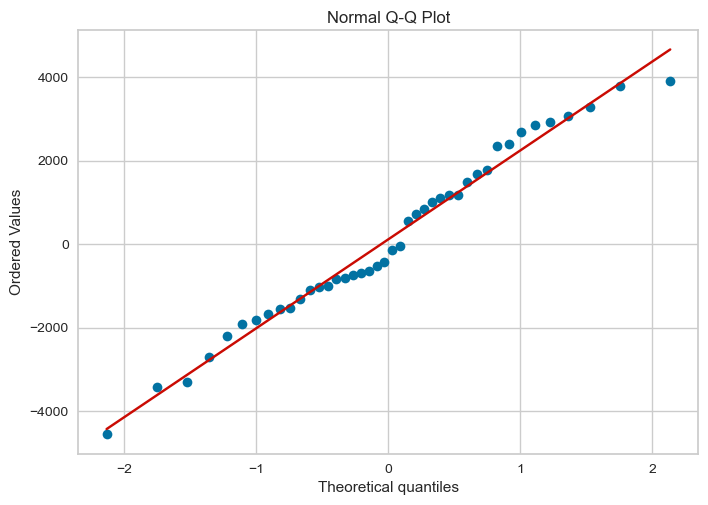


Actual vs Predicted:


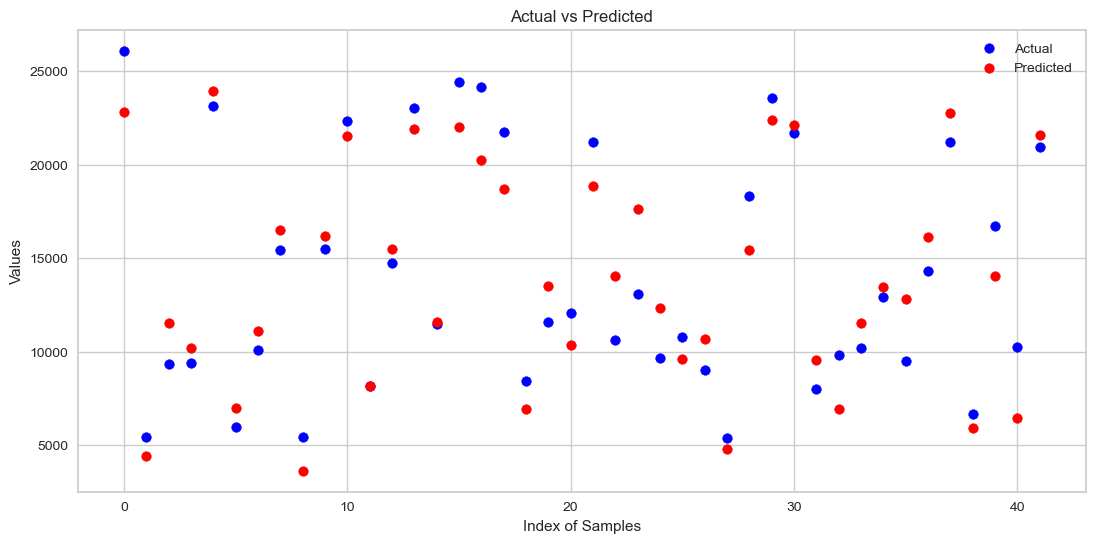

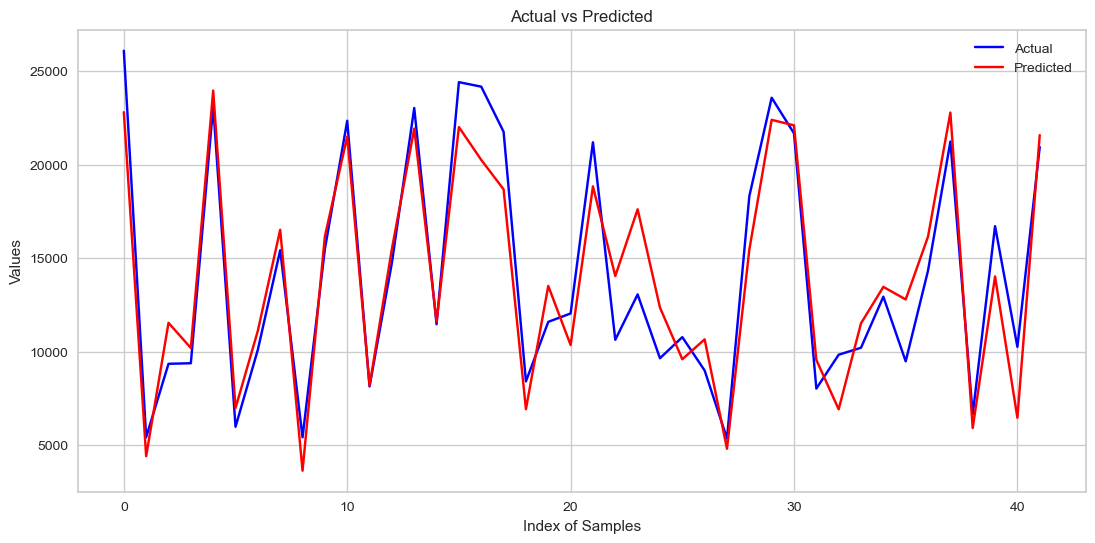

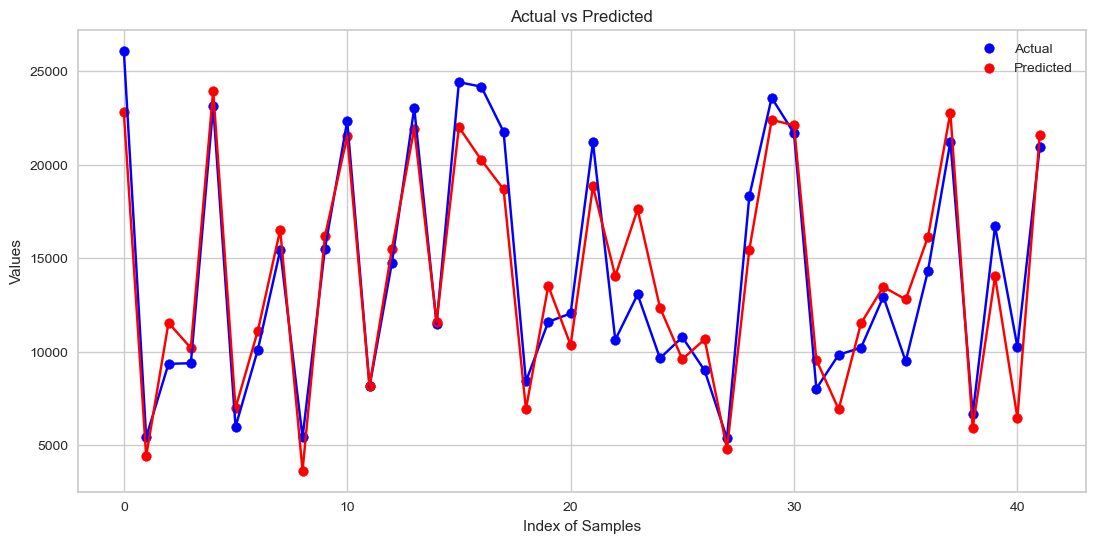


Residuals Scatter Plot:


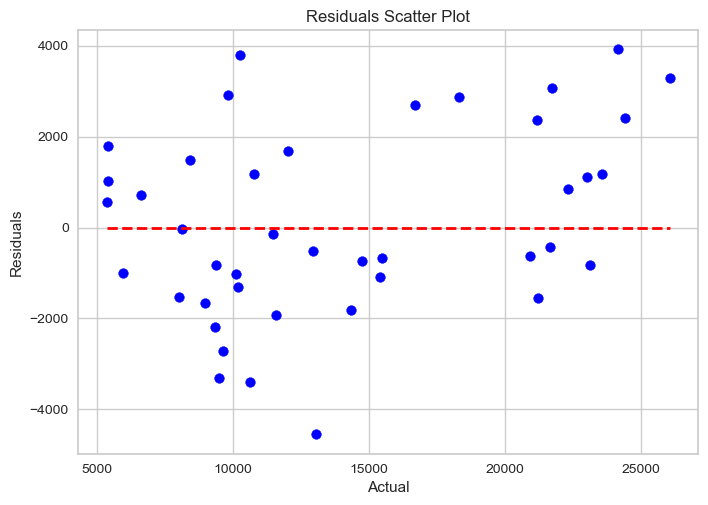


Residuals Histogram:


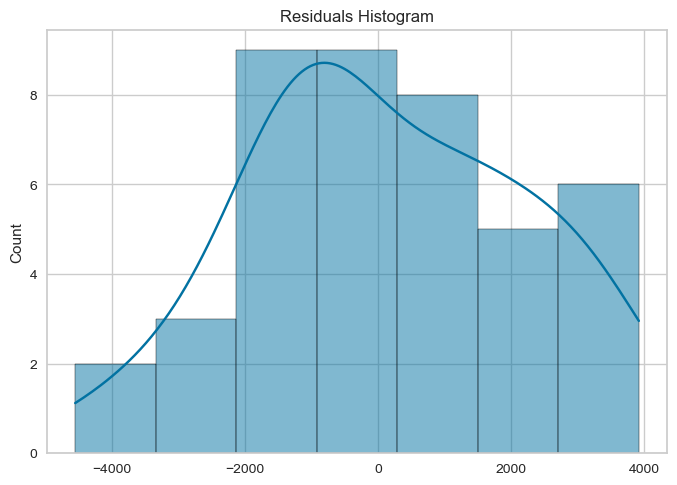

In [29]:
# Assuming dframe1 is your dataframe
X = first_df.drop(['Value Sales Brand'], axis=1)
y = first_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='OLS', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     159.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           5.99e-86
Time:                        00:23:32   Log-Likelihood:                -1445.0
No. Observations:                 166   AIC:                             2926.
Df Residuals:                     148   BIC:                             2982.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

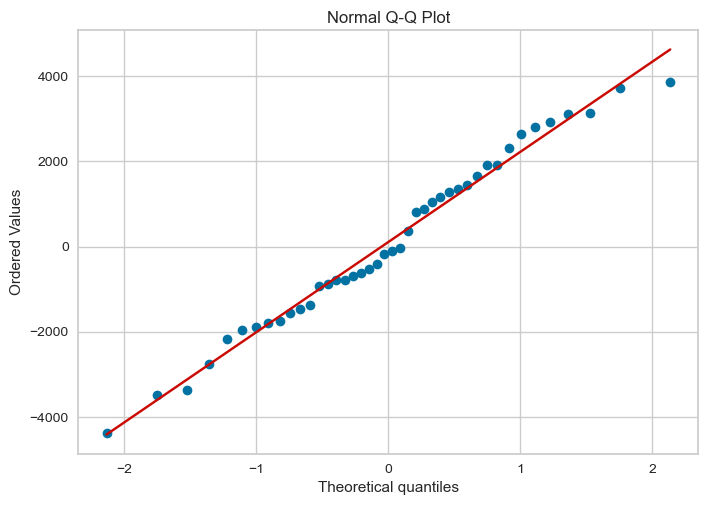


Actual vs Predicted:


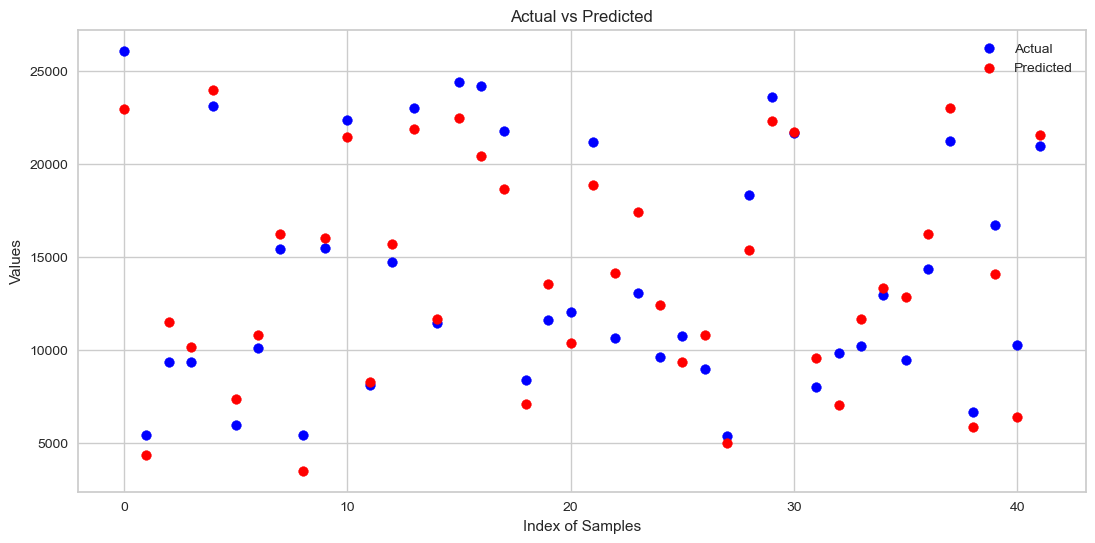

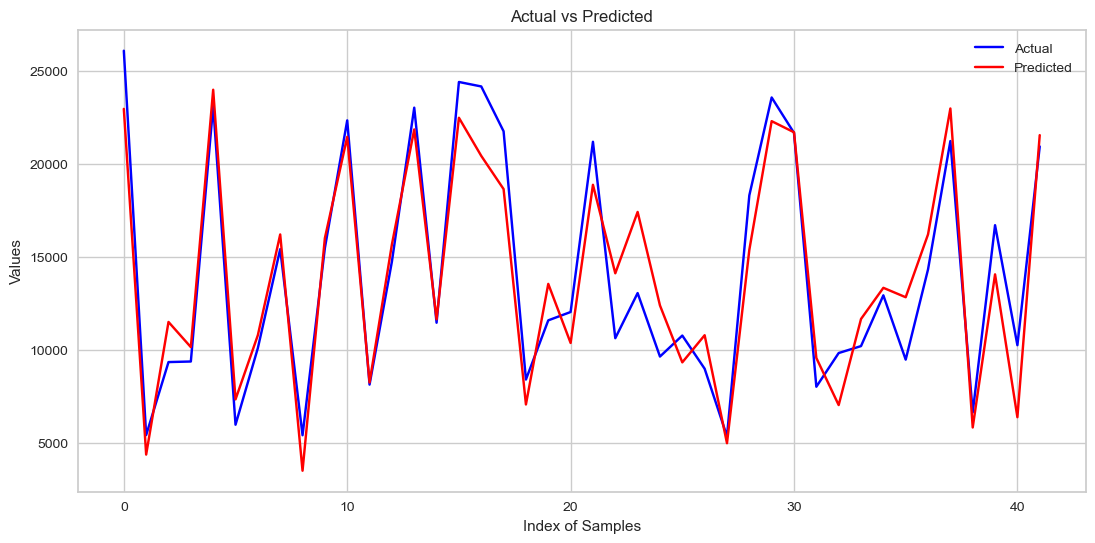

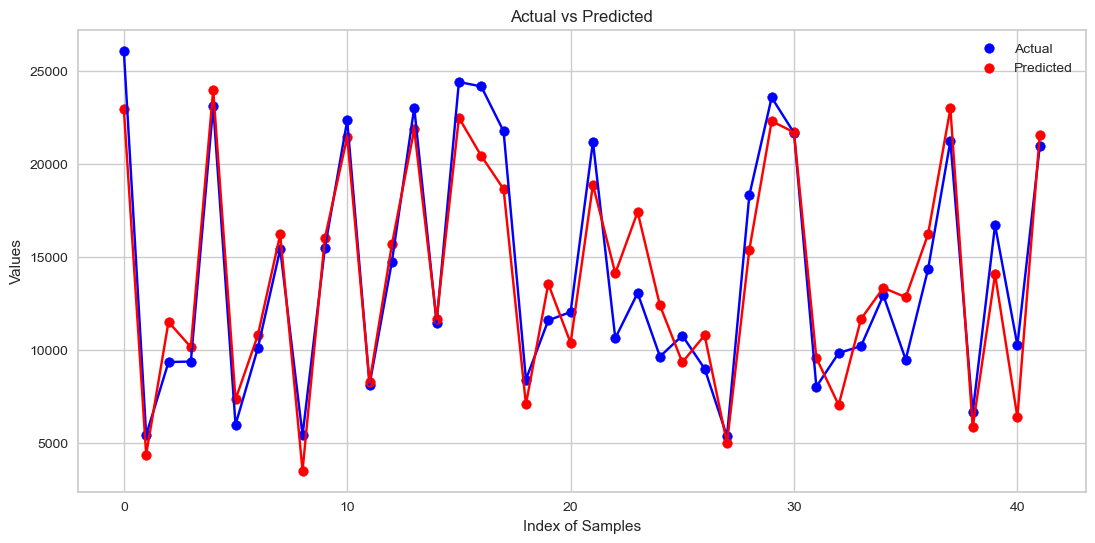


Residuals Scatter Plot:


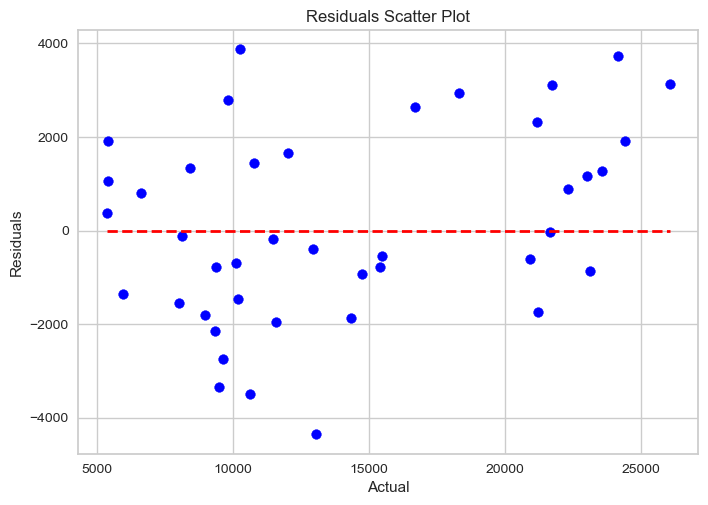


Residuals Histogram:


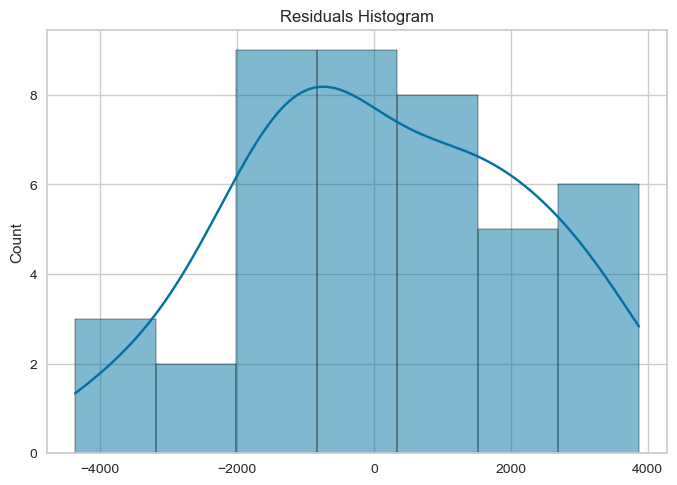

In [30]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['DISTRIBUTED SAMPLES (.000)', 'SEASONALITY MARKET', 'total_totem', 'competitors_grp',
             'events_seasonal', 'ONLINE RATINGS', 'season_Summer', 'Negative Opinions', 'AVERAGE PRICE MKT'], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='OLS', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           9.34e-90
Time:                        00:23:32   Log-Likelihood:                -1449.9
No. Observations:                 166   AIC:                             2926.
Df Residuals:                     153   BIC:                             2966.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

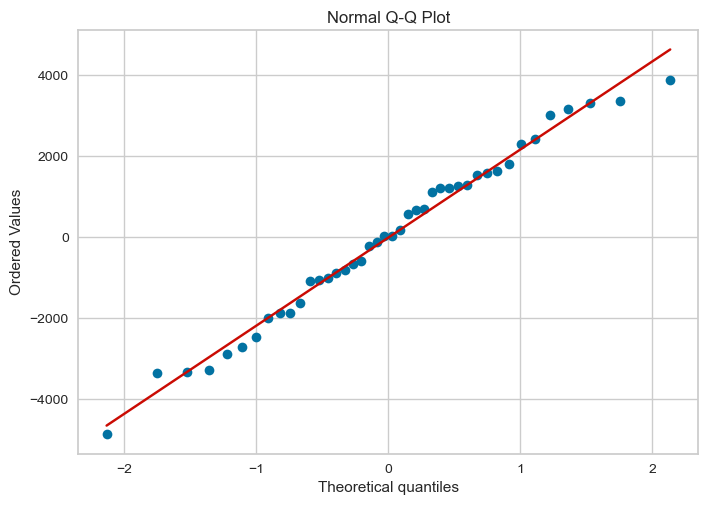


Actual vs Predicted:


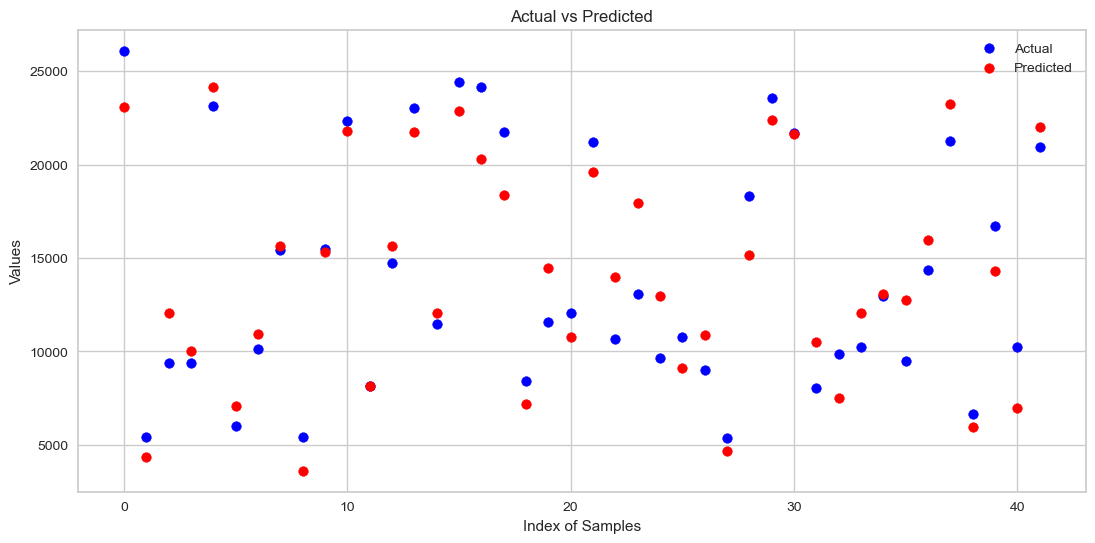

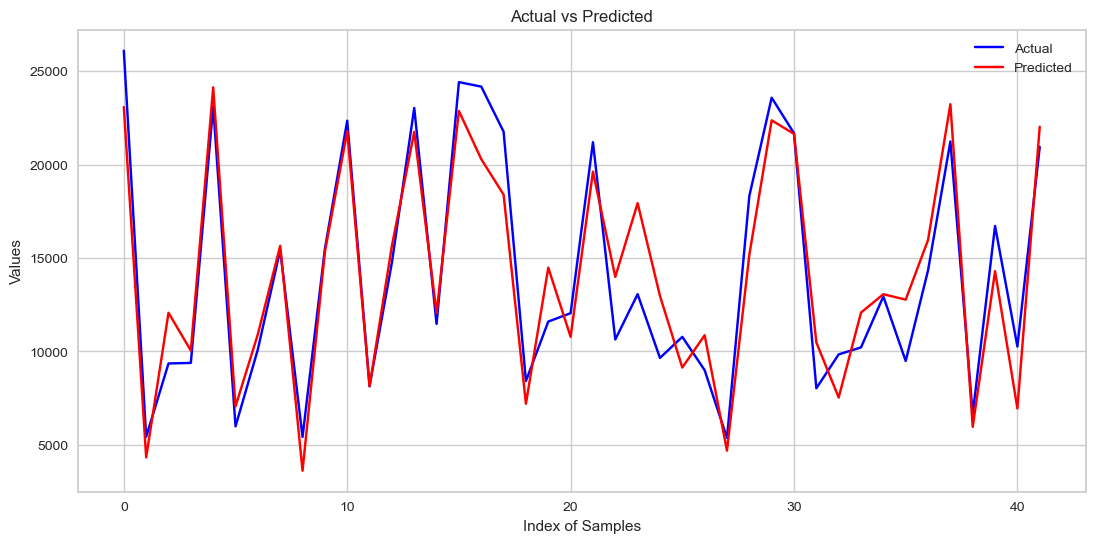

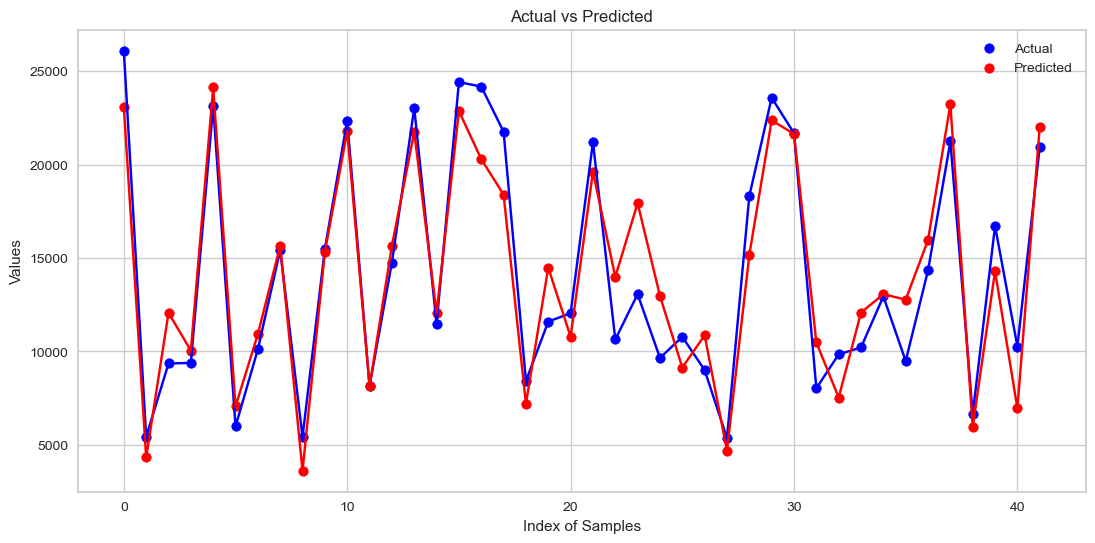


Residuals Scatter Plot:


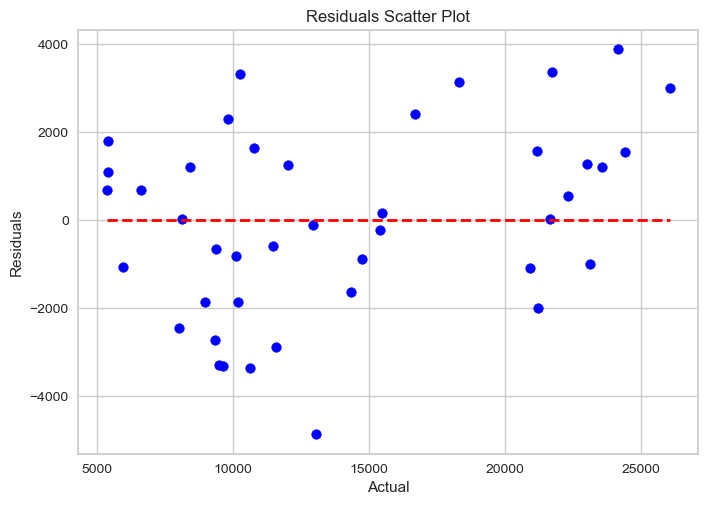


Residuals Histogram:


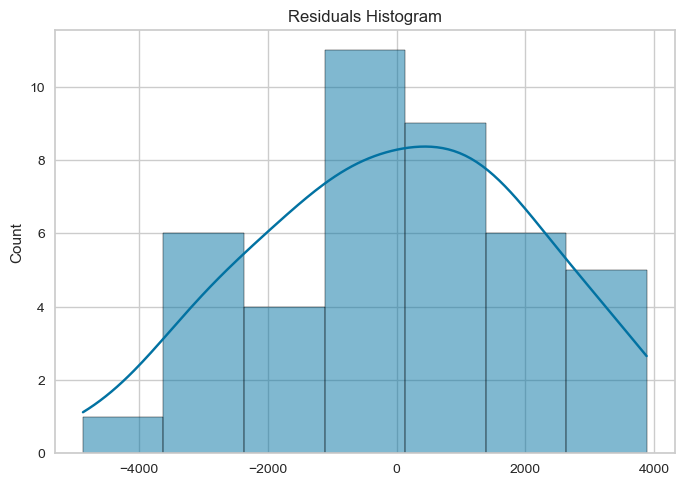

In [31]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['Number of Items', 'season_Spring', 'NUMBER OF INFLUENCERS INVOLVED', 'INVESTMENTS PRINT', 'total_editors'
    
], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='OLS', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.60e-90
Time:                        00:23:33   Log-Likelihood:                -1451.0
No. Observations:                 166   AIC:                             2926.
Df Residuals:                     154   BIC:                             2963.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

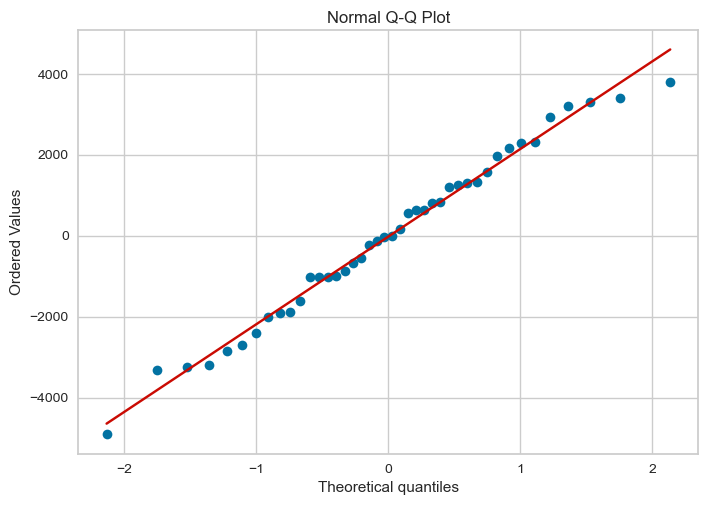


Actual vs Predicted:


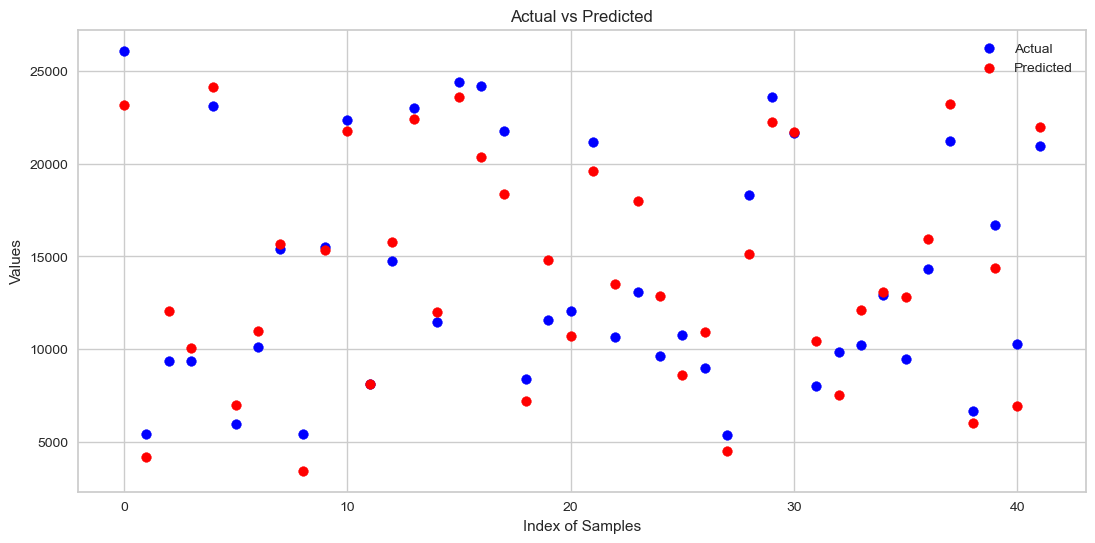

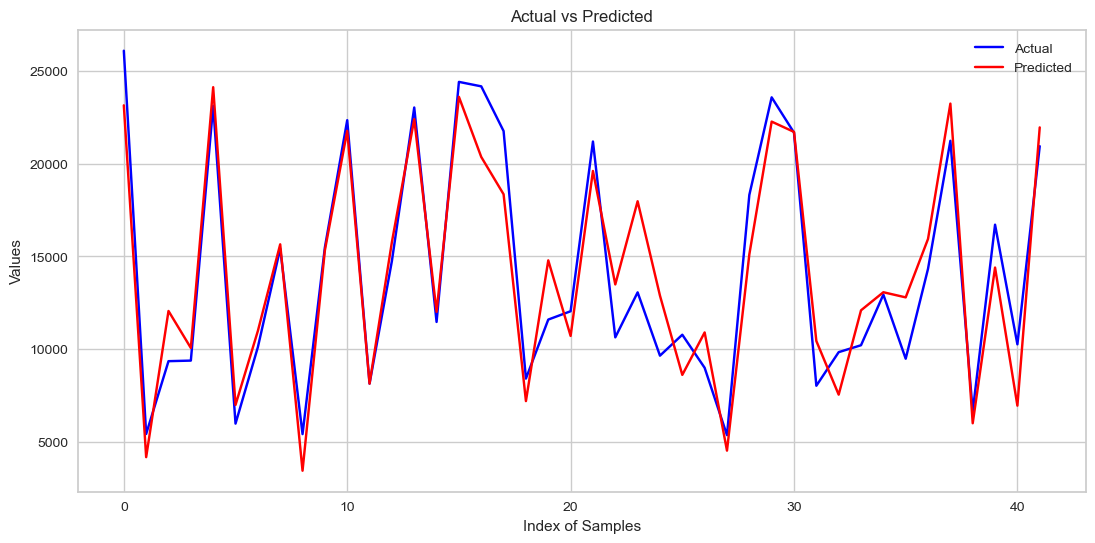

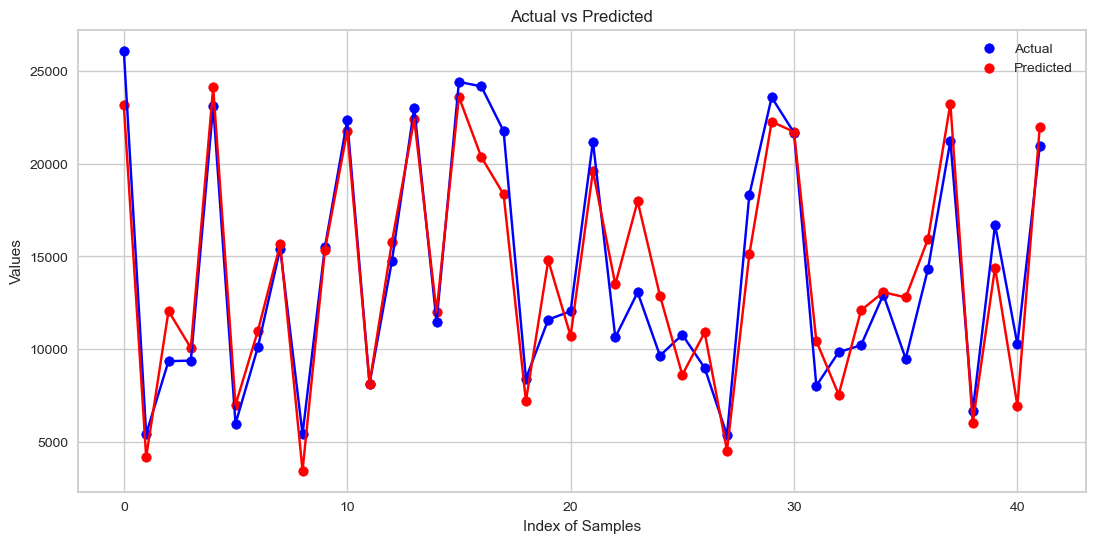


Residuals Scatter Plot:


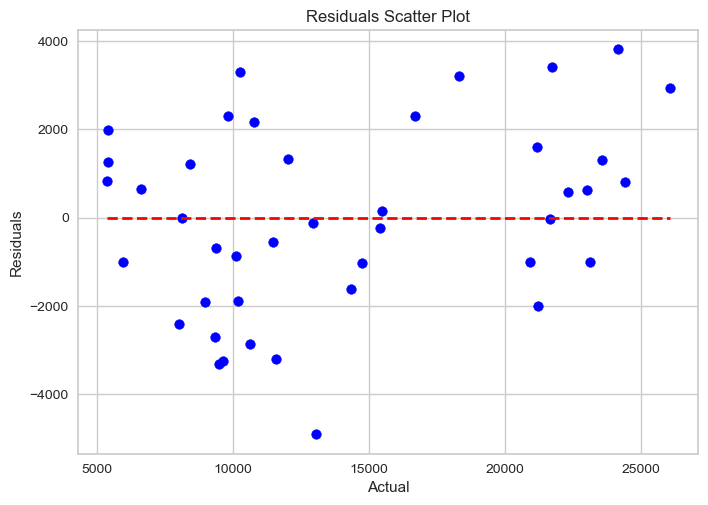


Residuals Histogram:


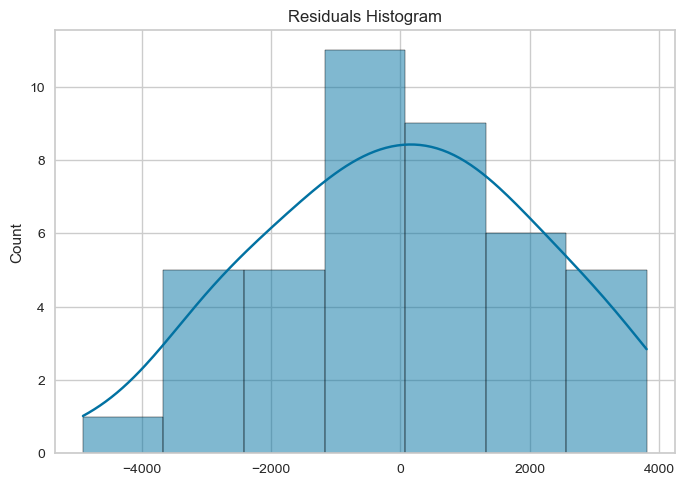

In [32]:
# Assuming dframe1 is your dataframe|
X3 = X2.drop(['INVESTMENTS TV'], axis=1)
y3 = y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='OLS', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

### BayesianRidge

#### No log, lag, adstock

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     99.19
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.48e-77
Time:                        00:23:39   Log-Likelihood:                -1443.8
No. Observations:                 166   AIC:                             2942.
Df Residuals:                     139   BIC:                             3026.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

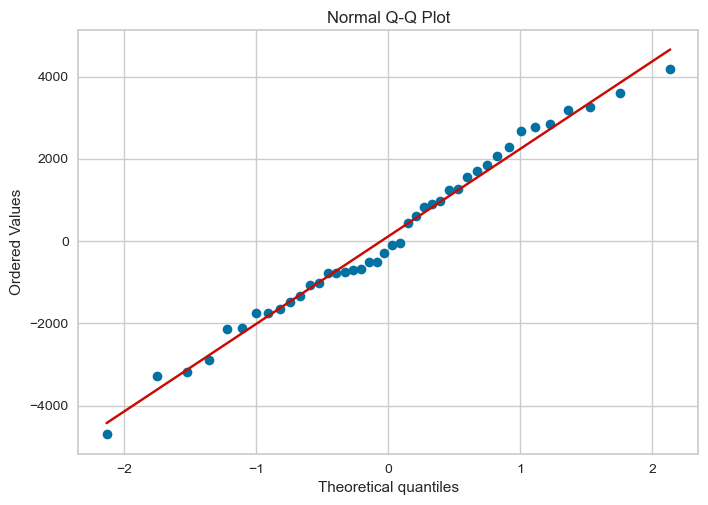


Actual vs Predicted:


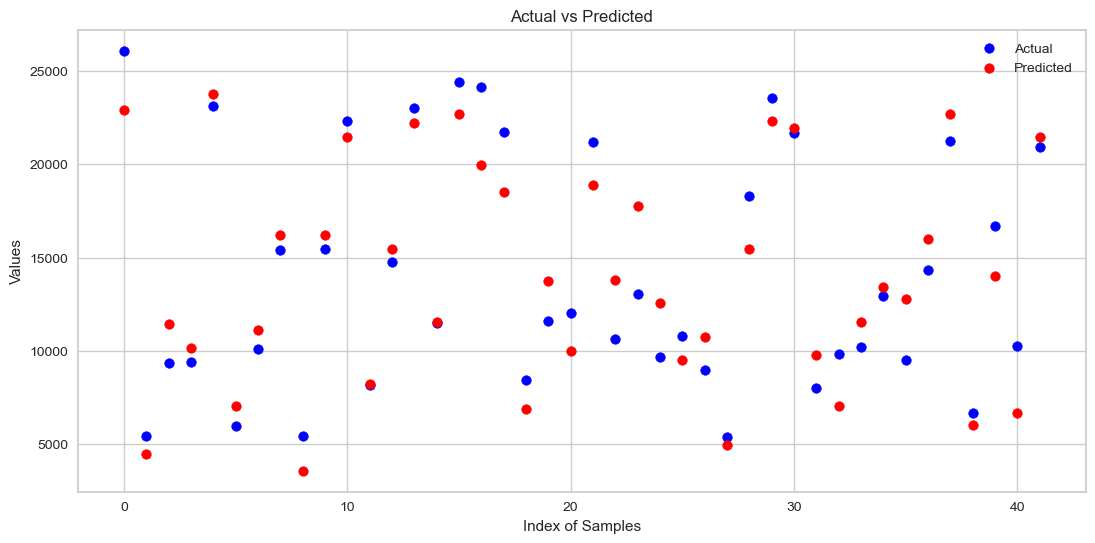

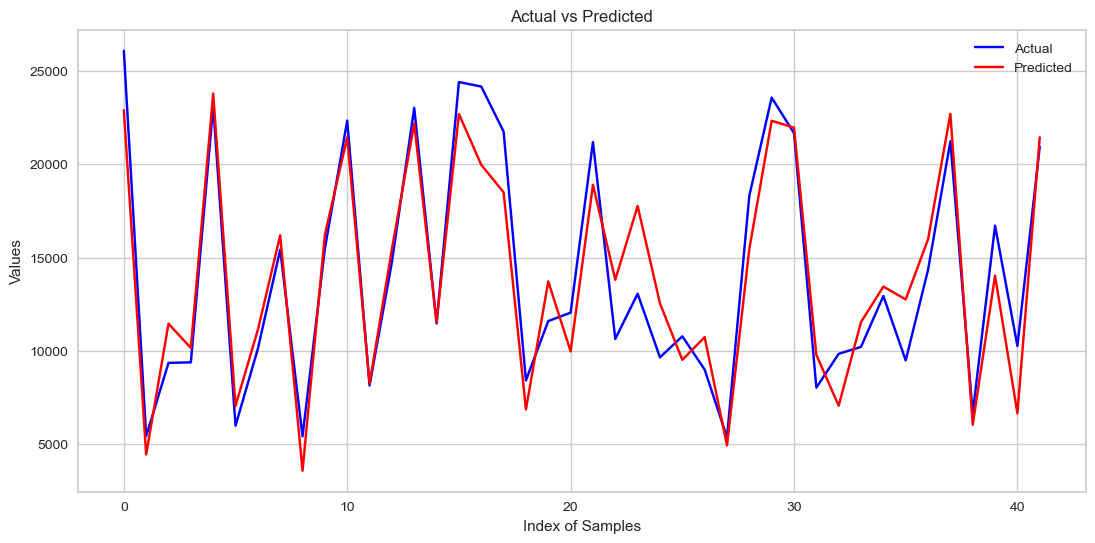

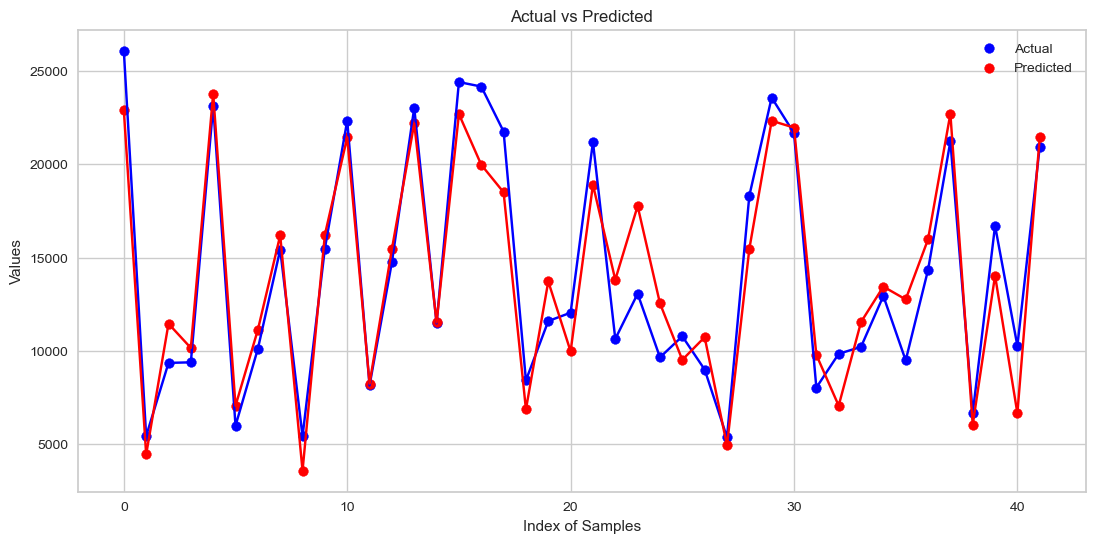


Residuals Scatter Plot:


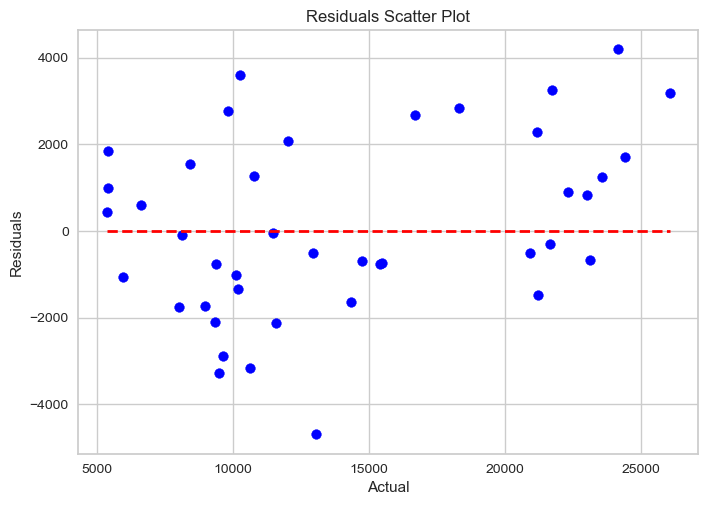


Residuals Histogram:


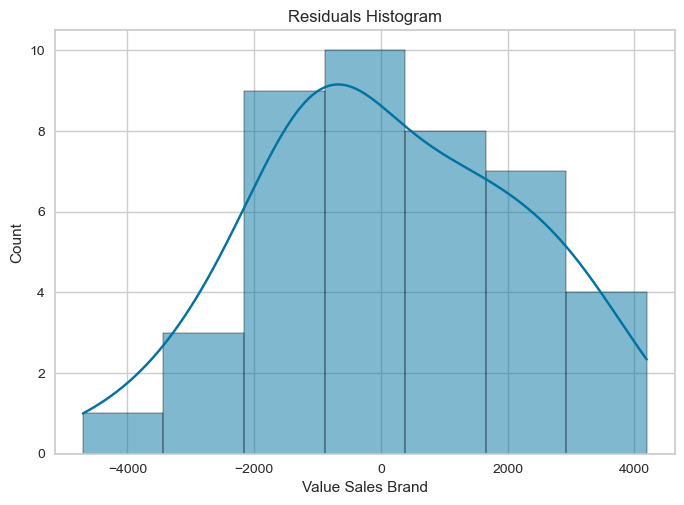

In [49]:
# Assuming dframe1 is your dataframe
X = first_df.drop(['Value Sales Brand'], axis=1)
y = first_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.59e-84
Time:                        00:23:39   Log-Likelihood:                -1456.1
No. Observations:                 166   AIC:                             2944.
Df Residuals:                     150   BIC:                             2994.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

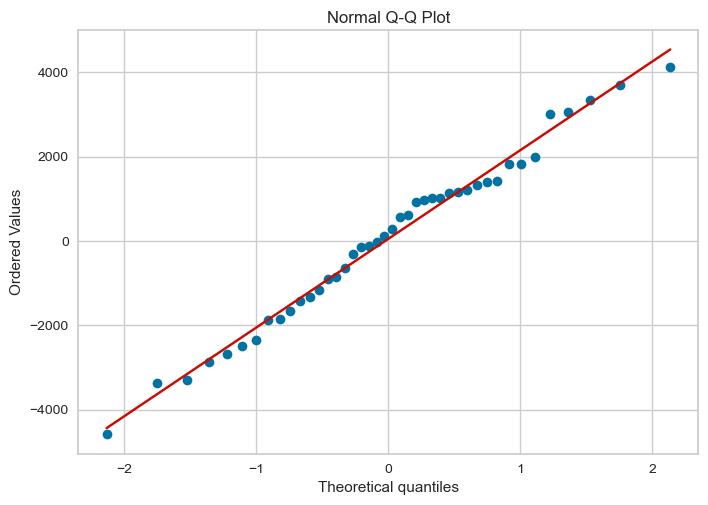


Actual vs Predicted:


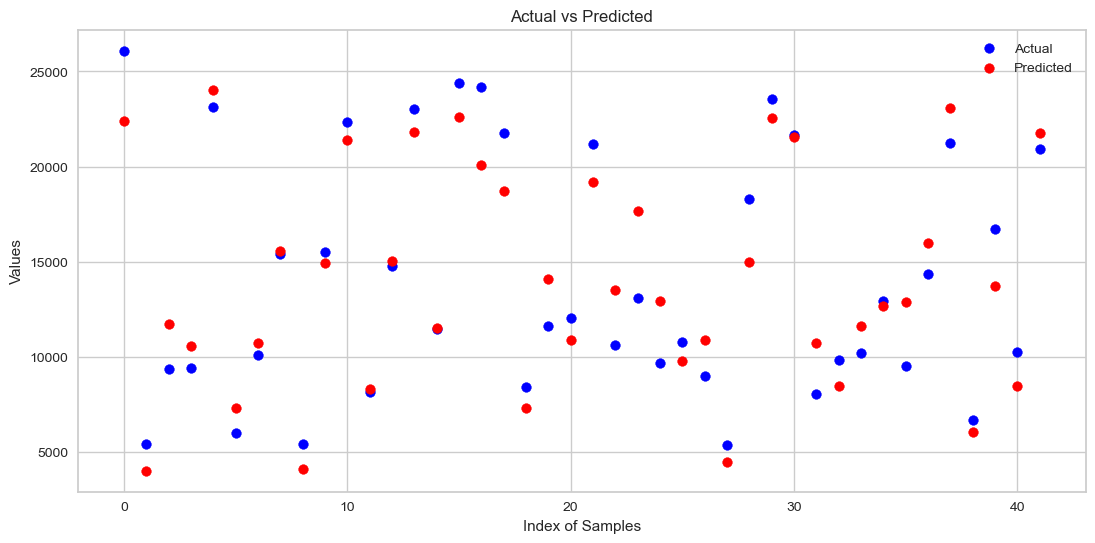

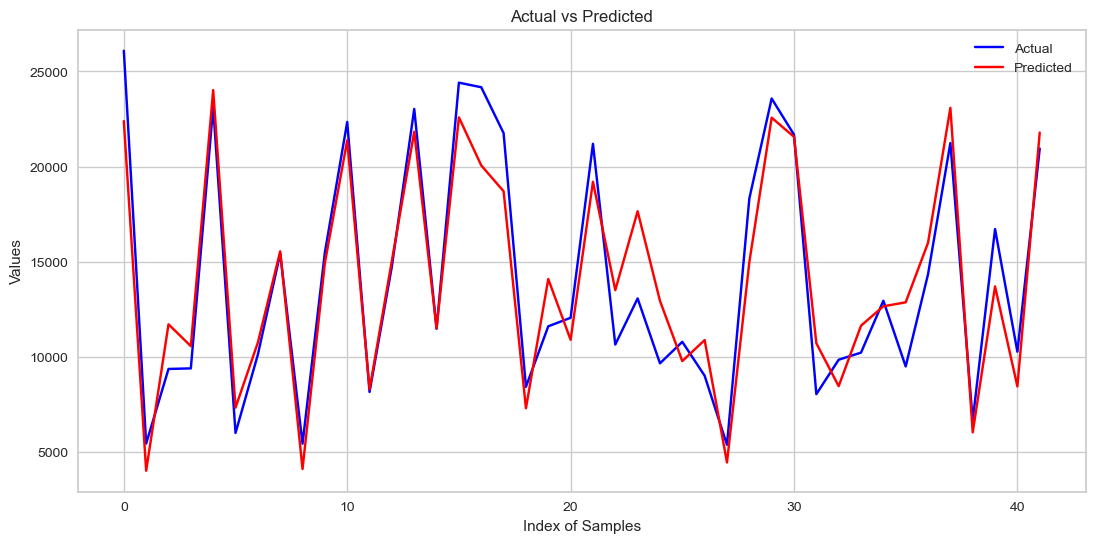

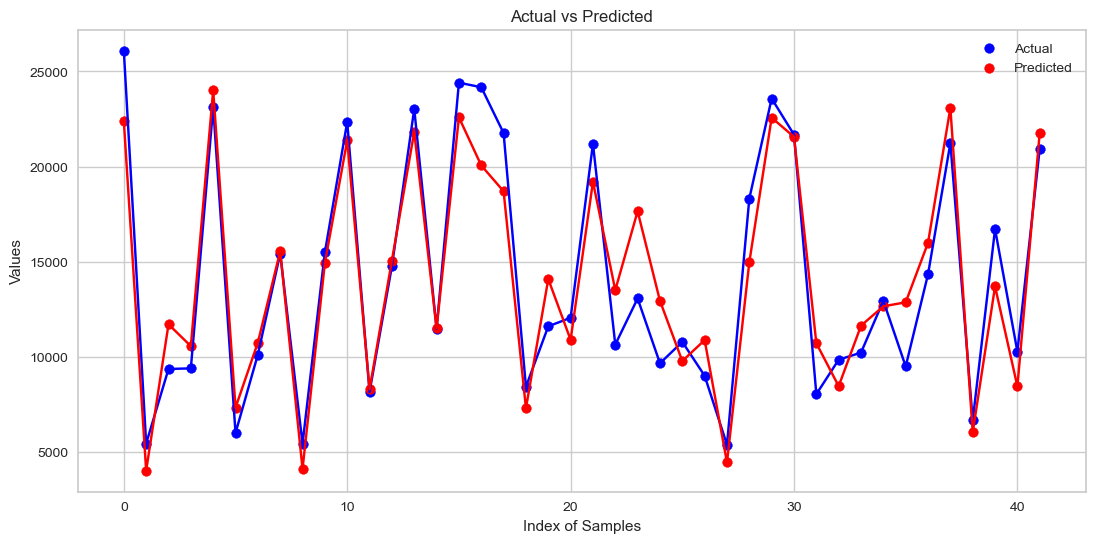


Residuals Scatter Plot:


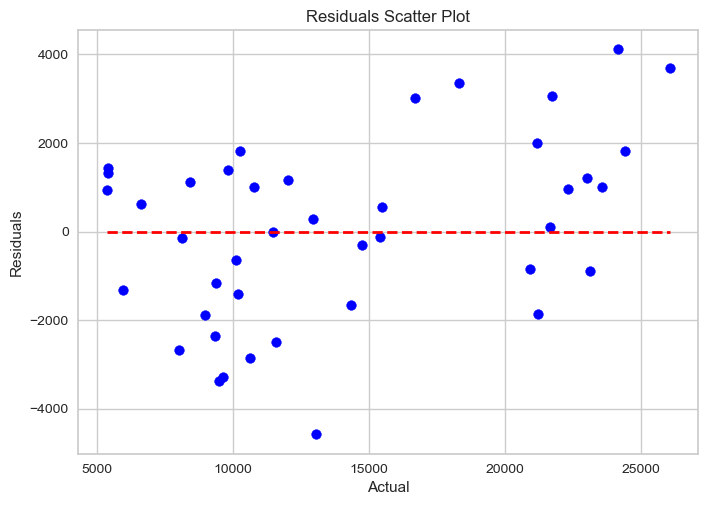


Residuals Histogram:


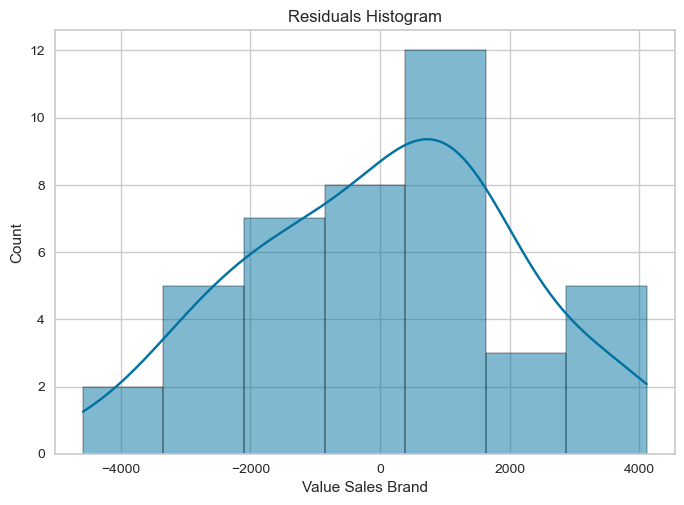

In [50]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['Number of Items',
    'DISTRIBUTED SAMPLES (.000)',
    'ONLINE REVIEWS',
    'Positive Opinions',
    'Negative Opinions',
    'NUMBER OF INFLUENCERS INVOLVED',
    'competitors_grp',
    'total_editors',
    'total_totem',
    'events_seasonal',
    'season_Summer'], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     185.1
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           4.59e-86
Time:                        00:23:40   Log-Likelihood:                -1456.3
No. Observations:                 166   AIC:                             2941.
Df Residuals:                     152   BIC:                             2984.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

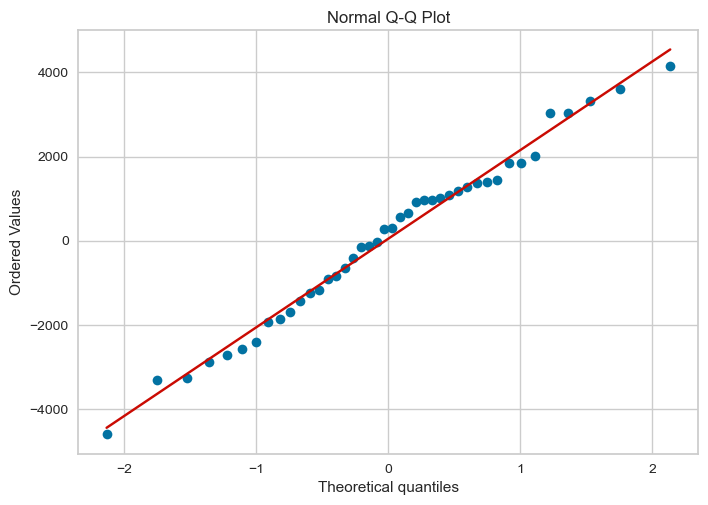


Actual vs Predicted:


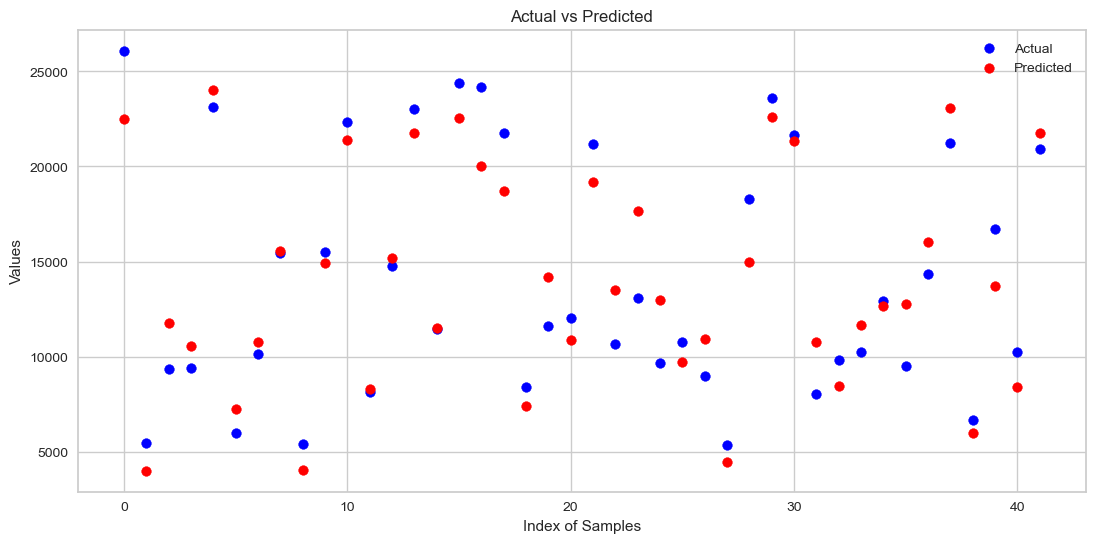

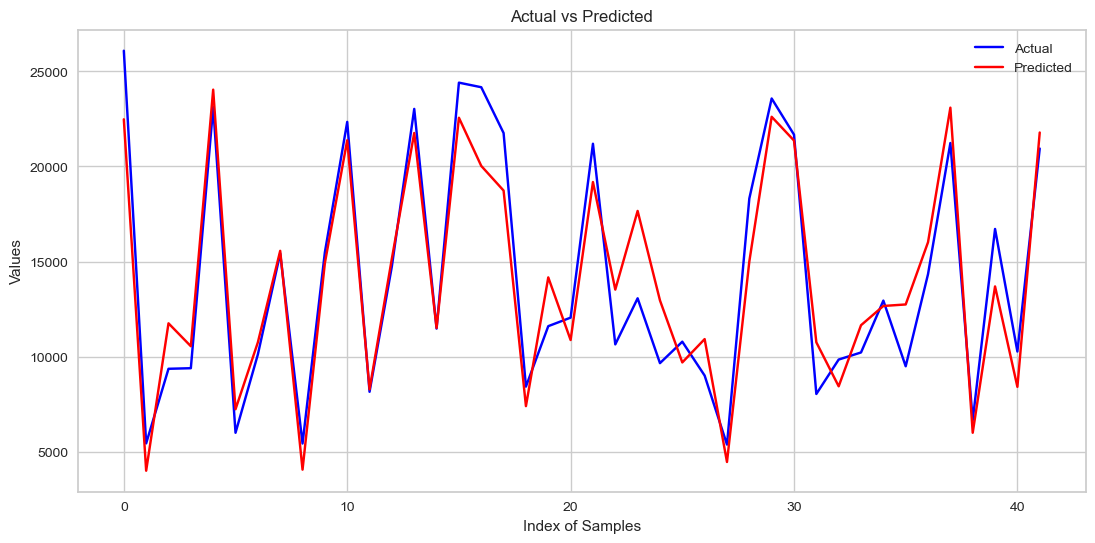

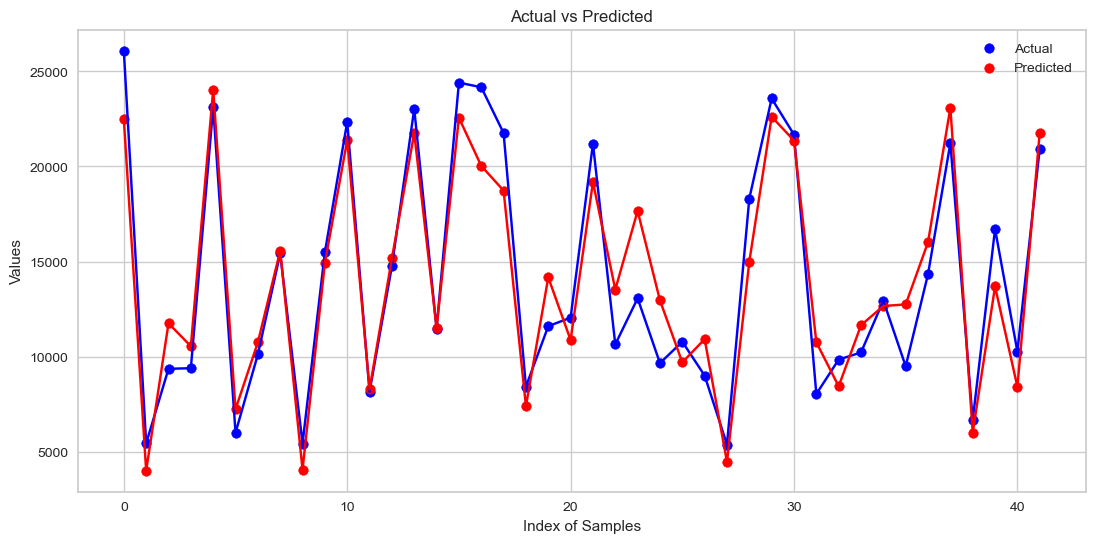


Residuals Scatter Plot:


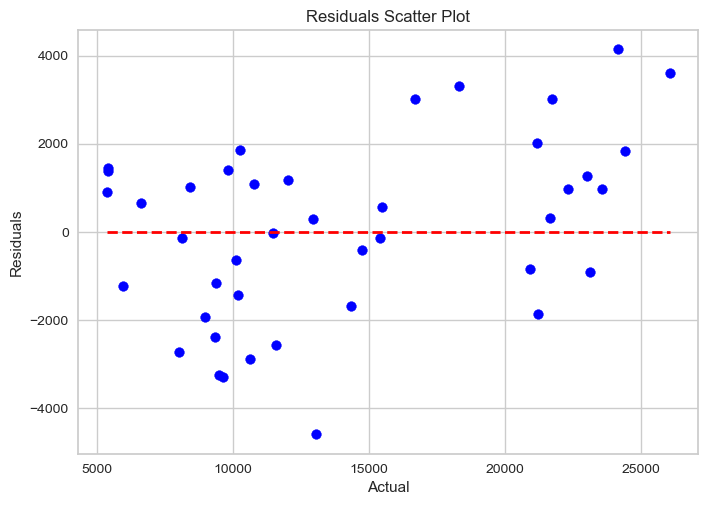


Residuals Histogram:


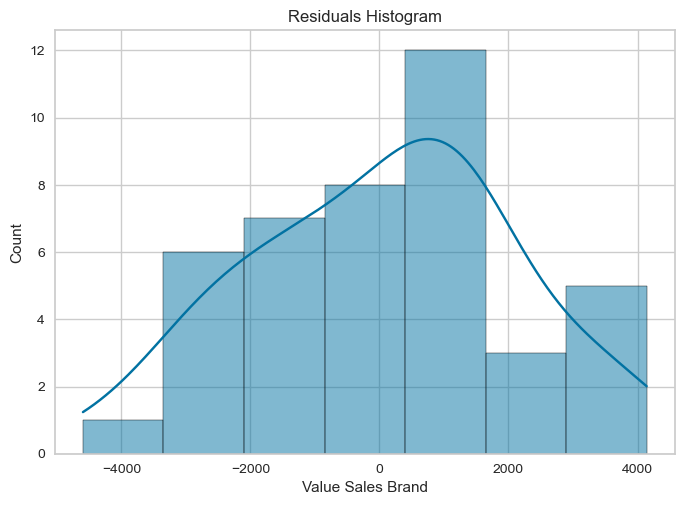

In [51]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['SEASONALITY MARKET', 'AVERAGE PRICE MKT'], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     218.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           6.31e-88
Time:                        00:23:40   Log-Likelihood:                -1457.5
No. Observations:                 166   AIC:                             2939.
Df Residuals:                     154   BIC:                             2976.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

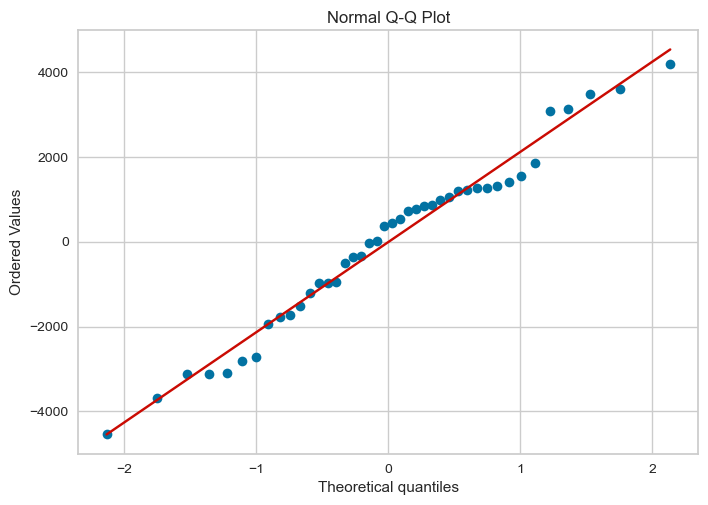


Actual vs Predicted:


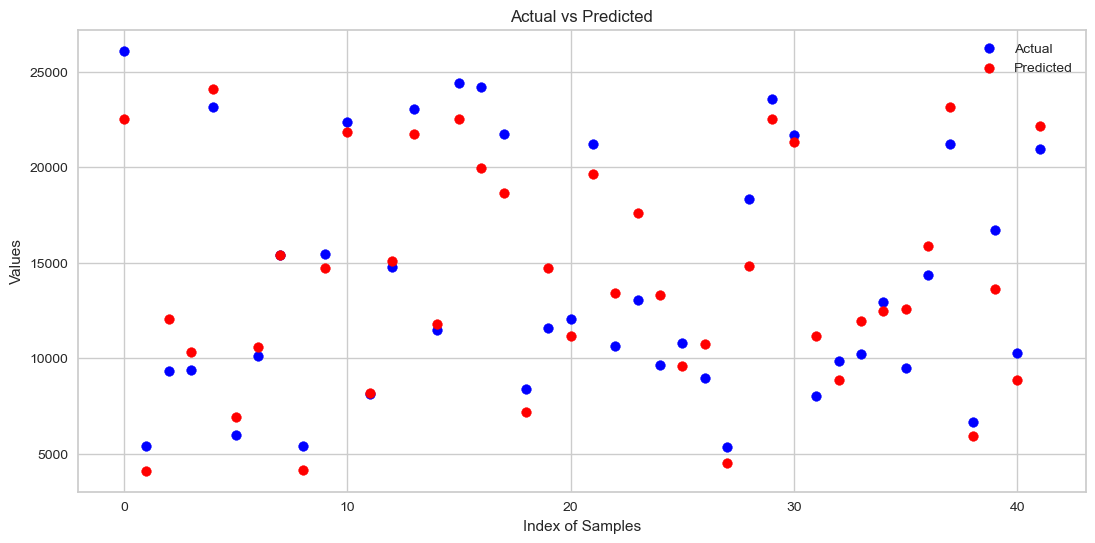

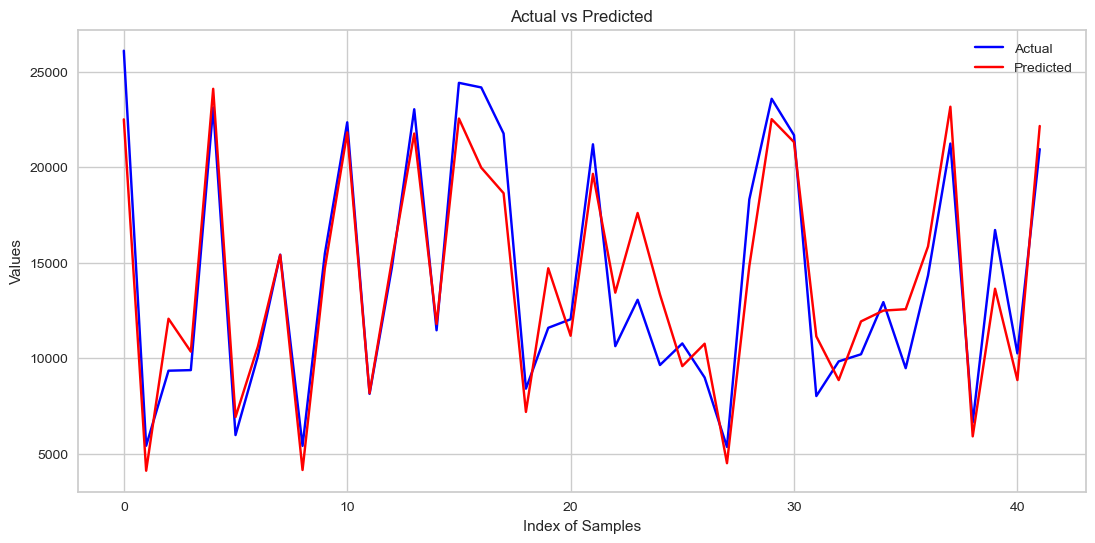

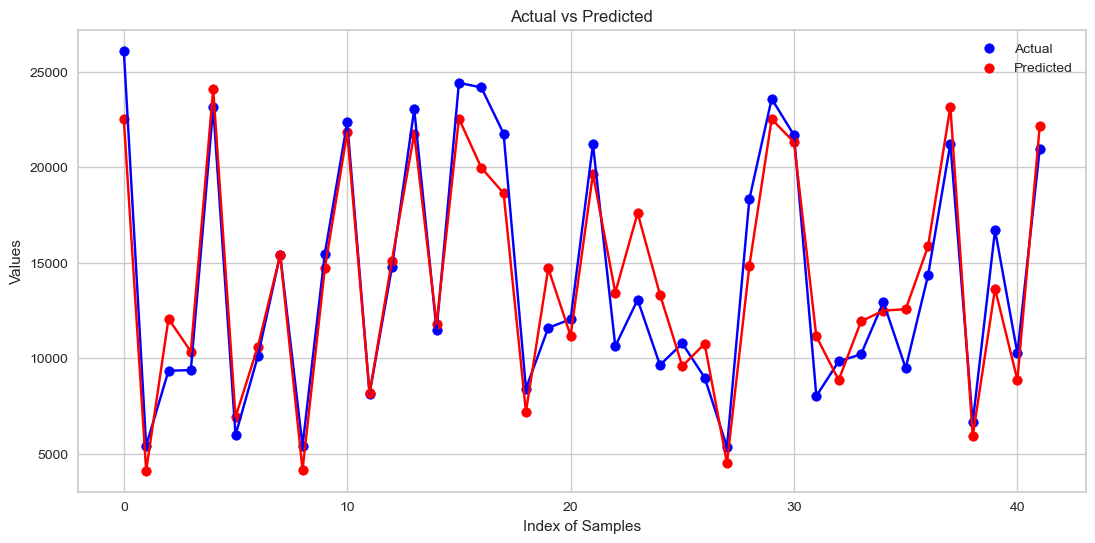


Residuals Scatter Plot:


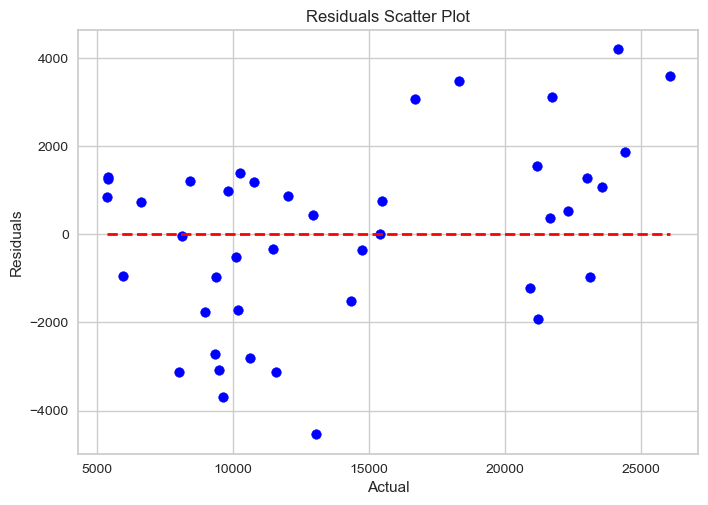


Residuals Histogram:


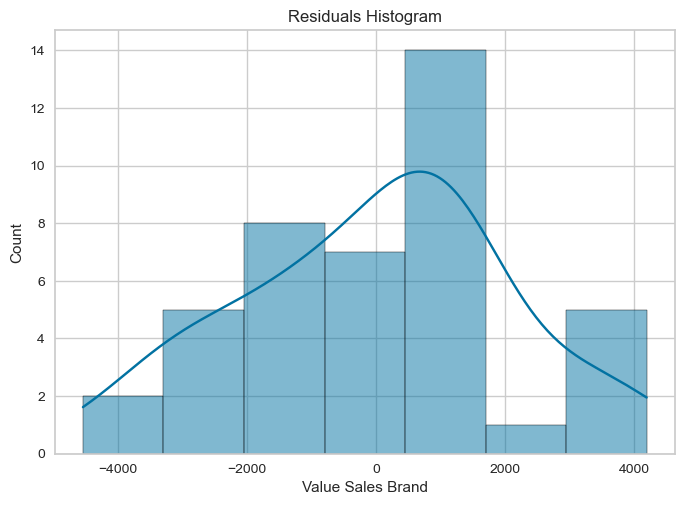

In [52]:
# Assuming dframe1 is your dataframe
X3 = X2.drop(['ONLINE RATINGS', 'season_Spring'], axis=1)
y3 = y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           9.43e-90
Time:                        00:23:41   Log-Likelihood:                -1459.0
No. Observations:                 166   AIC:                             2938.
Df Residuals:                     156   BIC:                             2969.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

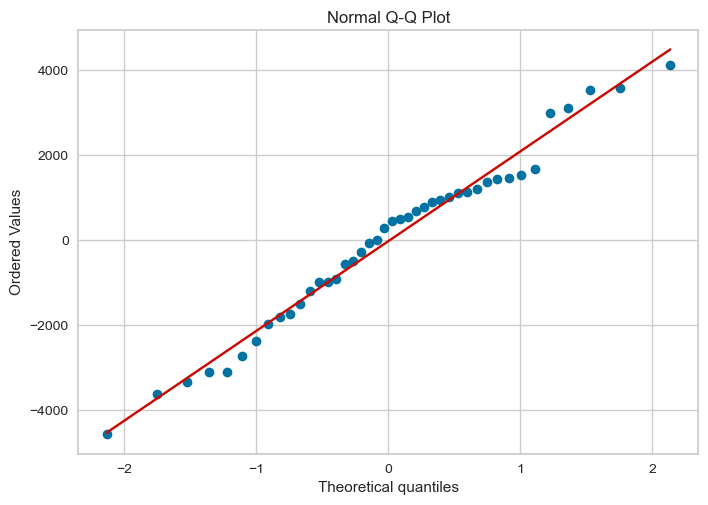


Actual vs Predicted:


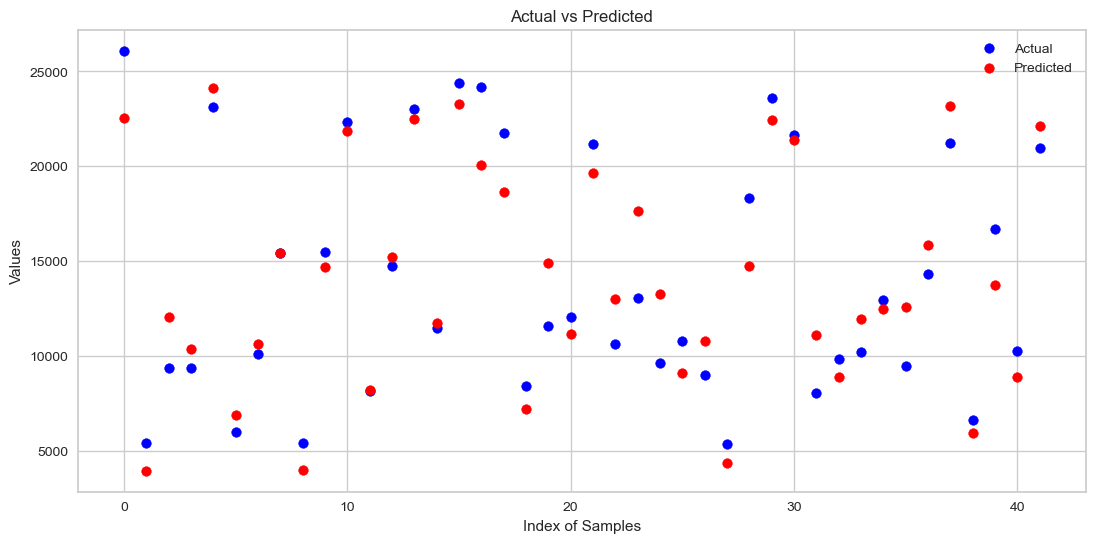

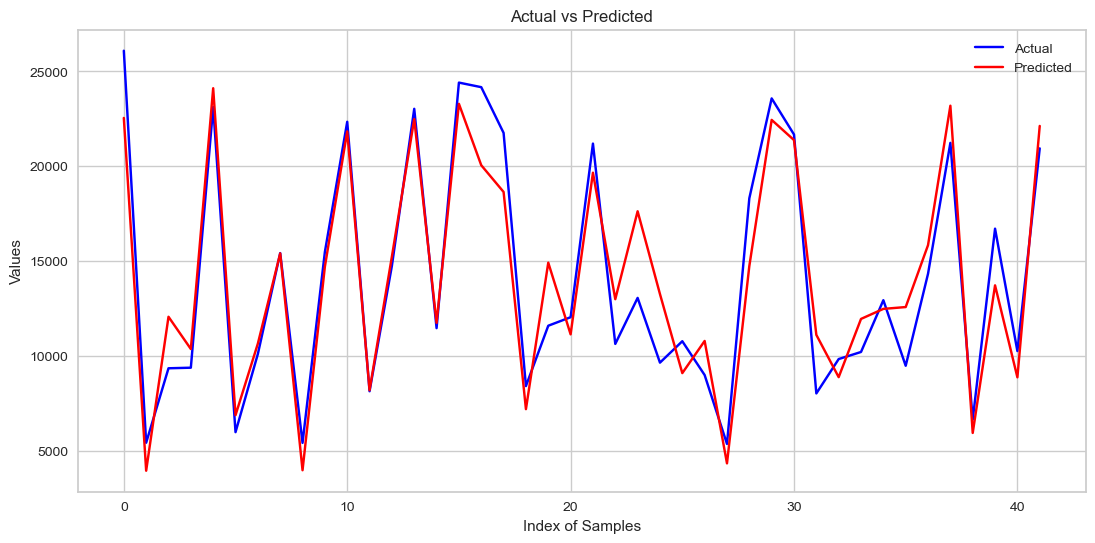

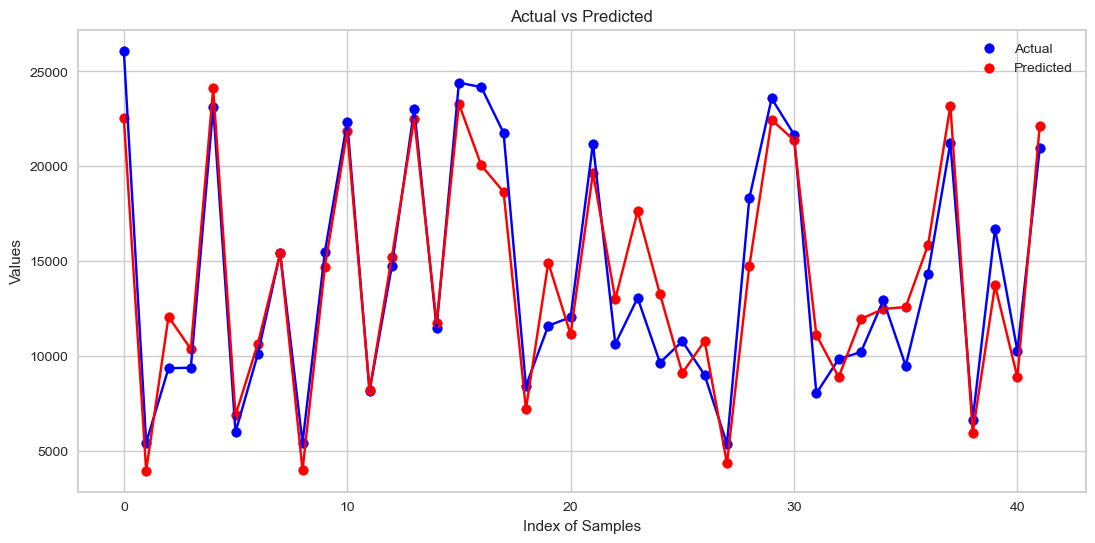


Residuals Scatter Plot:


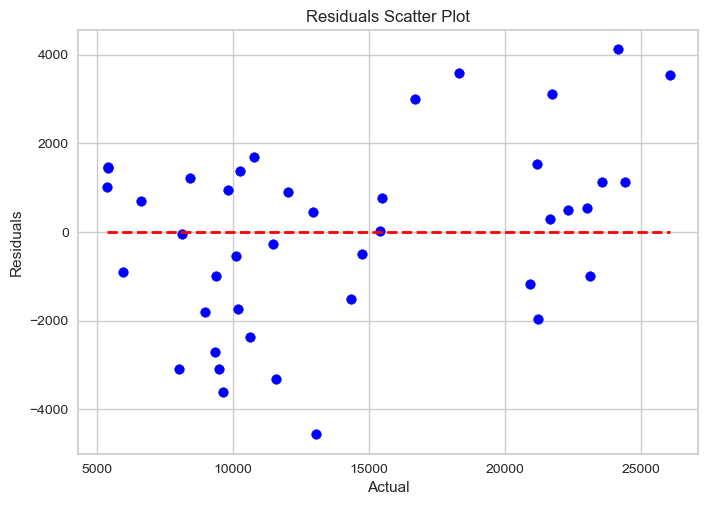


Residuals Histogram:


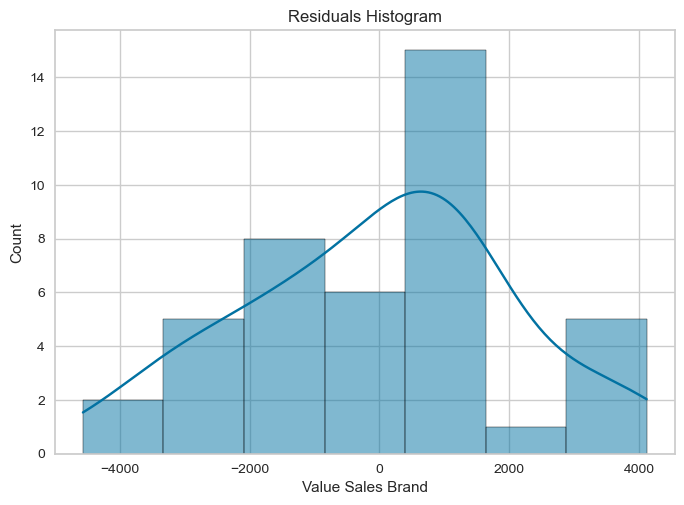

In [53]:
# Assuming dframe1 is your dataframe
X4 = X3.drop(['INVESTMENTS PRINT', 'INVESTMENTS TV'], axis=1)
y4 = y3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

### Ridge

#### No log, lagged, adstock

Selected features for Ridge: Index(['Weighted Handling Distribution', 'Number of Items',
       'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT', 'SEASONALITY MARKET',
       'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)', 'ONLINE REVIEWS',
       'ONLINE RATINGS', 'Positive Opinions', 'Negative Opinions',
       'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''', 'GRP TV 10''',
       'INVESTMENTS TV', 'INVESTMENTS PRINT', 'digital_investments',
       'competitors_grp', 'total_editors', 'total_totem', 'events_seasonal',
       'Sales Value Growth (%)', 'season_Spring', 'season_Summer',
       'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     99.19
Date:                Sun, 15 Sep 2024   Prob (F-

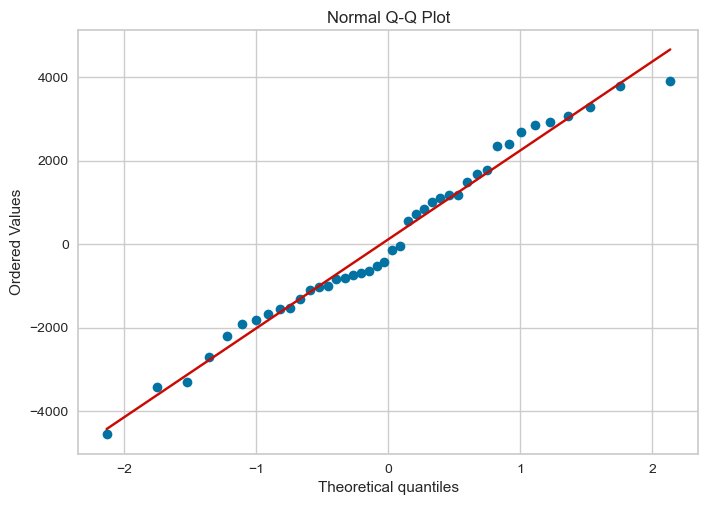


Actual vs Predicted:


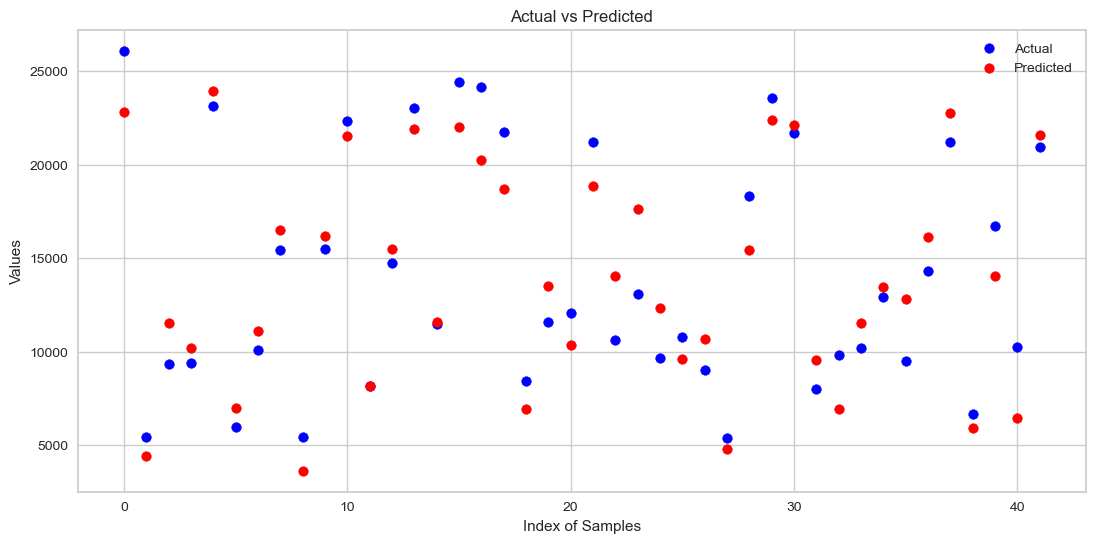

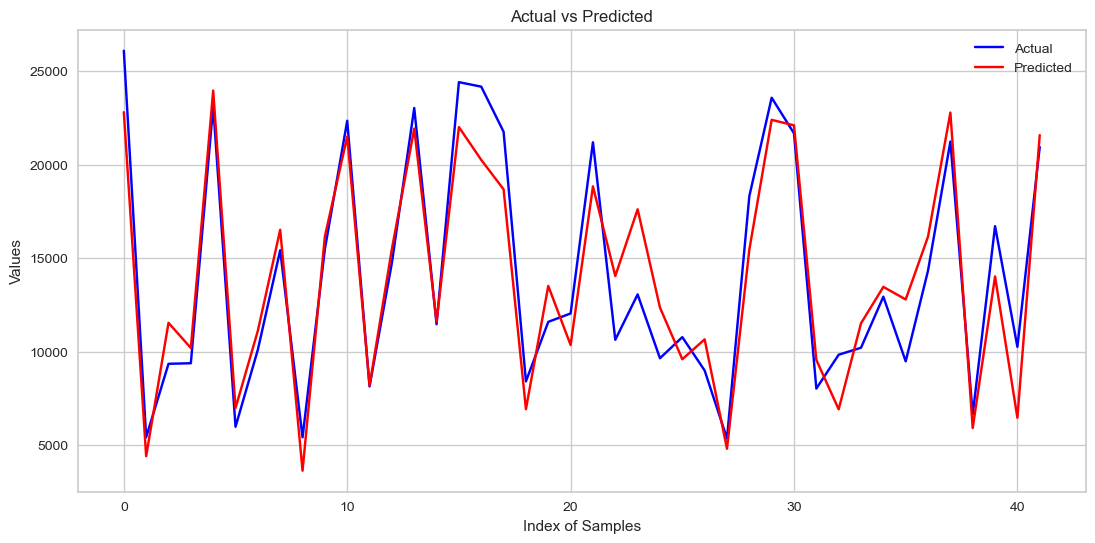

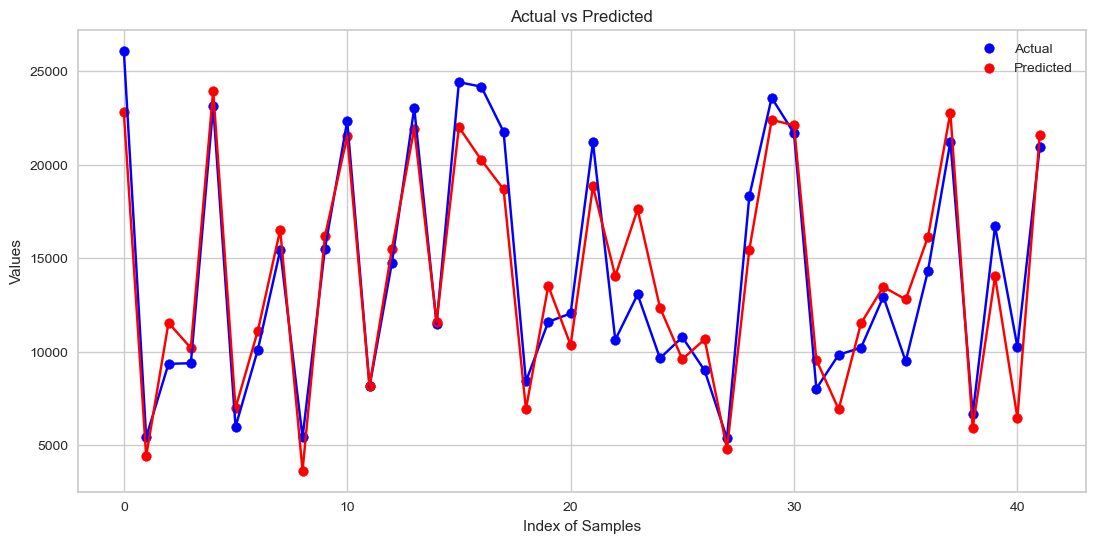


Residuals Scatter Plot:


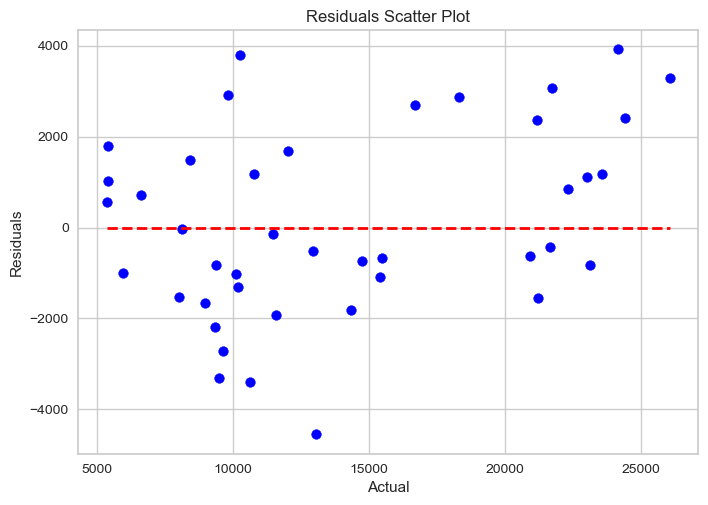


Residuals Histogram:


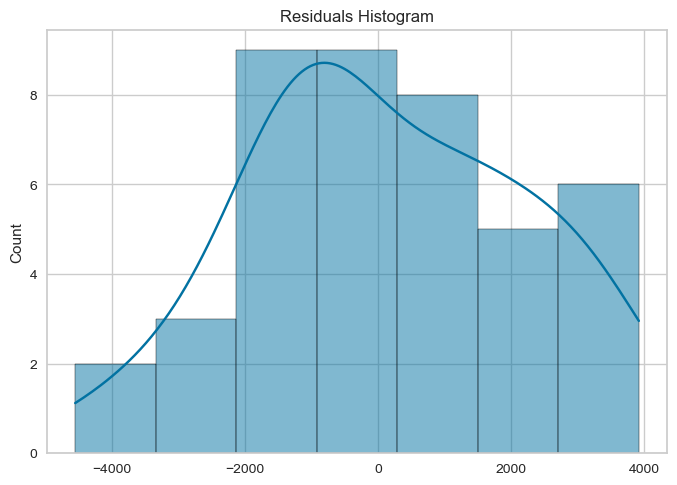

In [67]:
# Assuming dframe1 is your dataframe
X = first_df.drop(['Value Sales Brand'], axis=1)
y = first_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Ridge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

Selected features for Ridge: Index(['Weighted Handling Distribution', 'AVERAGE PROMO PRICE',
       'AVERAGE PRICE MKT', 'SEASONALITY MARKET', 'LOCKDOWN', 'ONLINE RATINGS',
       'GRP TV 20''', 'GRP TV 10''', 'INVESTMENTS TV', 'INVESTMENTS PRINT',
       'digital_investments', 'Sales Value Growth (%)', 'season_Spring',
       'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.59e-84
Time:                        00:23:46   Log-Likelihood:                -1456.1
No. Observations:                 166   AIC:                             2944.
Df Residuals:                     150   BIC:                         

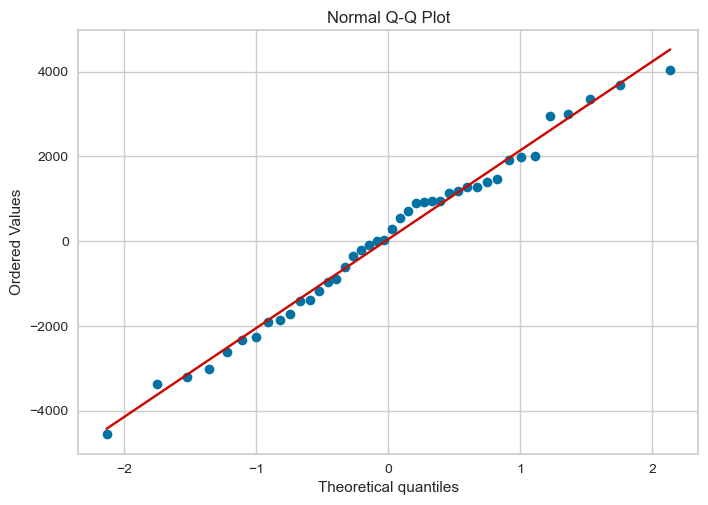


Actual vs Predicted:


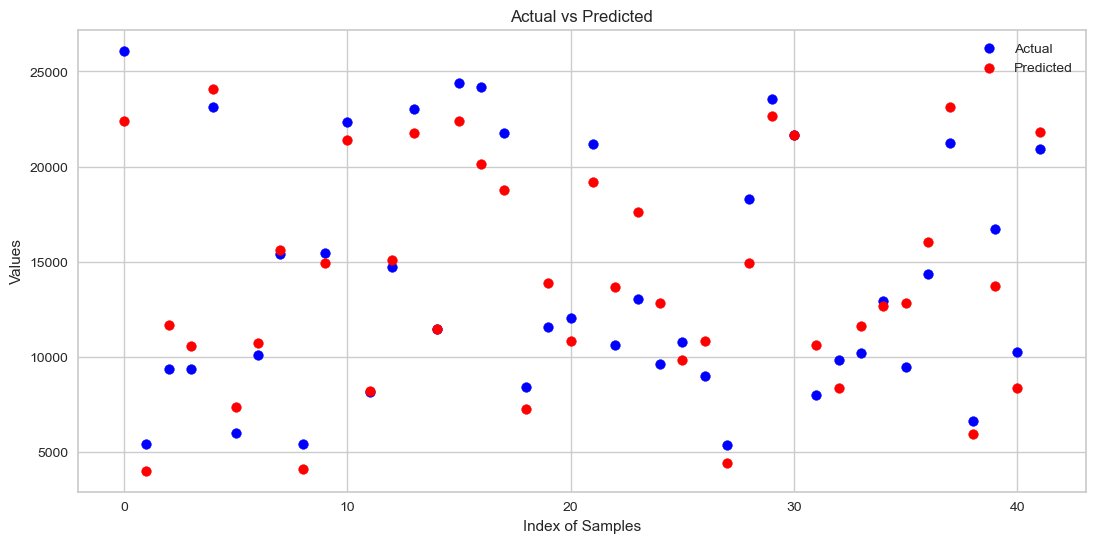

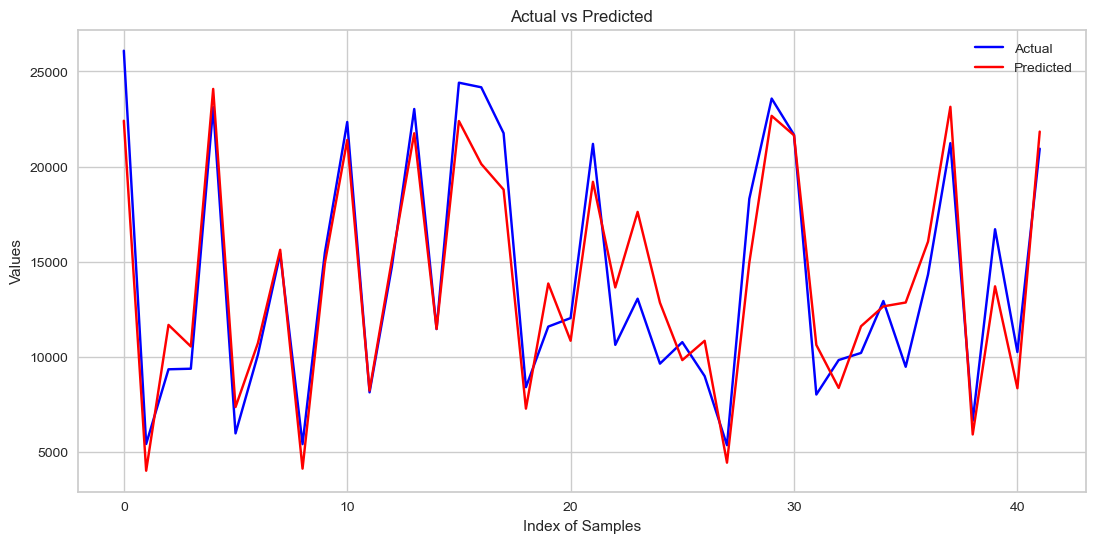

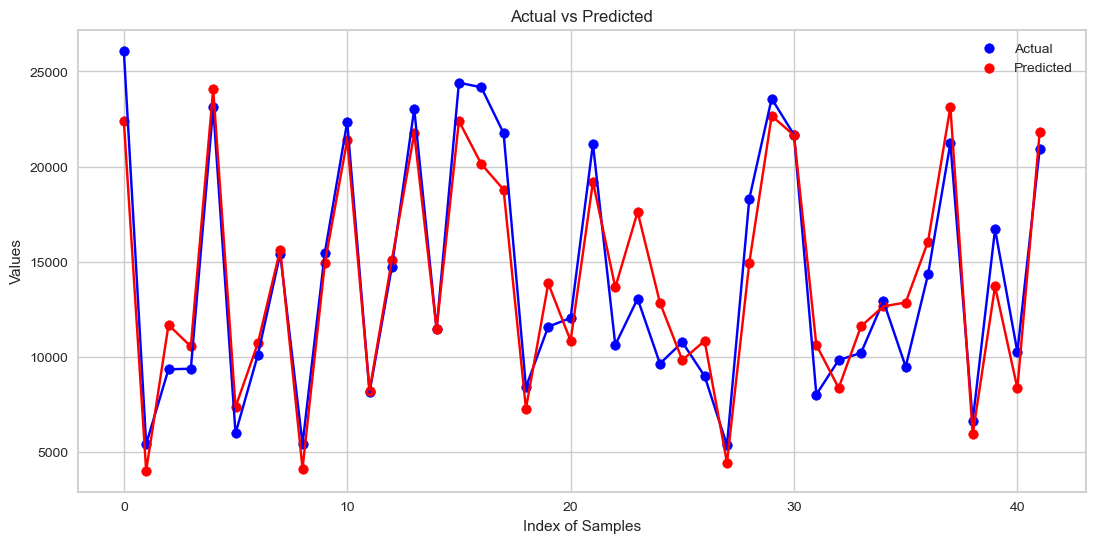


Residuals Scatter Plot:


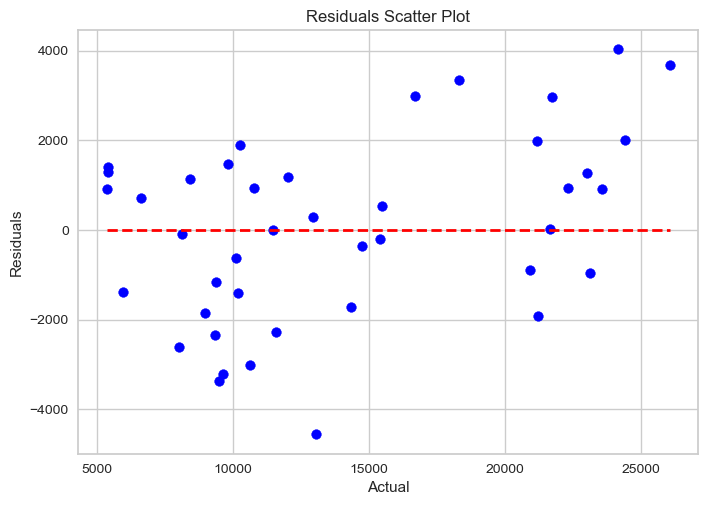


Residuals Histogram:


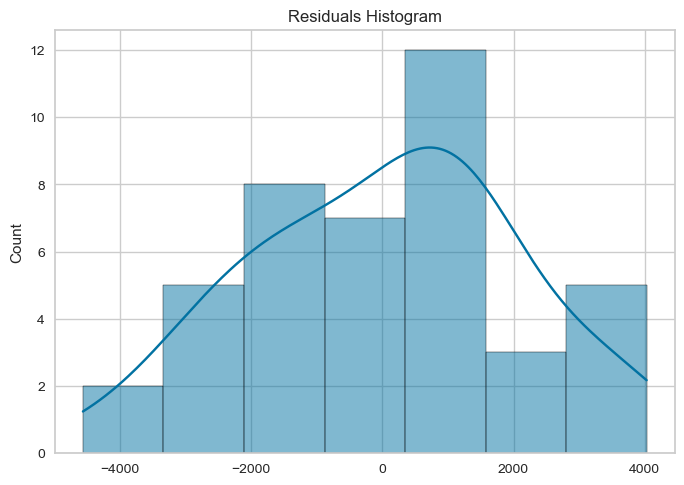

In [68]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['Number of Items',

    'DISTRIBUTED SAMPLES (.000)',
    'ONLINE REVIEWS',
    'Positive Opinions',
    'Negative Opinions',
    'NUMBER OF INFLUENCERS INVOLVED',
    'competitors_grp',
    'total_editors',
    'total_totem',
    'events_seasonal',
    'season_Summer'
], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Ridge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

Selected features for Ridge: Index(['Weighted Handling Distribution', 'AVERAGE PROMO PRICE', 'LOCKDOWN',
       'GRP TV 20''', 'GRP TV 10''', 'digital_investments',
       'Sales Value Growth (%)', 'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           9.43e-90
Time:                        00:23:46   Log-Likelihood:                -1459.0
No. Observations:                 166   AIC:                             2938.
Df Residuals:                     156   BIC:                             2969.
Df Model:                           9                                         
Covariance Type:            nonrobust     

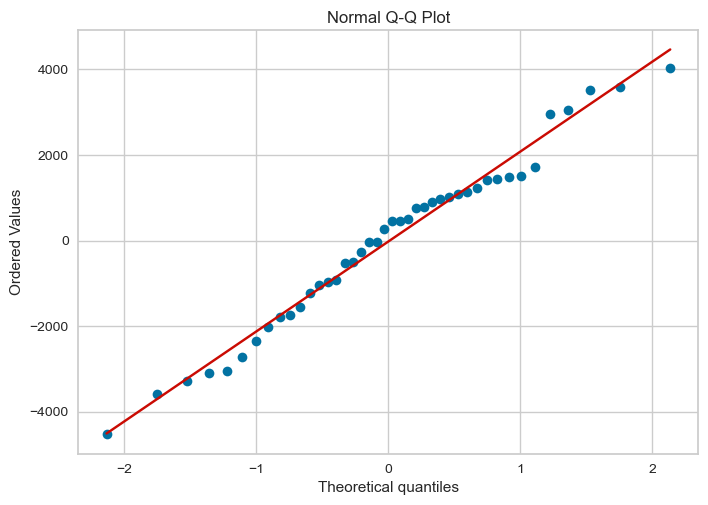


Actual vs Predicted:


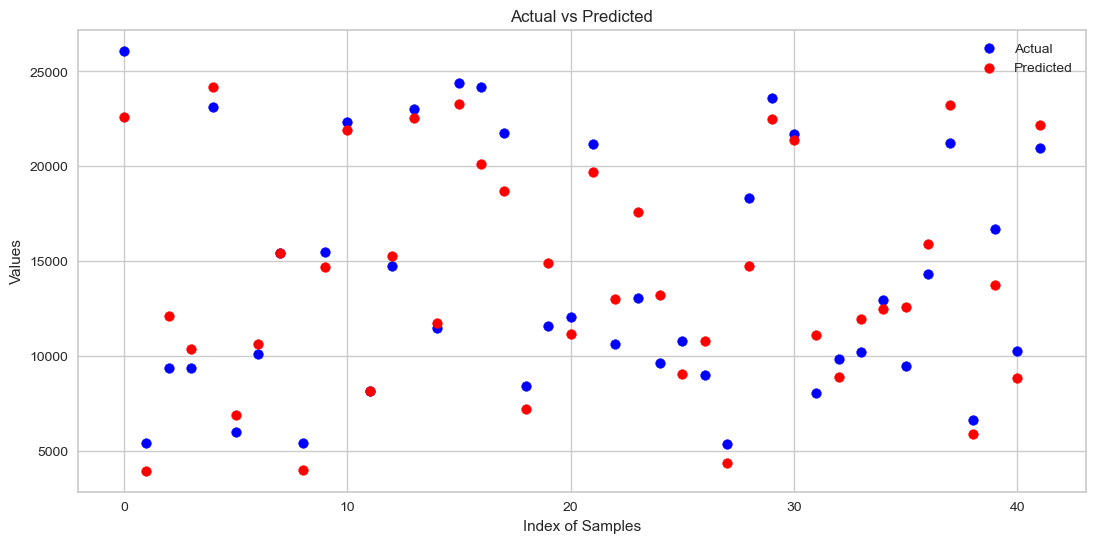

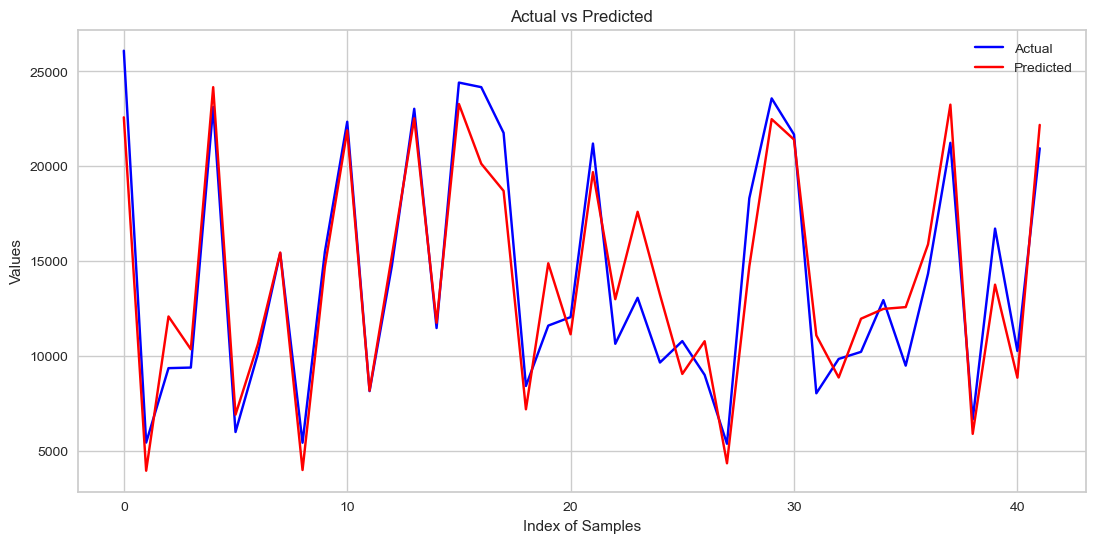

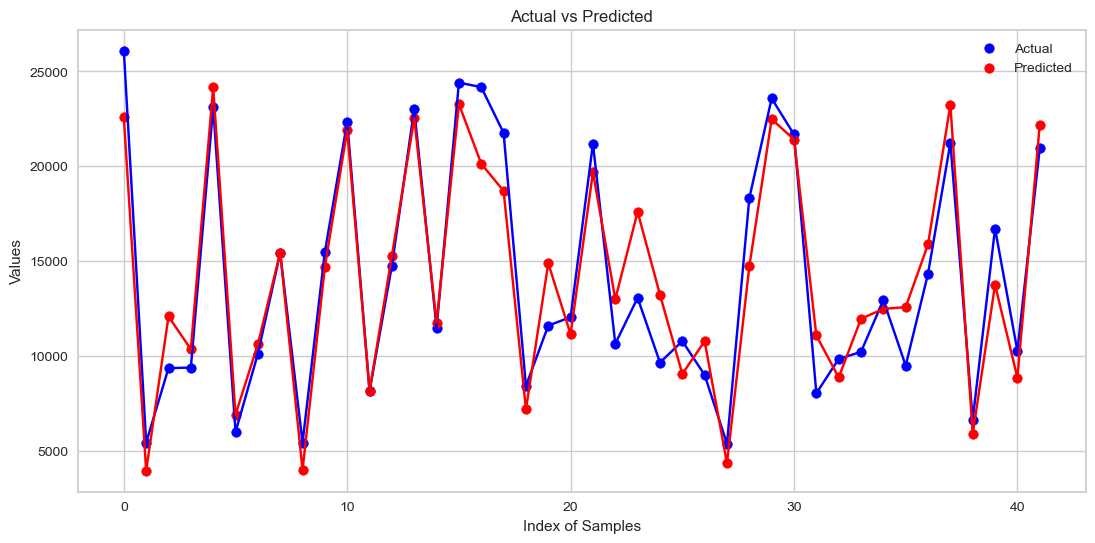


Residuals Scatter Plot:


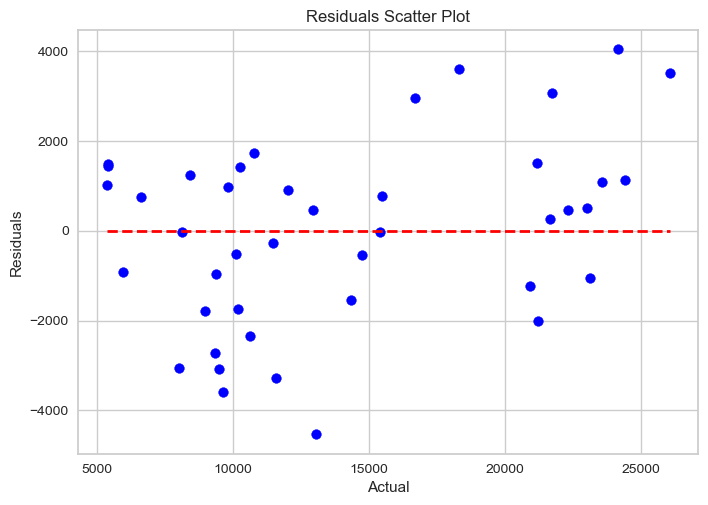


Residuals Histogram:


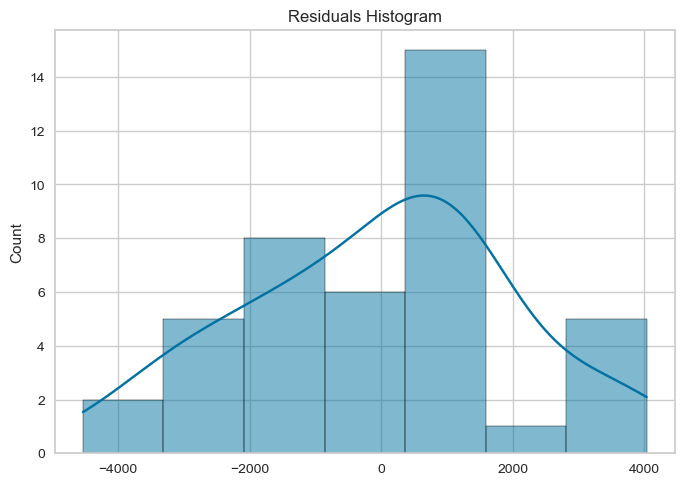

In [69]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['ONLINE RATINGS', 'AVERAGE PRICE MKT', 'SEASONALITY MARKET', 'season_Spring', 'INVESTMENTS PRINT', 'INVESTMENTS TV'], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Ridge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

### Lasso

#### No log, lag, adstock

Selected features: Index(['Weighted Handling Distribution', 'Number of Items',
       'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT', 'SEASONALITY MARKET',
       'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)', 'ONLINE REVIEWS',
       'ONLINE RATINGS', 'Positive Opinions', 'Negative Opinions',
       'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''', 'GRP TV 10''',
       'INVESTMENTS TV', 'INVESTMENTS PRINT', 'digital_investments',
       'competitors_grp', 'total_editors', 'total_totem', 'events_seasonal',
       'Sales Value Growth (%)', 'season_Spring', 'season_Summer',
       'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     99.19
Date:                Sun, 15 Sep 2024   Prob (F-statistic)

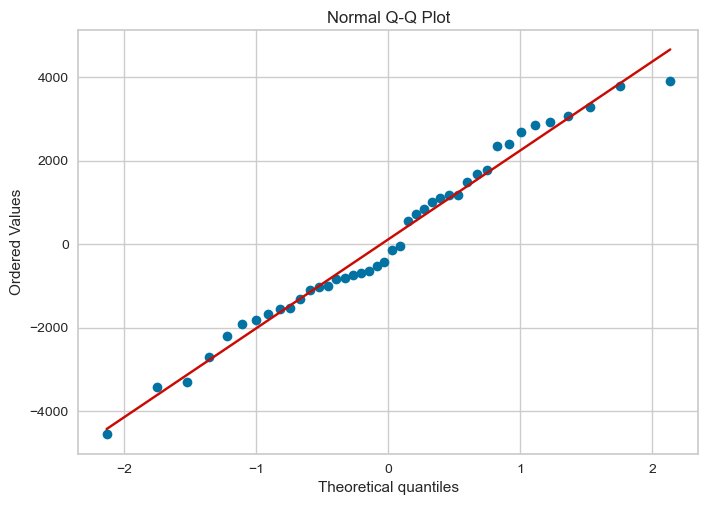


Actual vs Predicted:


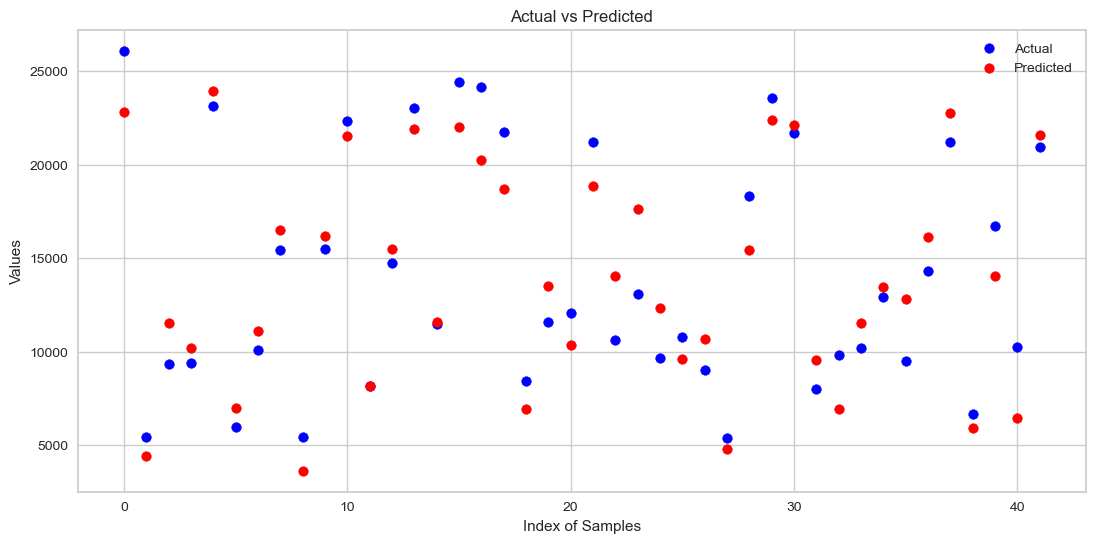

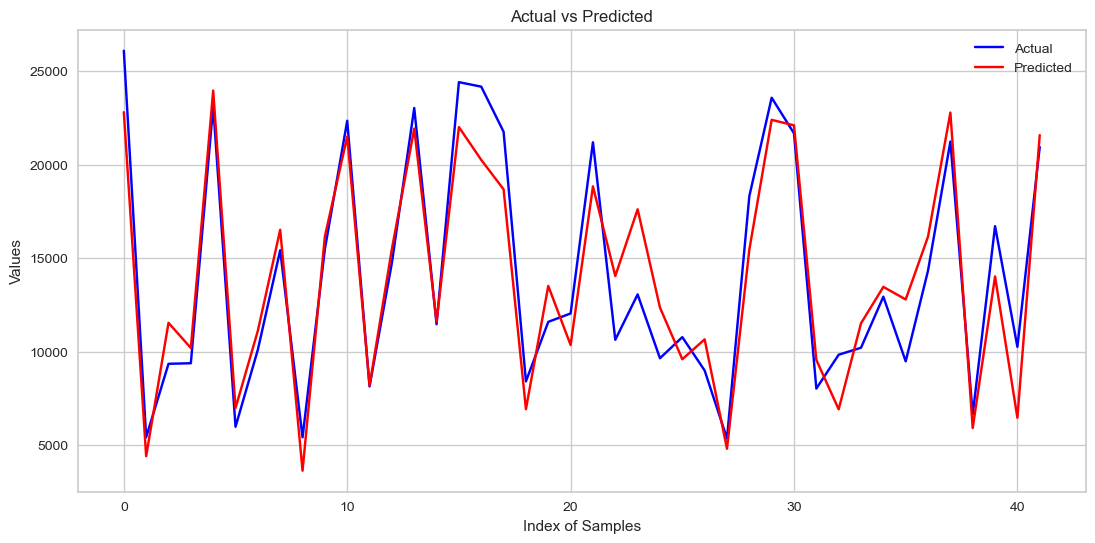

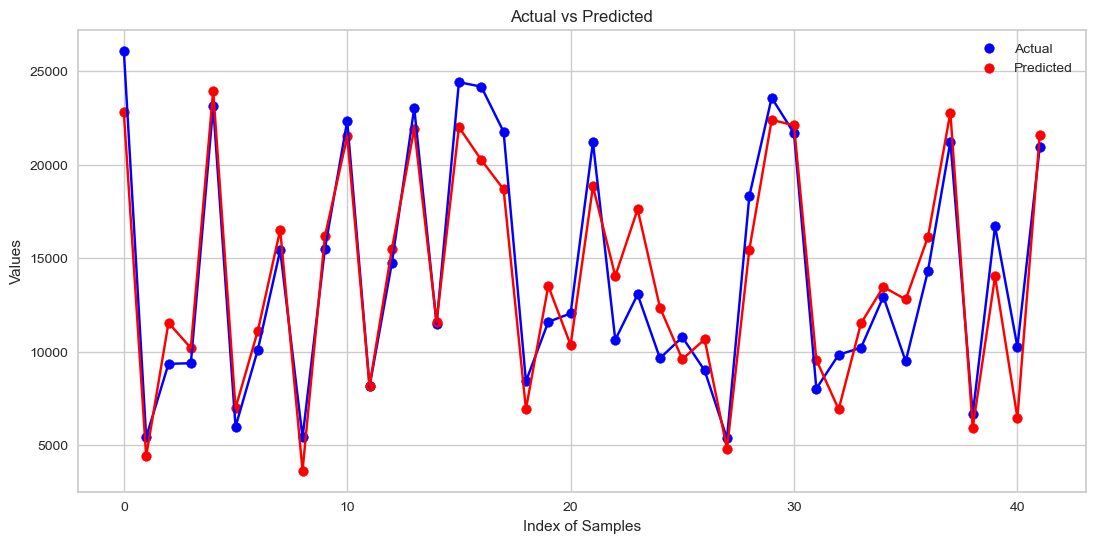


Residuals Scatter Plot:


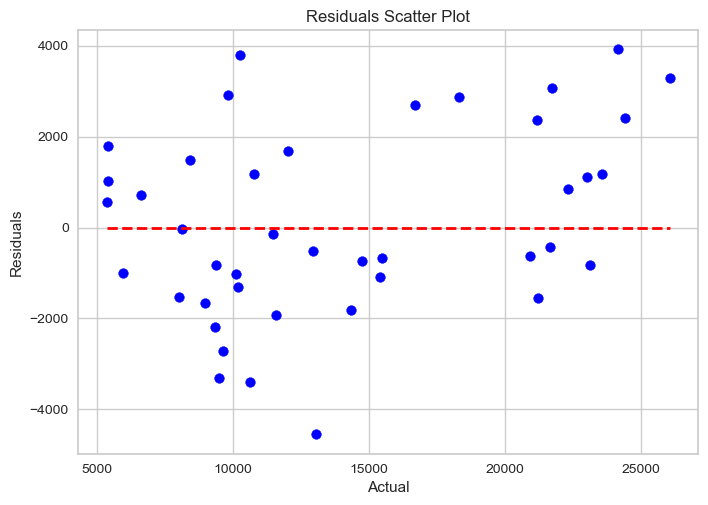


Residuals Histogram:


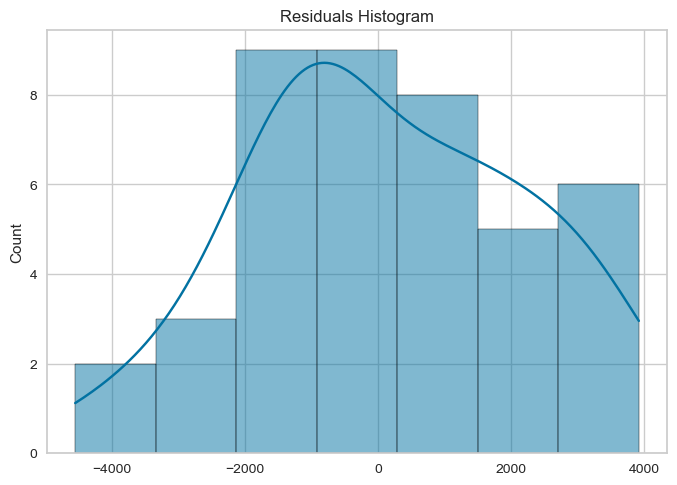

In [82]:
# Assuming dframe1 is your dataframe
X = first_df.drop(['Value Sales Brand'], axis=1)
y = first_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Lasso', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

Selected features: Index(['Weighted Handling Distribution', 'AVERAGE PROMO PRICE',
       'AVERAGE PRICE MKT', 'SEASONALITY MARKET', 'LOCKDOWN', 'ONLINE RATINGS',
       'GRP TV 20''', 'GRP TV 10''', 'INVESTMENTS TV', 'INVESTMENTS PRINT',
       'digital_investments', 'Sales Value Growth (%)', 'season_Spring',
       'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     158.5
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           7.59e-84
Time:                        00:23:51   Log-Likelihood:                -1456.1
No. Observations:                 166   AIC:                             2944.
Df Residuals:                     150   BIC:                             2994.


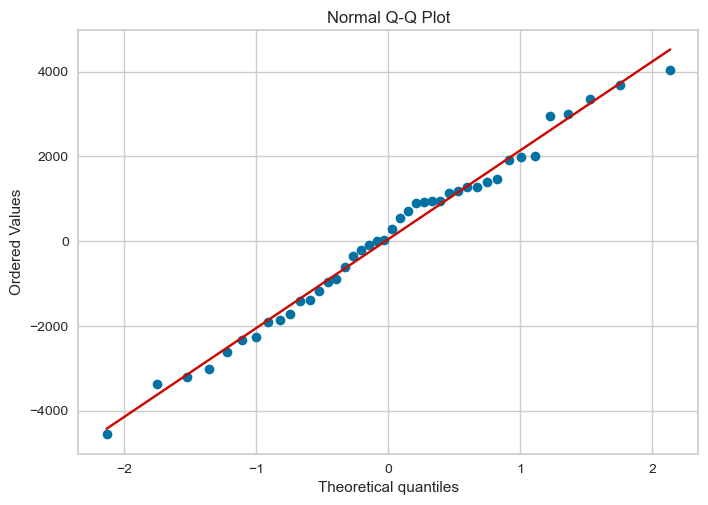


Actual vs Predicted:


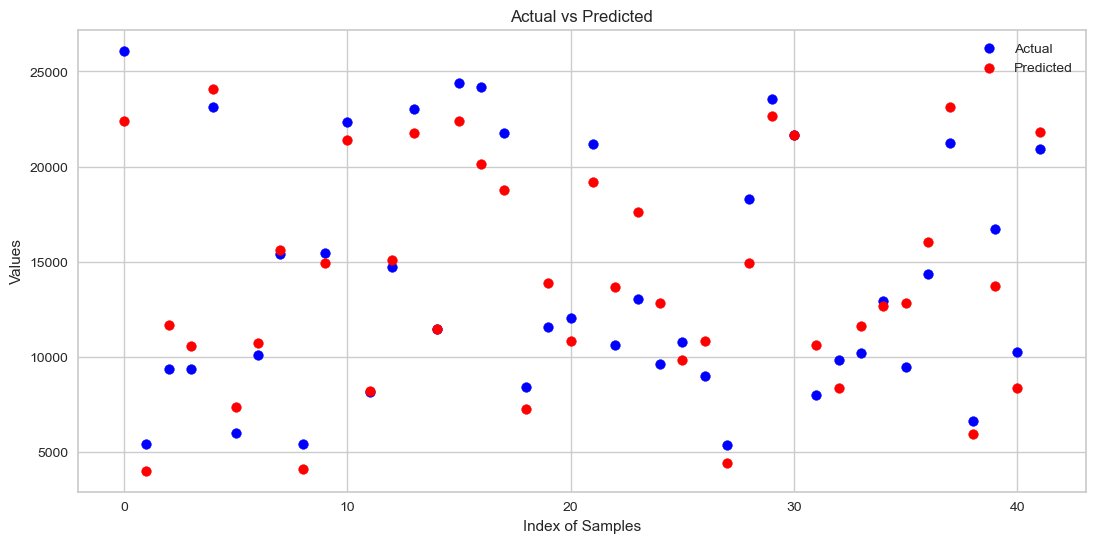

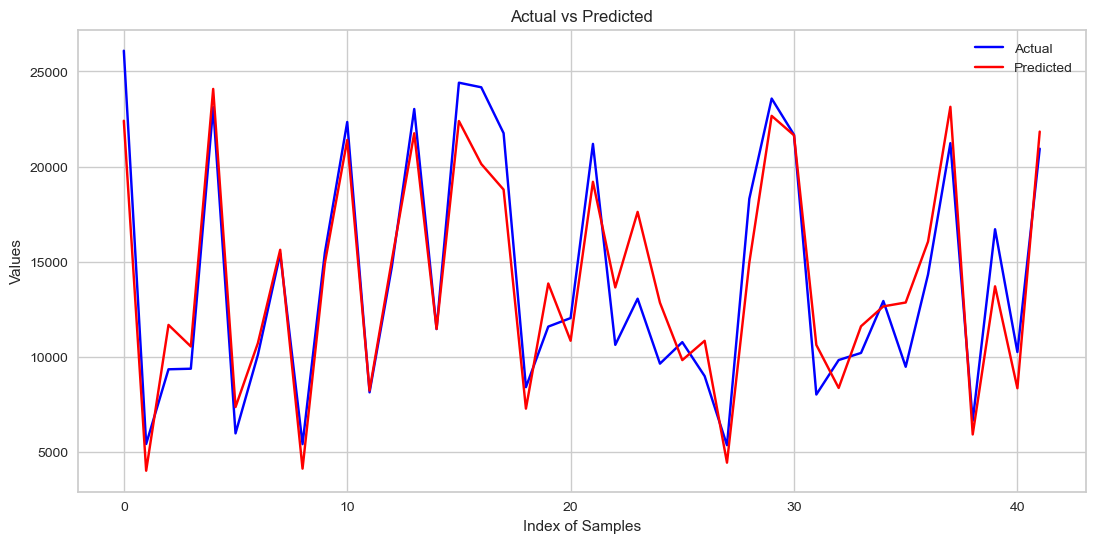

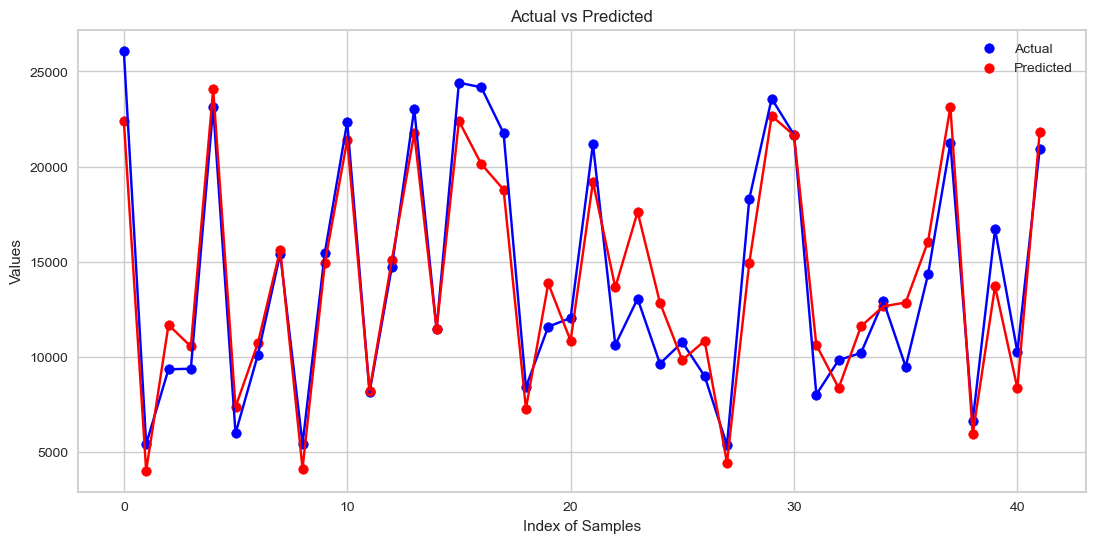


Residuals Scatter Plot:


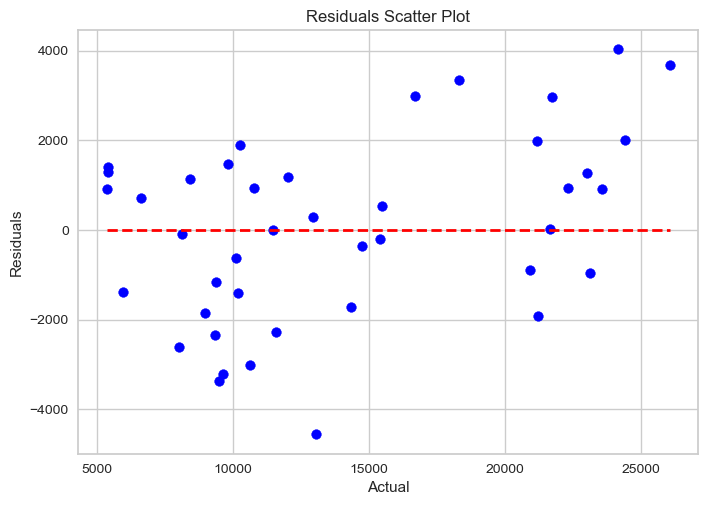


Residuals Histogram:


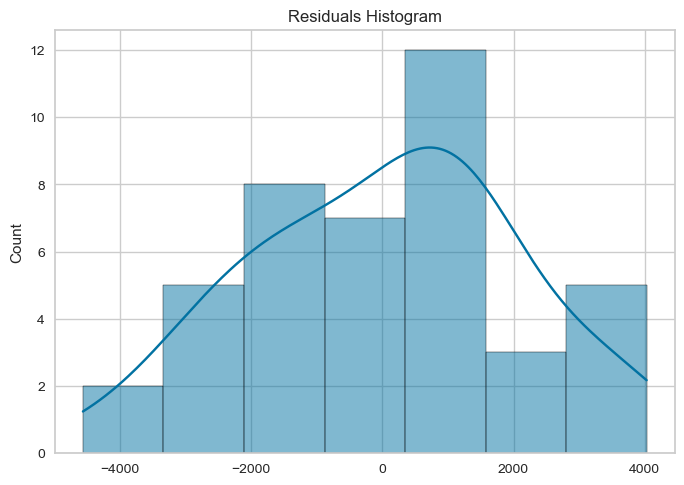

In [83]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['Number of Items',
    'DISTRIBUTED SAMPLES (.000)',
    'ONLINE REVIEWS',
    'Positive Opinions',
    'Negative Opinions',
    'NUMBER OF INFLUENCERS INVOLVED',
    'competitors_grp',
    'total_editors',
    'total_totem',
    'events_seasonal',
    'season_Summer'], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Lasso', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

Selected features: Index(['Weighted Handling Distribution', 'AVERAGE PROMO PRICE', 'LOCKDOWN',
       'GRP TV 20''', 'GRP TV 10''', 'digital_investments',
       'Sales Value Growth (%)', 'season_Winter', 'promo'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     265.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           9.43e-90
Time:                        00:23:52   Log-Likelihood:                -1459.0
No. Observations:                 166   AIC:                             2938.
Df Residuals:                     156   BIC:                             2969.
Df Model:                           9                                         
Covariance Type:            nonrobust               

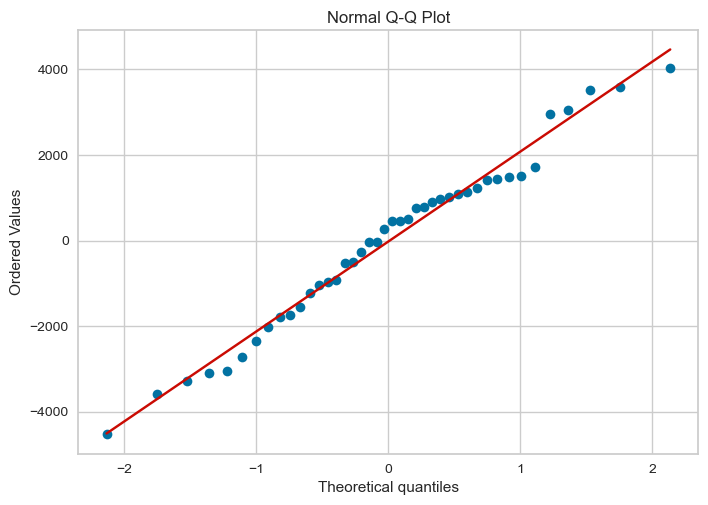


Actual vs Predicted:


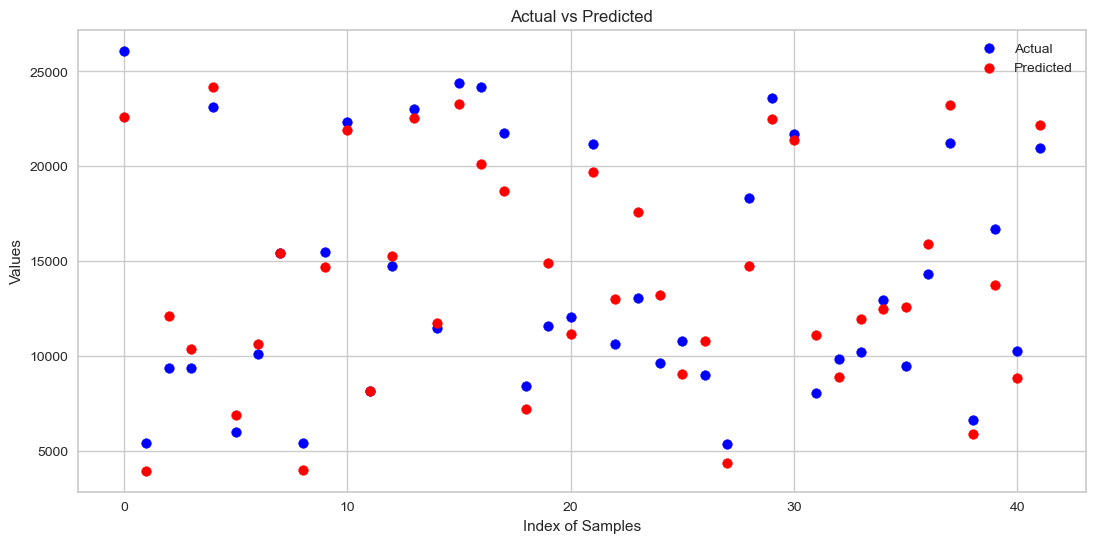

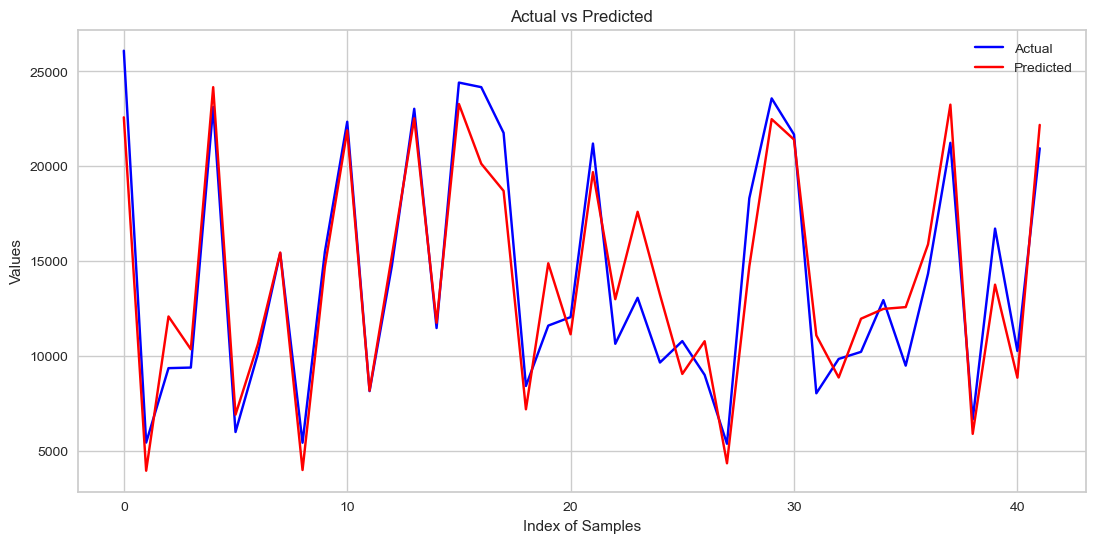

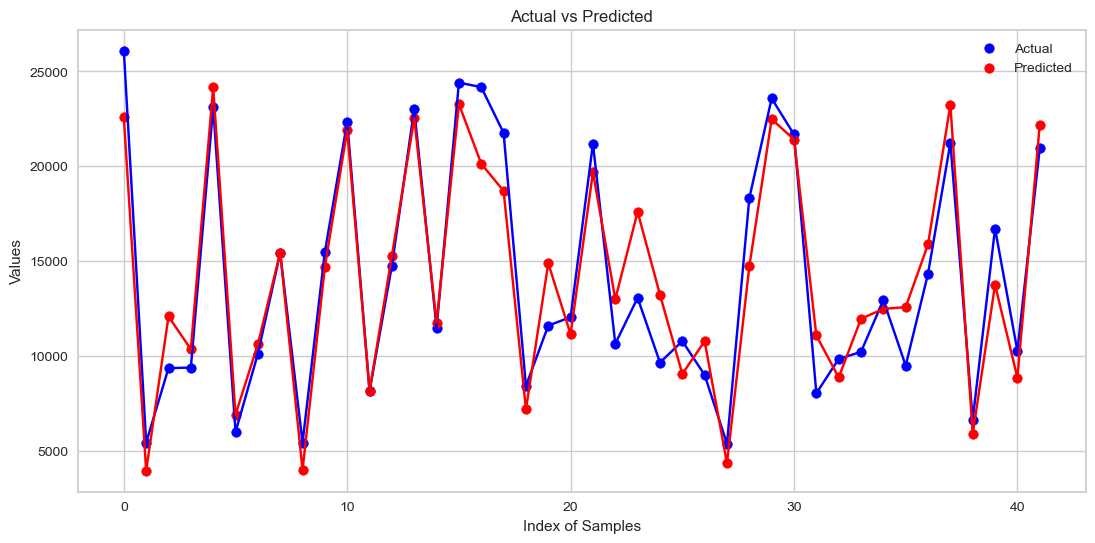


Residuals Scatter Plot:


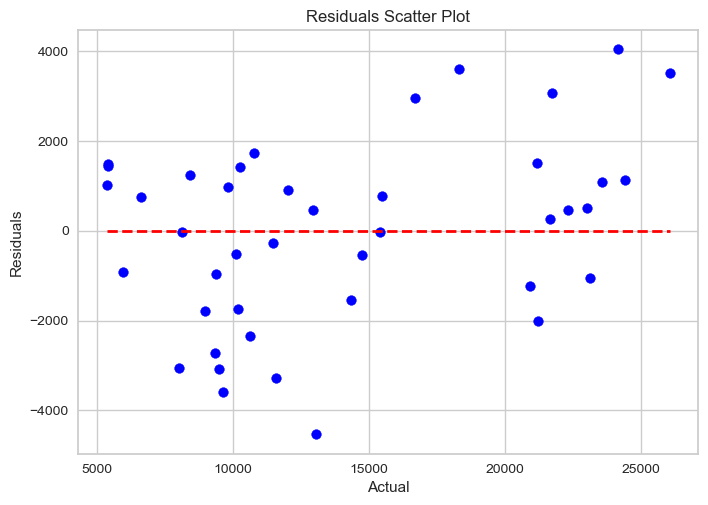


Residuals Histogram:


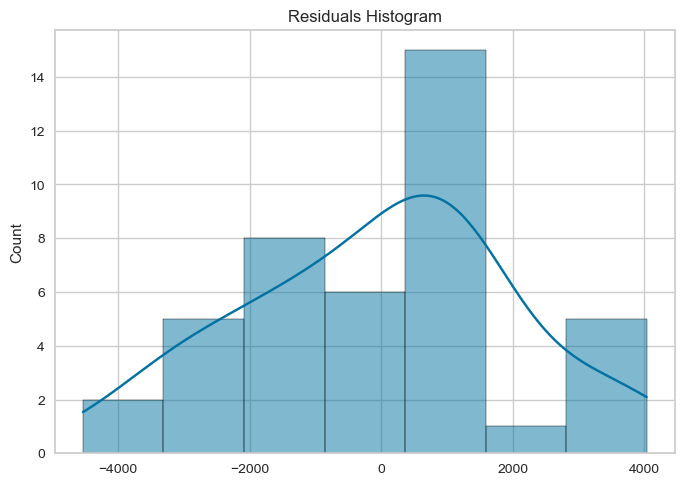

In [84]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['AVERAGE PRICE MKT', 'SEASONALITY MARKET', 'ONLINE RATINGS', 'season_Spring', 'INVESTMENTS TV', 'INVESTMENTS PRINT'], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='Lasso', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

## Conclusion

In [94]:
first_df.columns

Index(['Value Sales Brand', 'Weighted Handling Distribution',
       'Number of Items', 'AVERAGE PROMO PRICE', 'AVERAGE PRICE MKT',
       'SEASONALITY MARKET', 'LOCKDOWN', 'DISTRIBUTED SAMPLES (.000)',
       'ONLINE REVIEWS', 'ONLINE RATINGS', 'Positive Opinions',
       'Negative Opinions', 'NUMBER OF INFLUENCERS INVOLVED', 'GRP TV 20''',
       'GRP TV 10''', 'INVESTMENTS TV', 'INVESTMENTS PRINT',
       'digital_investments', 'competitors_grp', 'total_editors',
       'total_totem', 'events_seasonal', 'Sales Value Growth (%)',
       'season_Spring', 'season_Summer', 'season_Winter', 'promo'],
      dtype='object')

#### NO PROMO LOG, LAG, ADSTOCK

In [96]:
import pandas as pd

# Assuming 'first_df' is your DataFrame with the relevant columns
columns_to_transform = [
    'NUMBER OF INFLUENCERS INVOLVED', 
    'INVESTMENTS TV', 'INVESTMENTS PRINT', 
    'Weighted Handling Distribution', 
    'LOCKDOWN', 
]

# Create a subset of the DataFrame with only the columns of interest
df_to_transform = first_df[columns_to_transform]


In [97]:
import numpy as np
from scipy.stats import skew, kurtosis

def apply_log_transformation(df):
    df_log = df.copy()
    columns_to_drop = []

    for feature in df_log.columns:
        feature_skewness = skew(df_log[feature])
        feature_kurtosis = kurtosis(df_log[feature])
        
        if abs(feature_skewness) > 1 or feature_kurtosis > 3:
            print(f"Transforming '{feature}' due to skewness ({feature_skewness}) or kurtosis ({feature_kurtosis})")
            df_log[f"{feature}_log"] = np.log(df_log[feature] + 1)  # Apply log transformation
            columns_to_drop.append(feature)
    
    df_log.drop(columns=columns_to_drop, inplace=True)
    return df_log

df_log_transformed = apply_log_transformation(df_to_transform)


Transforming 'NUMBER OF INFLUENCERS INVOLVED' due to skewness (7.166641379384534) or kurtosis (53.833942064435114)
Transforming 'INVESTMENTS TV' due to skewness (2.3502548545973054) or kurtosis (4.553935710568297)
Transforming 'INVESTMENTS PRINT' due to skewness (13.950250765398362) or kurtosis (195.61036944075357)
Transforming 'LOCKDOWN' due to skewness (3.17542648054294) or kurtosis (8.08333333333334)


In [98]:
def apply_lag_and_adstock(df, lag=1, window_adstock=10, rate_adstock=0.5):
    df_lag_ads = df.copy()
    
    # Apply Lag
    for col in df_lag_ads.columns:
        df_lag_ads[col + '_lag'] = df_lag_ads[col].shift(lag)

    # Keep only lagged columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_lag')]].dropna().reset_index(drop=True)

    # Apply Adstock
    for var in df_lag_ads.columns:
        df_lag_ads[var + '_halo'] = df_lag_ads[var]
        for i in range(1, window_adstock + 1):
            df_lag_ads[var + '_halo'] += df_lag_ads[var].shift(i).fillna(0) * rate_adstock ** i

    # Keep only adstocked columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_halo')]].dropna().reset_index(drop=True)
    
    return df_lag_ads

df_lag_adstock_transformed = apply_lag_and_adstock(df_log_transformed)


In [99]:
# Merge transformed columns back into the original DataFrame
final_df = first_df.join(df_lag_adstock_transformed)

# Drop original columns that were transformed if needed
final_df.drop(columns=columns_to_transform, inplace=True)


In [100]:
#BayesianRidge

In [101]:
final_df = final_df.fillna(0)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     79.81
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.00e-70
Time:                        00:23:55   Log-Likelihood:                -1460.8
No. Observations:                 166   AIC:                             2976.
Df Residuals:                     139   BIC:                             3060.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

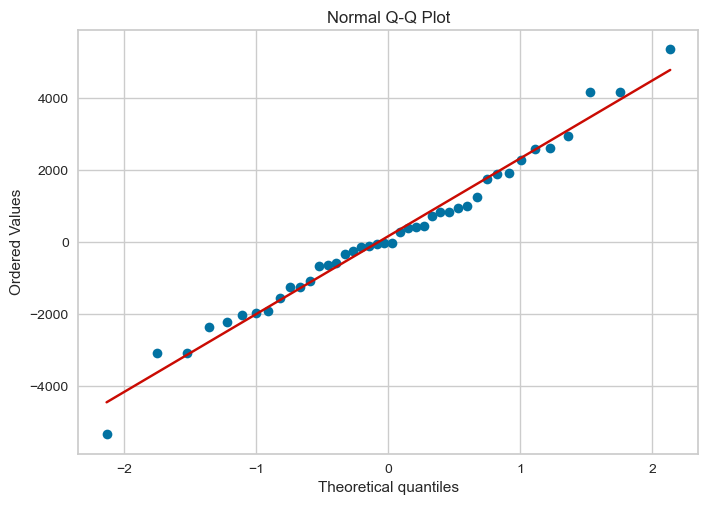


Actual vs Predicted:


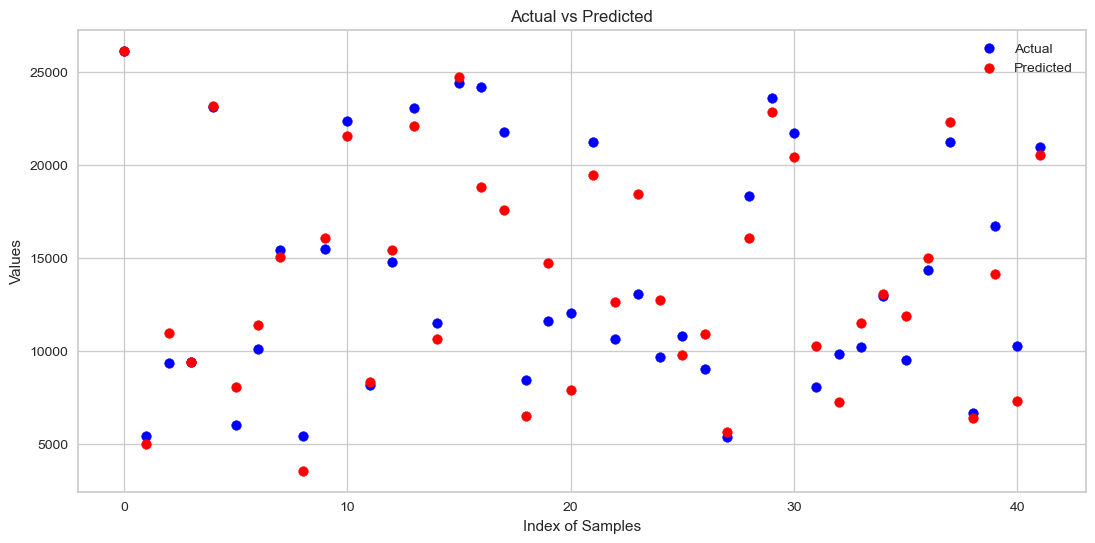

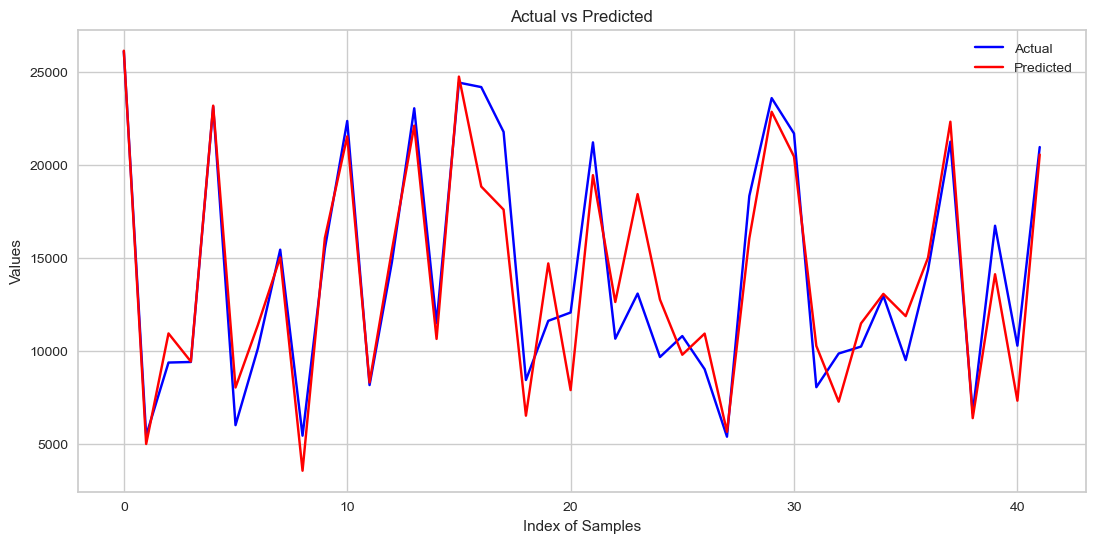

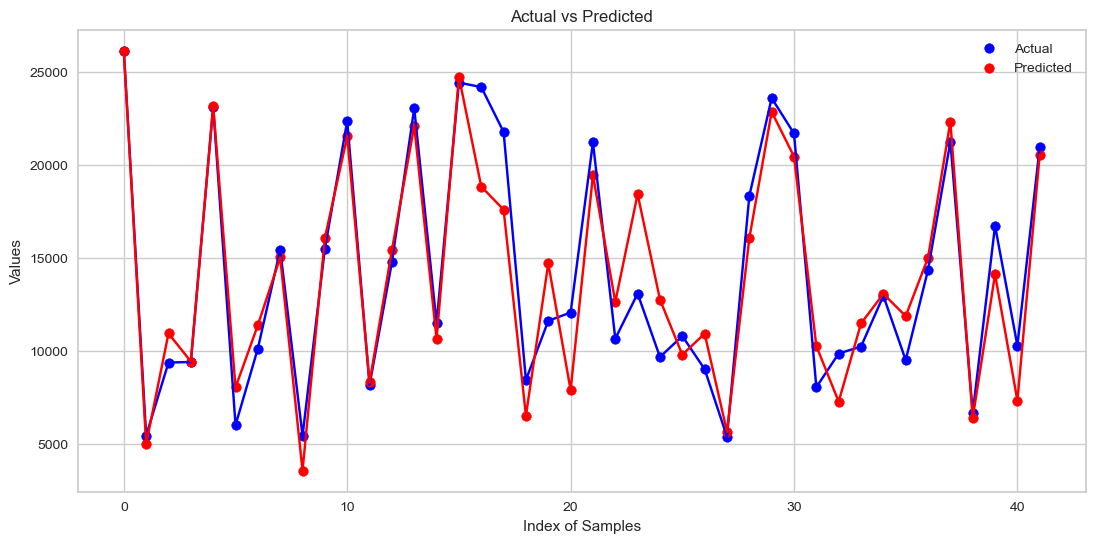


Residuals Scatter Plot:


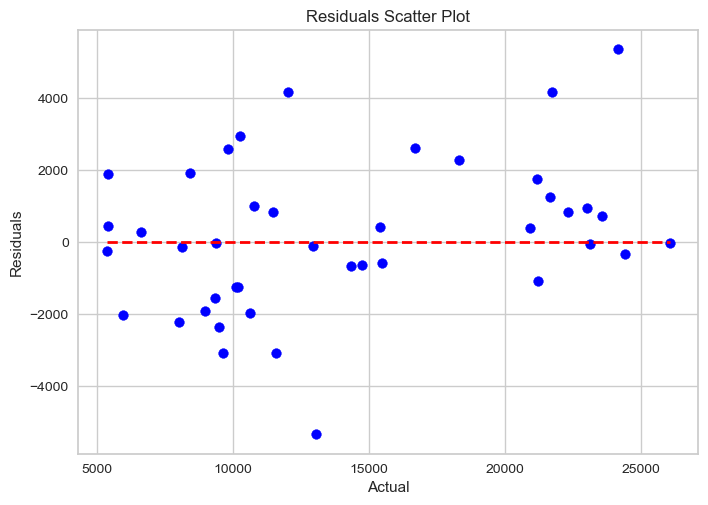


Residuals Histogram:


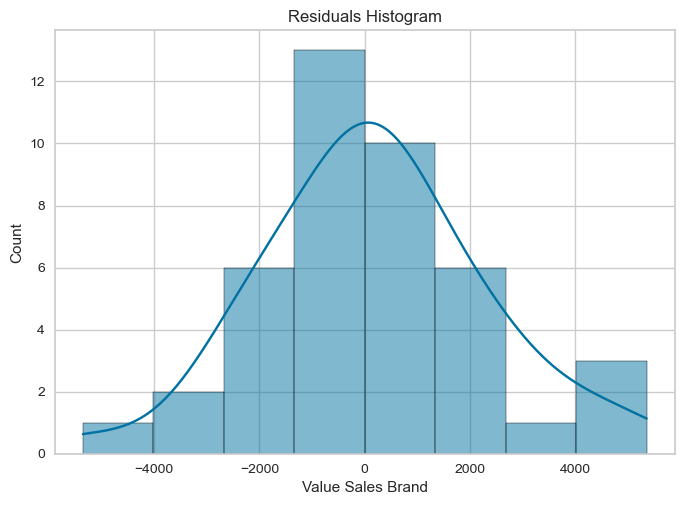

In [102]:
# Assuming dframe1 is your dataframe
X = final_df.drop(['Value Sales Brand'], axis=1)
y = final_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.71e-75
Time:                        00:23:56   Log-Likelihood:                -1464.0
No. Observations:                 166   AIC:                             2970.
Df Residuals:                     145   BIC:                             3035.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

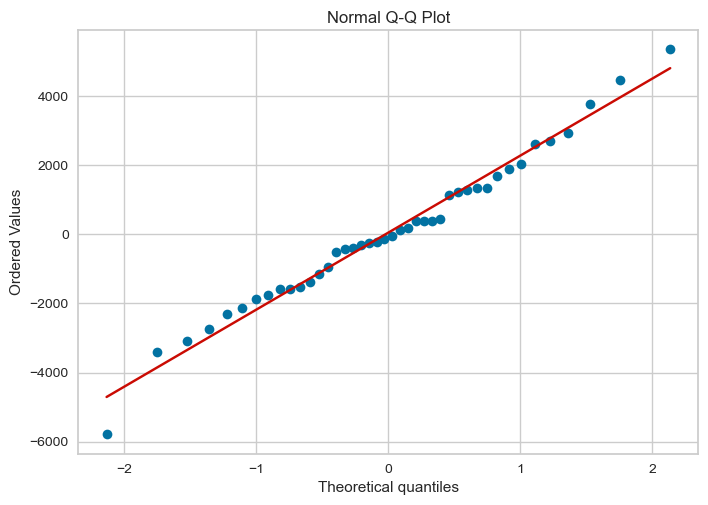


Actual vs Predicted:


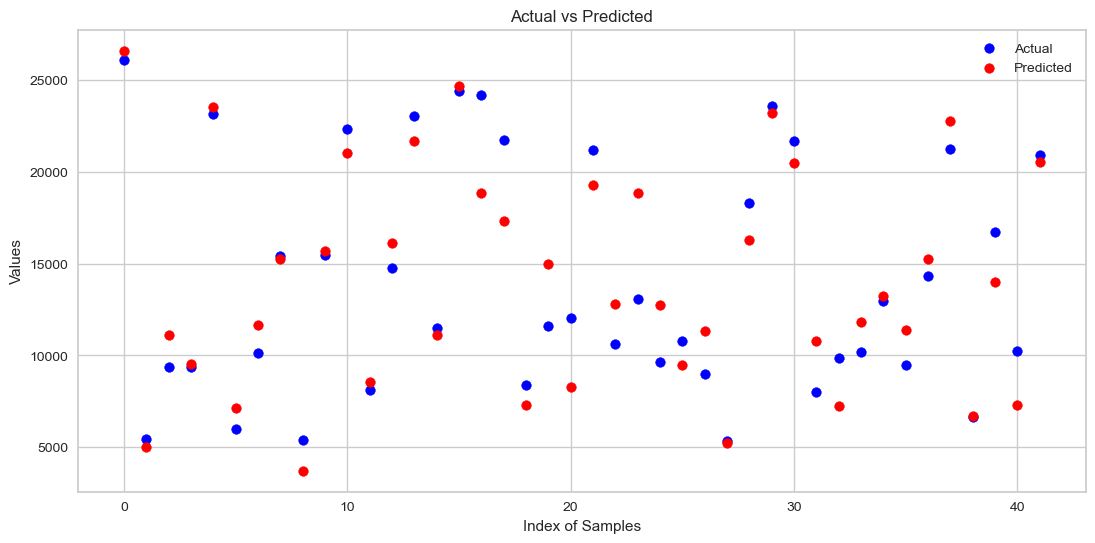

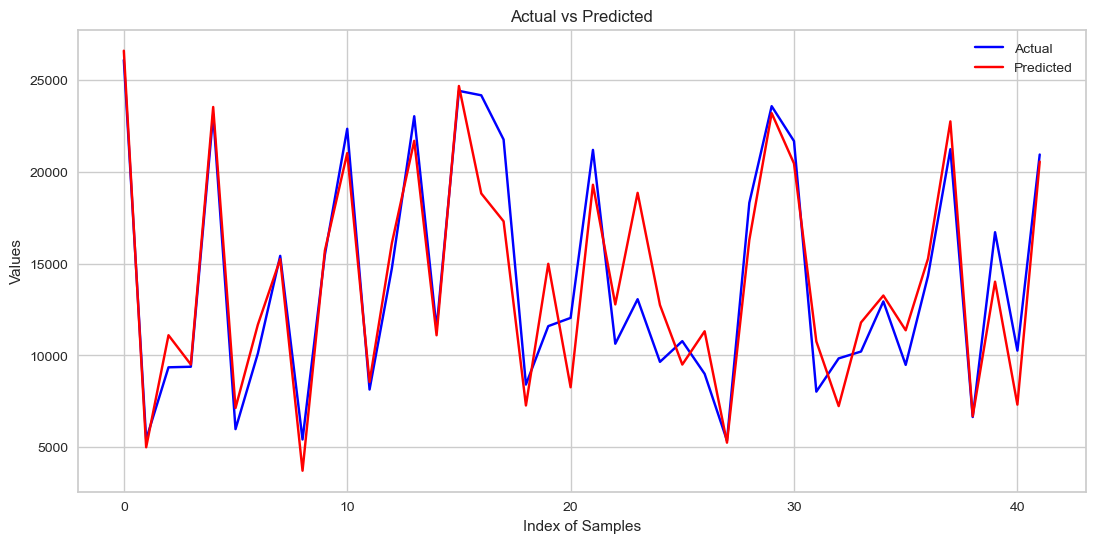

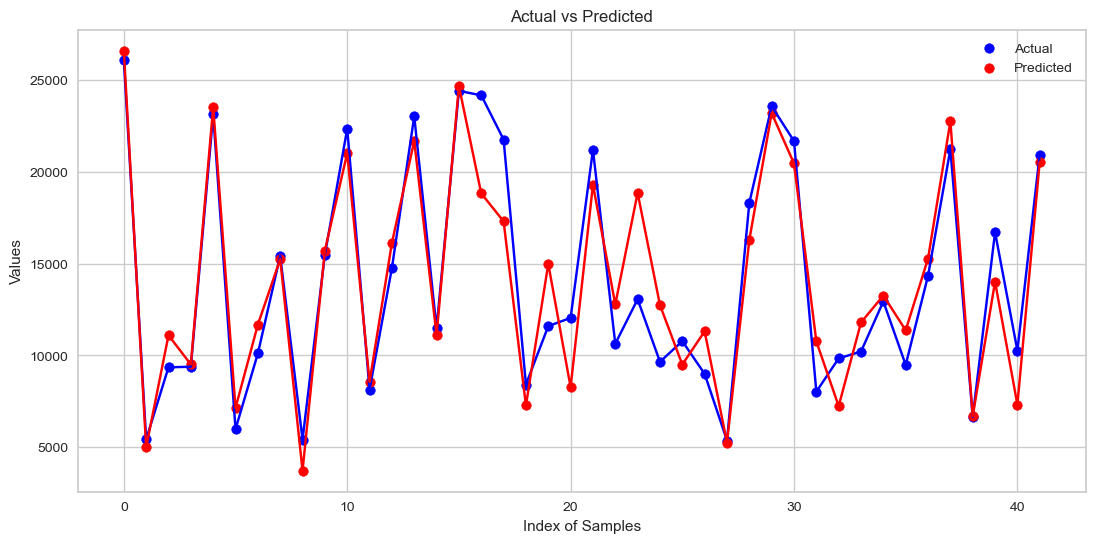


Residuals Scatter Plot:


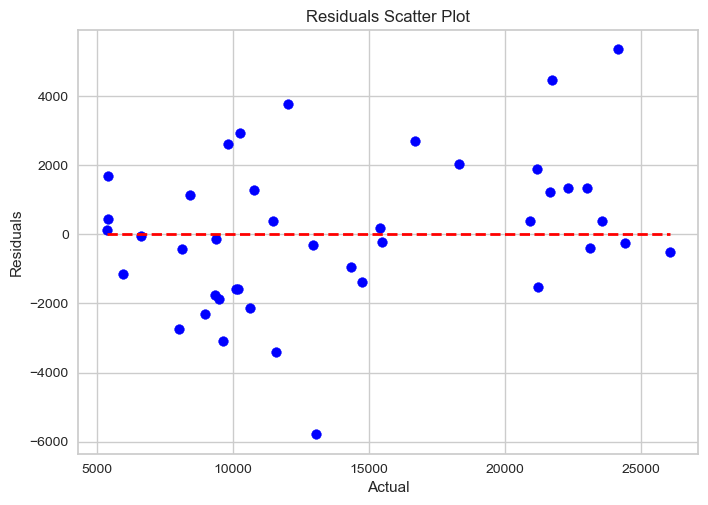


Residuals Histogram:


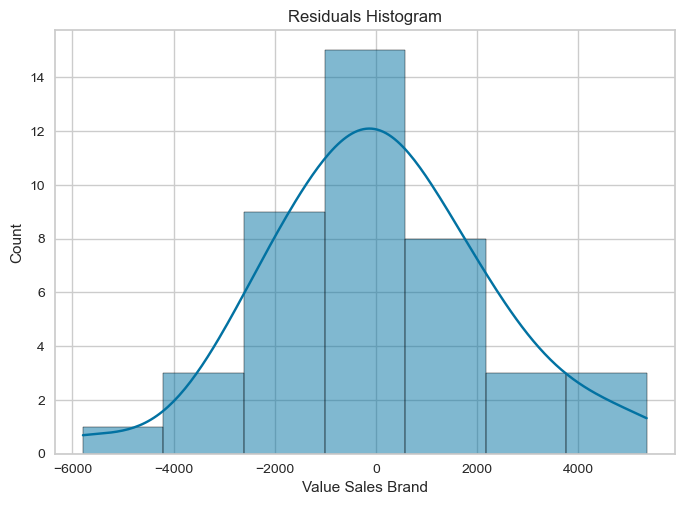

In [103]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['Number of Items', 'AVERAGE PRICE MKT', 'competitors_grp', 'total_editors', 'DISTRIBUTED SAMPLES (.000)', 'events_seasonal'], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     129.6
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.55e-76
Time:                        00:23:56   Log-Likelihood:                -1477.6
No. Observations:                 166   AIC:                             2985.
Df Residuals:                     151   BIC:                             3032.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

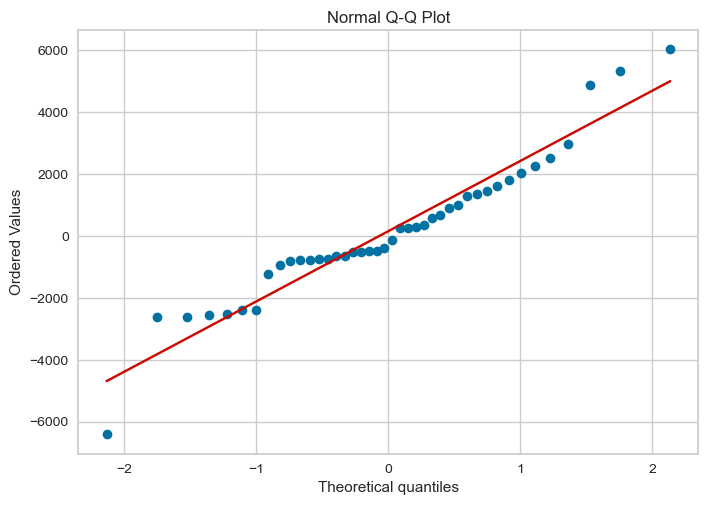


Actual vs Predicted:


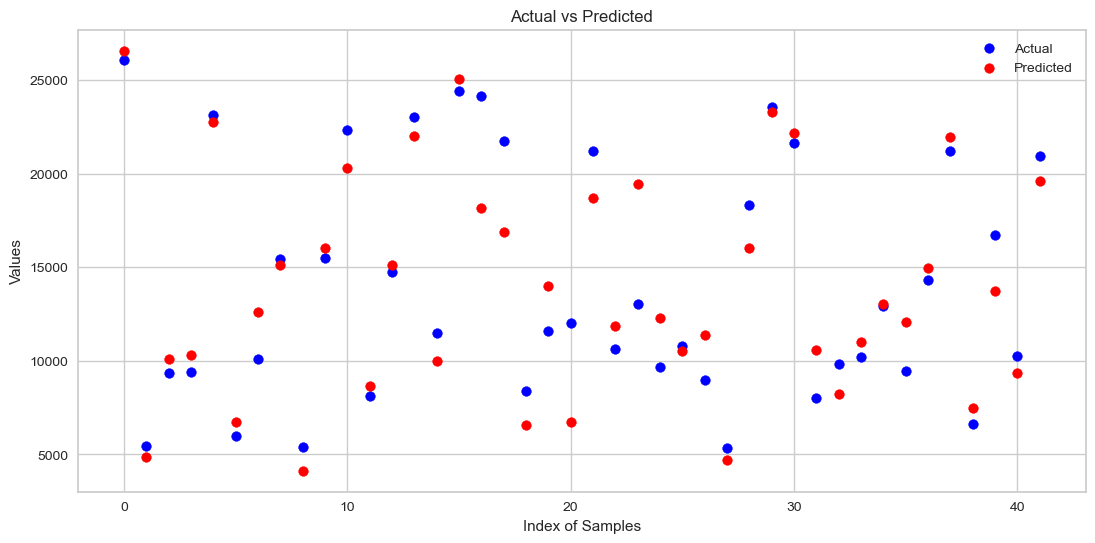

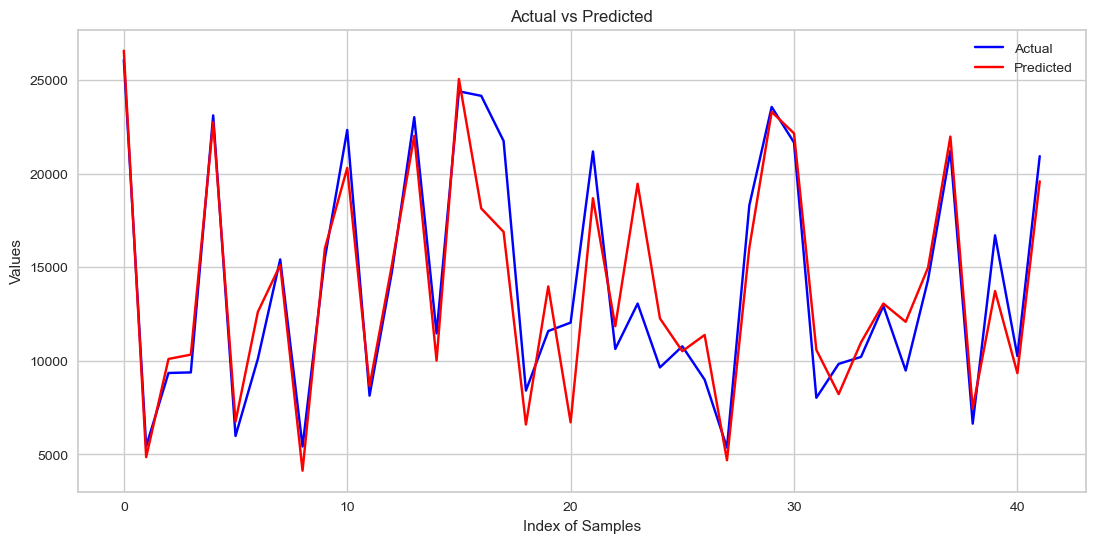

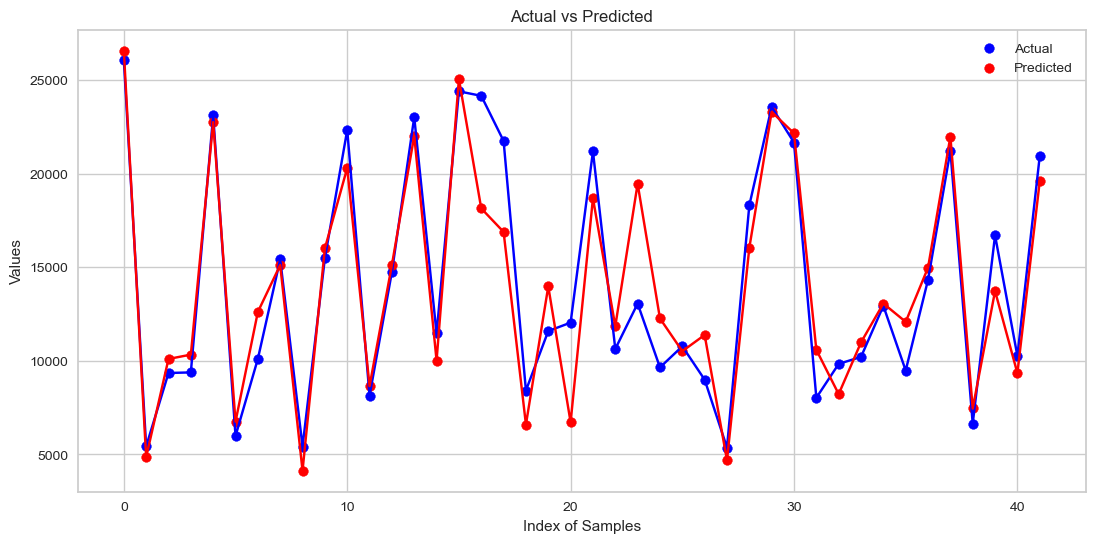


Residuals Scatter Plot:


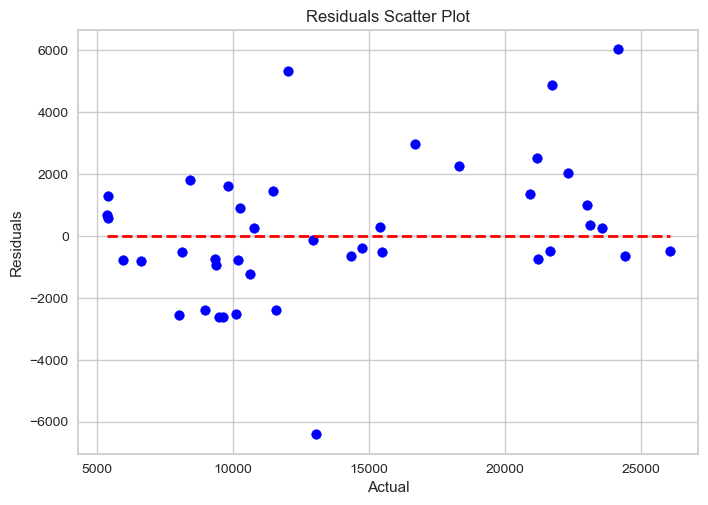


Residuals Histogram:


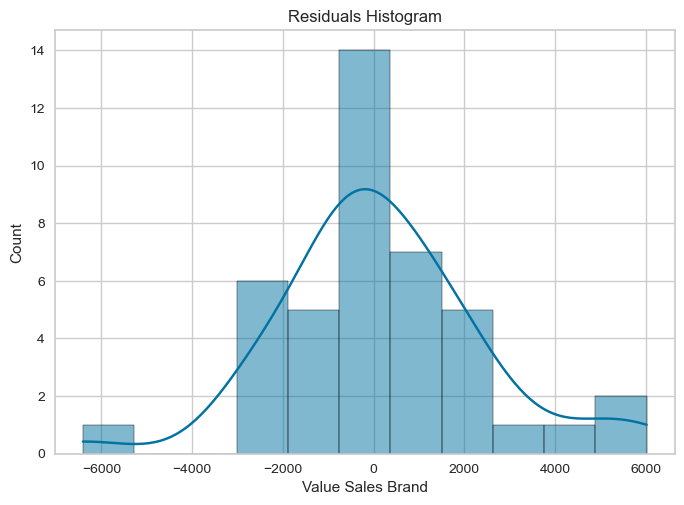

In [104]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['SEASONALITY MARKET', 'total_totem', 'Positive Opinions', 'season_Spring', 
              'Weighted Handling Distribution_lag_halo', 'LOCKDOWN_log_lag_halo'], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     148.7
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           8.03e-78
Time:                        00:23:57   Log-Likelihood:                -1479.9
No. Observations:                 166   AIC:                             2986.
Df Residuals:                     153   BIC:                             3026.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

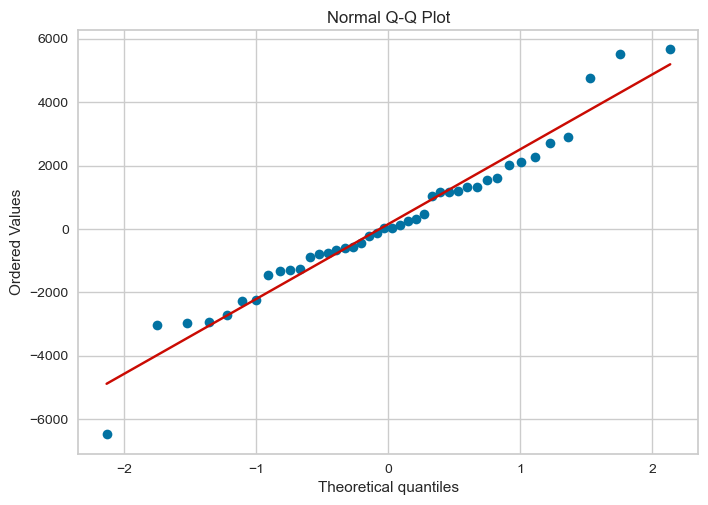


Actual vs Predicted:


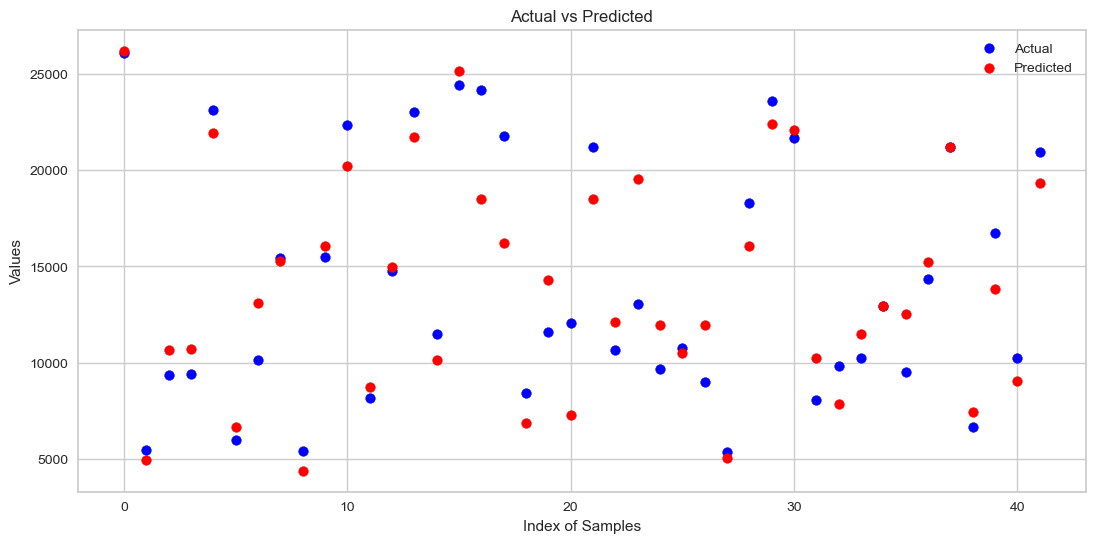

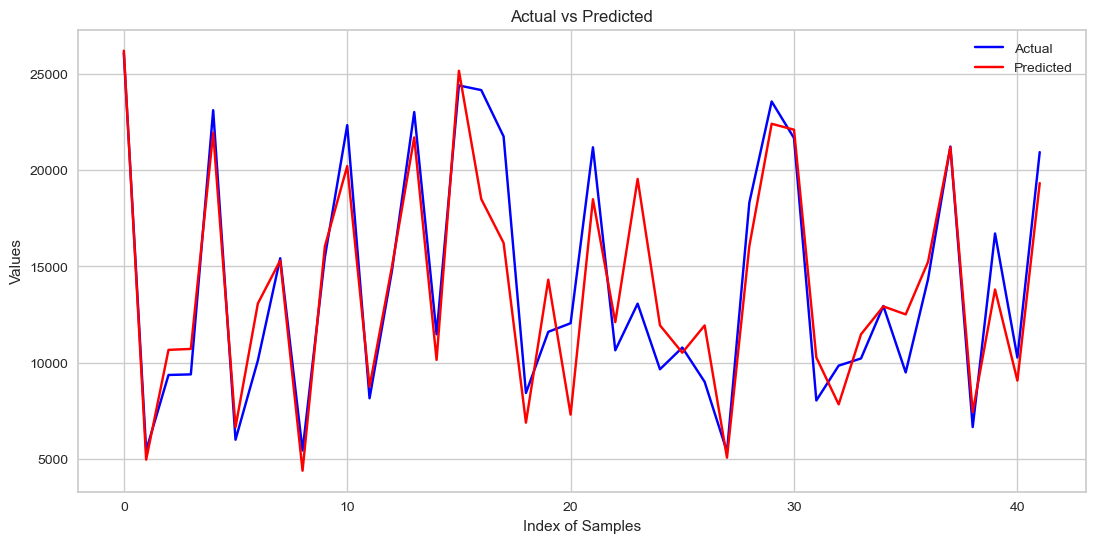

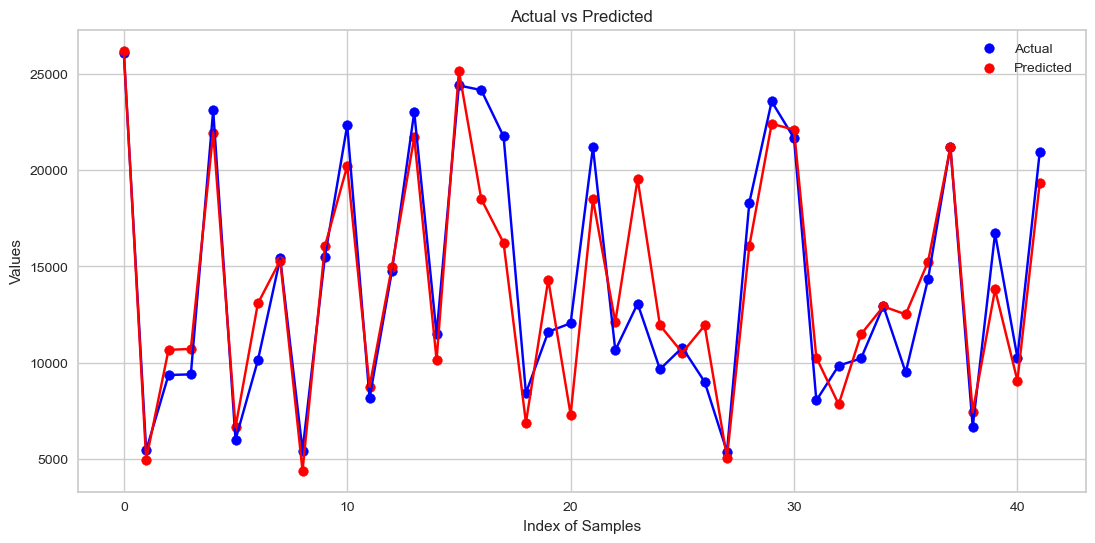


Residuals Scatter Plot:


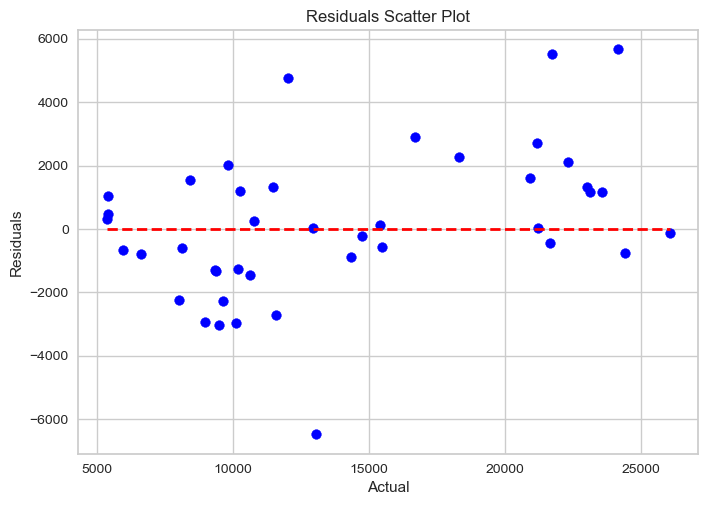


Residuals Histogram:


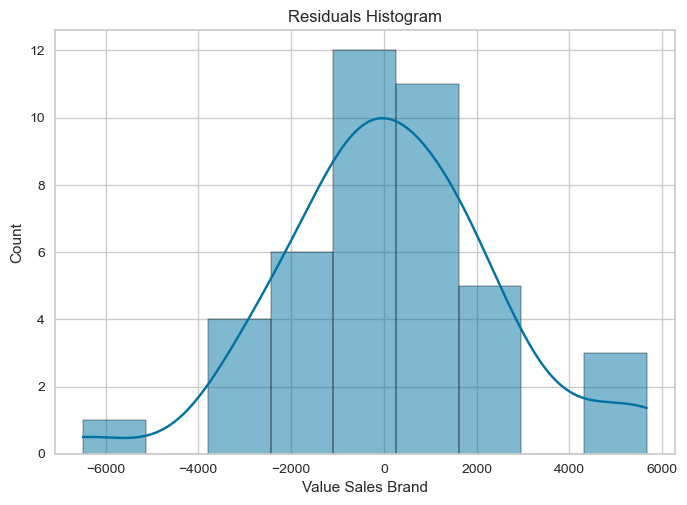

In [105]:
# Assuming dframe1 is your dataframe
X3 = X2.drop(['season_Winter', 'ONLINE RATINGS'], axis=1)
y3 = y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     161.3
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.47e-78
Time:                        00:23:57   Log-Likelihood:                -1480.8
No. Observations:                 166   AIC:                             2986.
Df Residuals:                     154   BIC:                             3023.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

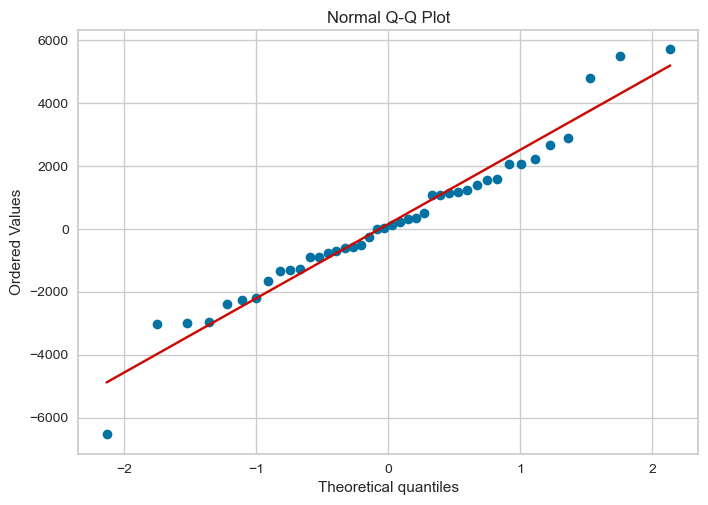


Actual vs Predicted:


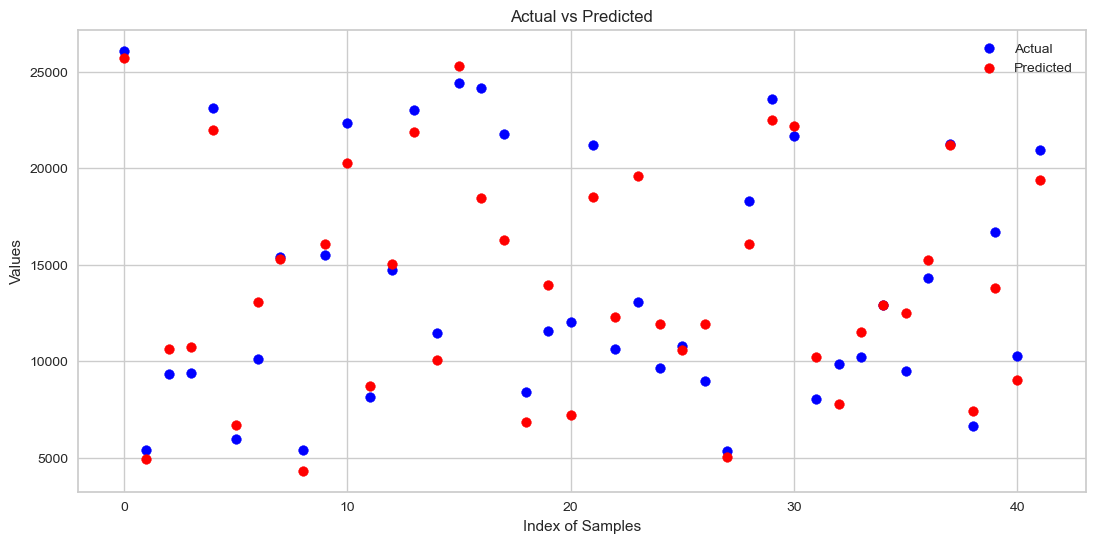

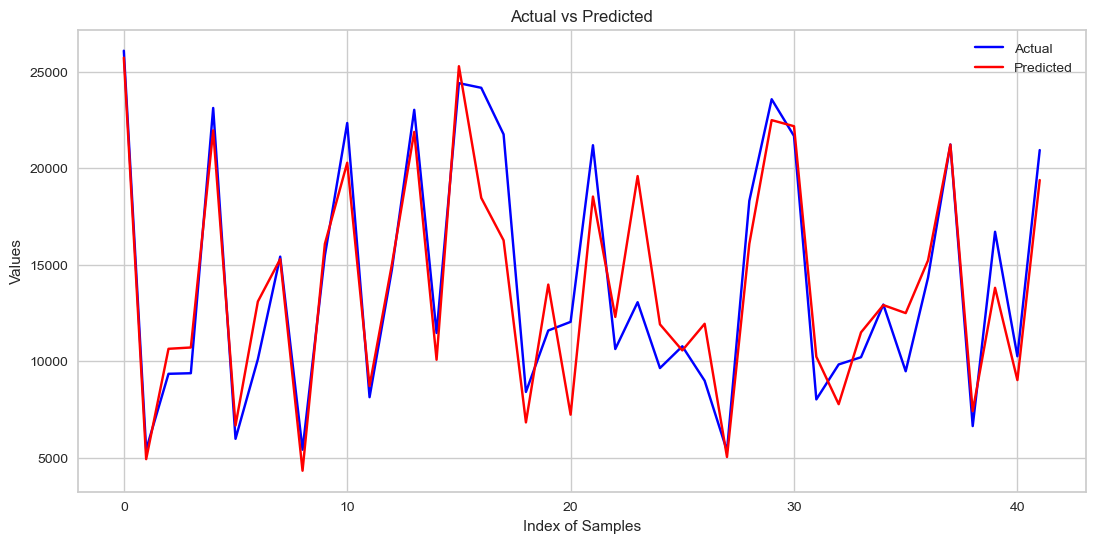

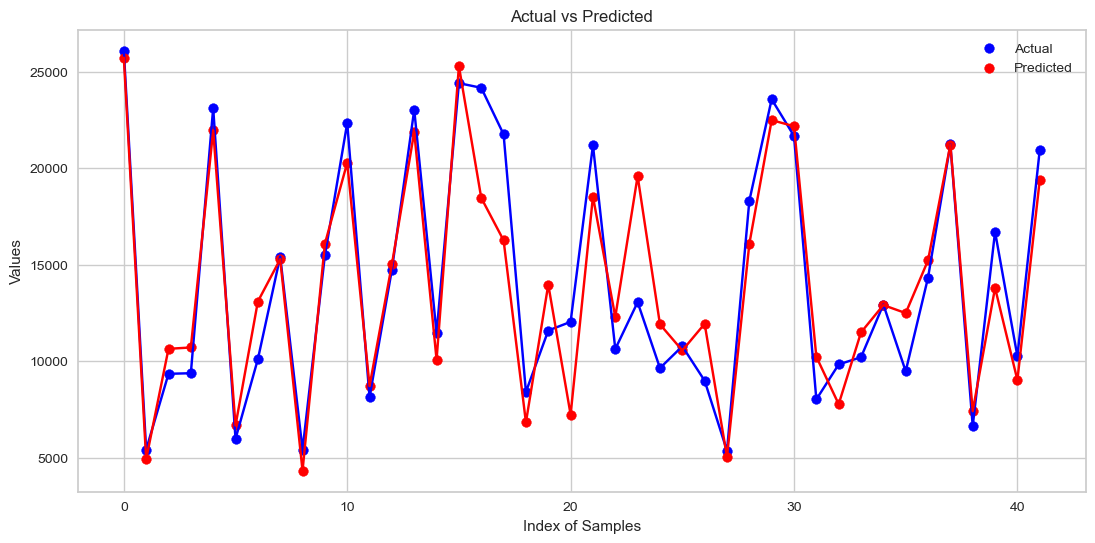


Residuals Scatter Plot:


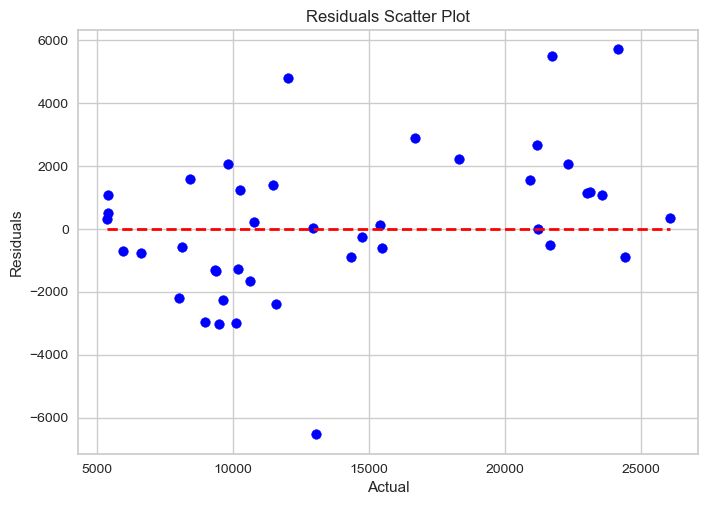


Residuals Histogram:


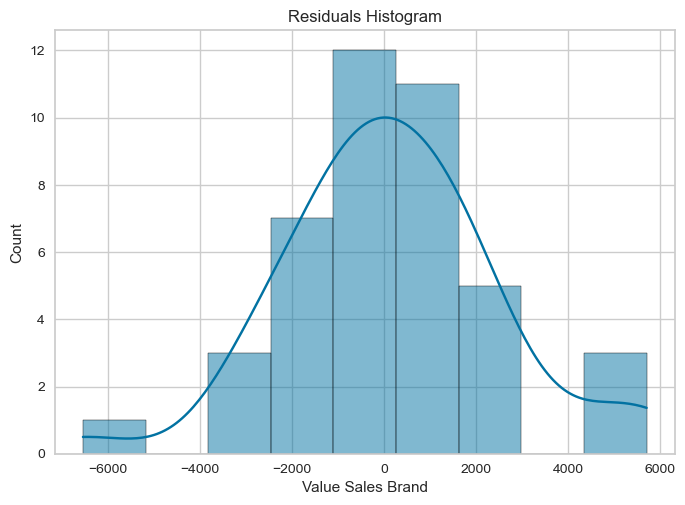

In [106]:
# Assuming dframe1 is your dataframe
X4 = X3.drop(['INVESTMENTS PRINT_log_lag_halo'], axis=1)
y4 = y3

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

#### PROMO LOG,LAG,ADSTOCK TRANSFORMATION

In [108]:
import pandas as pd

# Assuming 'first_df' is your DataFrame with the relevant columns
columns_to_transform = [
    'NUMBER OF INFLUENCERS INVOLVED', 
    'INVESTMENTS TV',
    'INVESTMENTS PRINT',
    'Weighted Handling Distribution', 
    'LOCKDOWN', 
    'promo'
]

# Create a subset of the DataFrame with only the columns of interest
df_to_transform = first_df[columns_to_transform]


In [109]:
import pandas as pd

# Assuming 'first_df' is your DataFrame with the relevant columns
columns_to_transform = [
    'NUMBER OF INFLUENCERS INVOLVED', 
    'INVESTMENTS TV',
    'INVESTMENTS PRINT',
    'Weighted Handling Distribution', 
    'LOCKDOWN', 
    'promo'
]

# Create a subset of the DataFrame with only the columns of interest
df_to_transform = first_df[columns_to_transform]

import numpy as np
from scipy.stats import skew, kurtosis

def apply_log_transformation(df):
    df_log = df.copy()
    columns_to_drop = []

    for feature in df_log.columns:
        feature_skewness = skew(df_log[feature])
        feature_kurtosis = kurtosis(df_log[feature])
        
        if abs(feature_skewness) > 1 or feature_kurtosis > 3:
            print(f"Transforming '{feature}' due to skewness ({feature_skewness}) or kurtosis ({feature_kurtosis})")
            df_log[f"{feature}_log"] = np.log(df_log[feature] + 1)  # Apply log transformation
            columns_to_drop.append(feature)
    
    df_log.drop(columns=columns_to_drop, inplace=True)
    return df_log

df_log_transformed = apply_log_transformation(df_to_transform)


def apply_lag_and_adstock(df, lag=1, window_adstock=10, rate_adstock=0.5):
    df_lag_ads = df.copy()
    
    # Apply Lag
    for col in df_lag_ads.columns:
        df_lag_ads[col + '_lag'] = df_lag_ads[col].shift(lag)

    # Keep only lagged columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_lag')]].dropna().reset_index(drop=True)

    # Apply Adstock
    for var in df_lag_ads.columns:
        df_lag_ads[var + '_halo'] = df_lag_ads[var]
        for i in range(1, window_adstock + 1):
            df_lag_ads[var + '_halo'] += df_lag_ads[var].shift(i).fillna(0) * rate_adstock ** i

    # Keep only adstocked columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_halo')]].dropna().reset_index(drop=True)
    
    return df_lag_ads

df_lag_adstock_transformed = apply_lag_and_adstock(df_log_transformed)


Transforming 'NUMBER OF INFLUENCERS INVOLVED' due to skewness (7.166641379384534) or kurtosis (53.833942064435114)
Transforming 'INVESTMENTS TV' due to skewness (2.3502548545973054) or kurtosis (4.553935710568297)
Transforming 'INVESTMENTS PRINT' due to skewness (13.950250765398362) or kurtosis (195.61036944075357)
Transforming 'LOCKDOWN' due to skewness (3.17542648054294) or kurtosis (8.08333333333334)
Transforming 'promo' due to skewness (1.2120226813888602) or kurtosis (1.5432965391075495)


In [110]:
def apply_lag_and_adstock(df, lag=1, window_adstock=10, rate_adstock=0.5):
    df_lag_ads = df.copy()
    
    # Apply Lag
    for col in df_lag_ads.columns:
        df_lag_ads[col + '_lag'] = df_lag_ads[col].shift(lag)

    # Keep only lagged columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_lag')]].dropna().reset_index(drop=True)

    # Apply Adstock
    for var in df_lag_ads.columns:
        df_lag_ads[var + '_halo'] = df_lag_ads[var]
        for i in range(1, window_adstock + 1):
            df_lag_ads[var + '_halo'] += df_lag_ads[var].shift(i).fillna(0) * rate_adstock ** i

    # Keep only adstocked columns
    df_lag_ads = df_lag_ads[[col for col in df_lag_ads.columns if col.endswith('_halo')]].dropna().reset_index(drop=True)
    
    return df_lag_ads

df_lag_adstock_transformed = apply_lag_and_adstock(df_log_transformed)


In [111]:
# Merge transformed columns back into the original DataFrame
final_df = first_df.join(df_lag_adstock_transformed)

# Drop original columns that were transformed if needed
final_df.drop(columns=columns_to_transform, inplace=True)


In [112]:
final_df = final_df.fillna(0)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     33.20
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           3.12e-47
Time:                        00:23:58   Log-Likelihood:                -1526.6
No. Observations:                 166   AIC:                             3107.
Df Residuals:                     139   BIC:                             3191.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

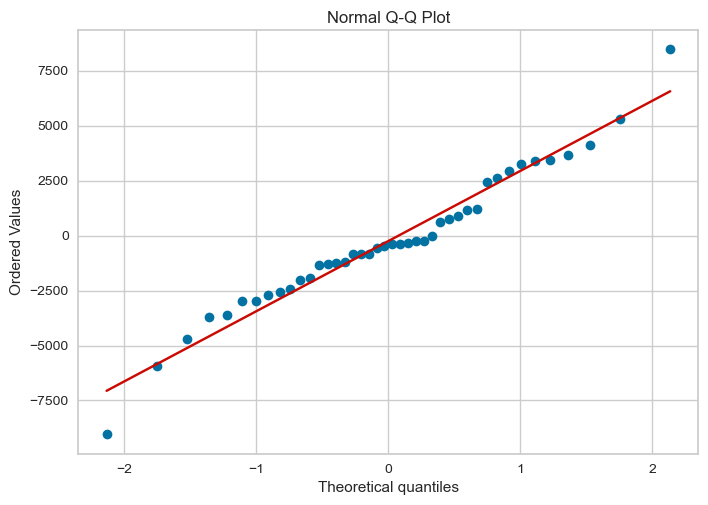


Actual vs Predicted:


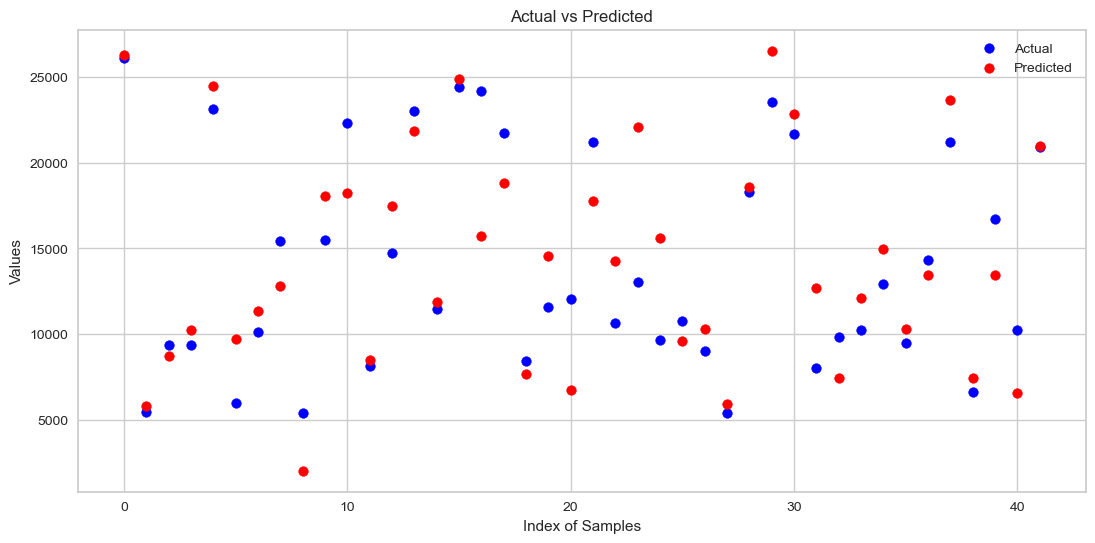

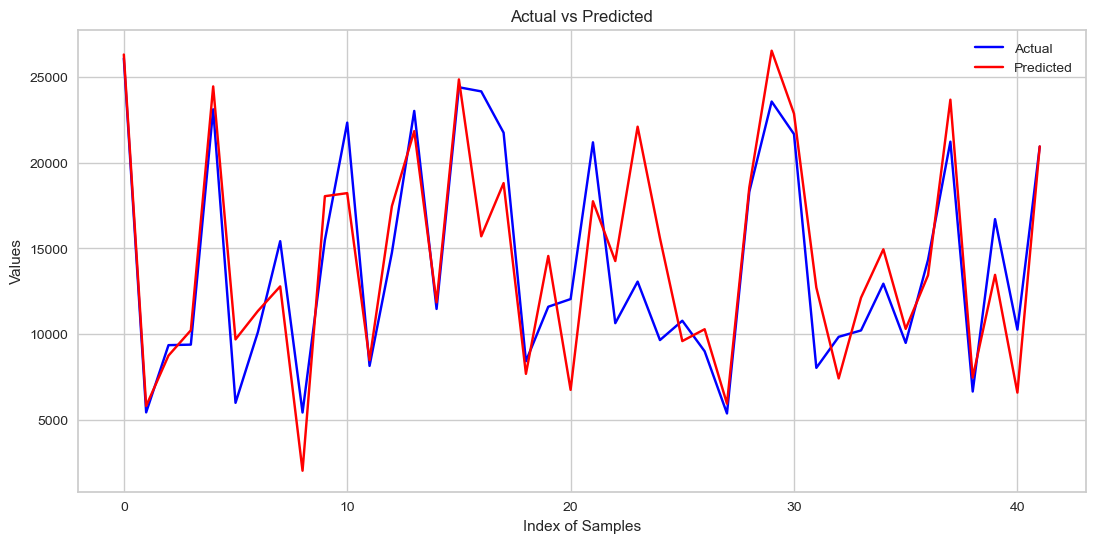

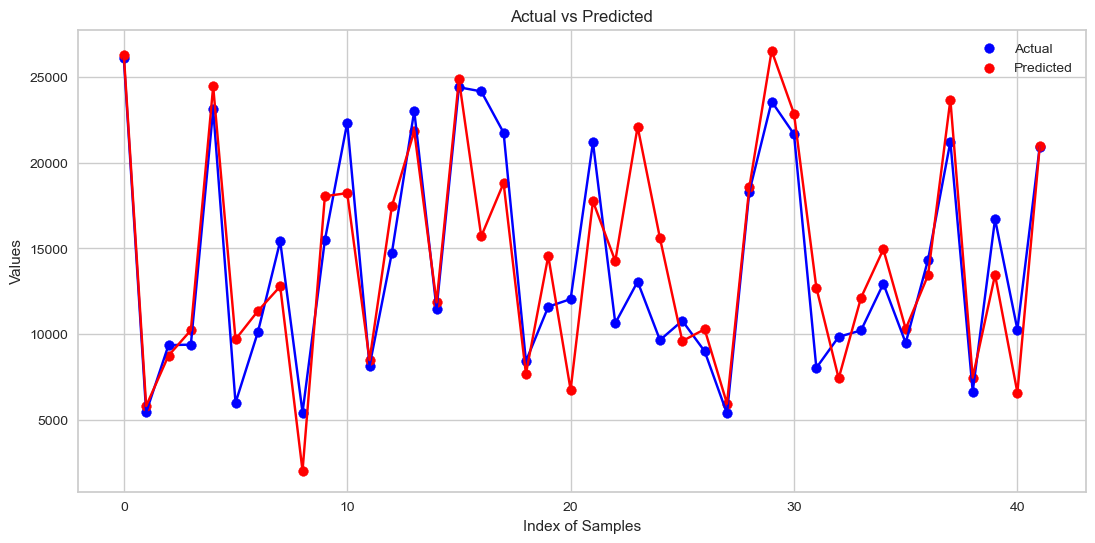


Residuals Scatter Plot:


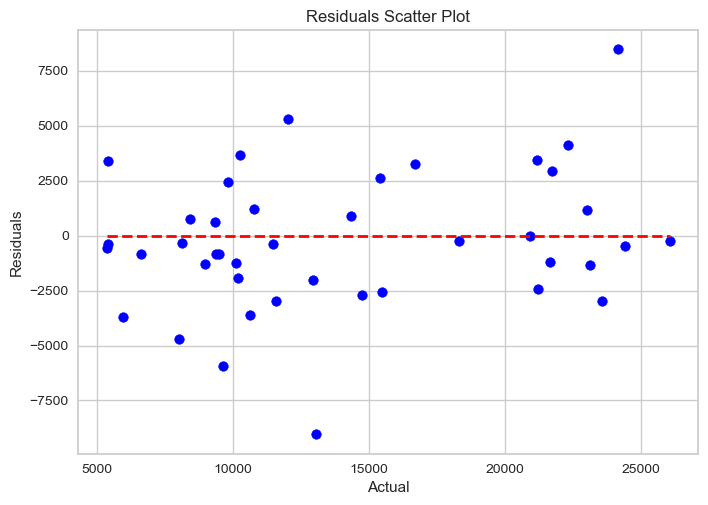


Residuals Histogram:


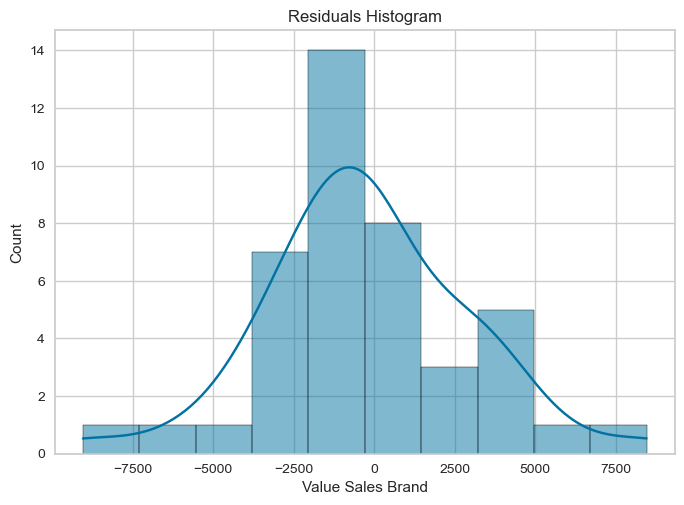

In [113]:
# Assuming dframe1 is your dataframe
X = final_df.drop(['Value Sales Brand'], axis=1)
y = final_df['Value Sales Brand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     44.12
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.60e-51
Time:                        00:23:58   Log-Likelihood:                -1528.1
No. Observations:                 166   AIC:                             3098.
Df Residuals:                     145   BIC:                             3163.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

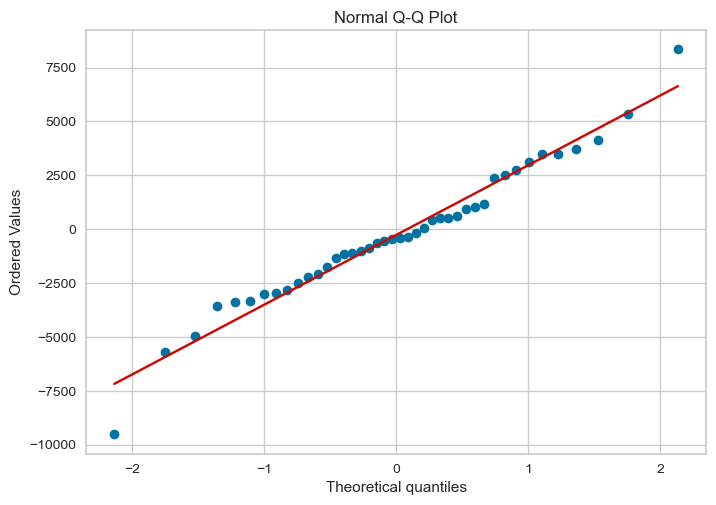


Actual vs Predicted:


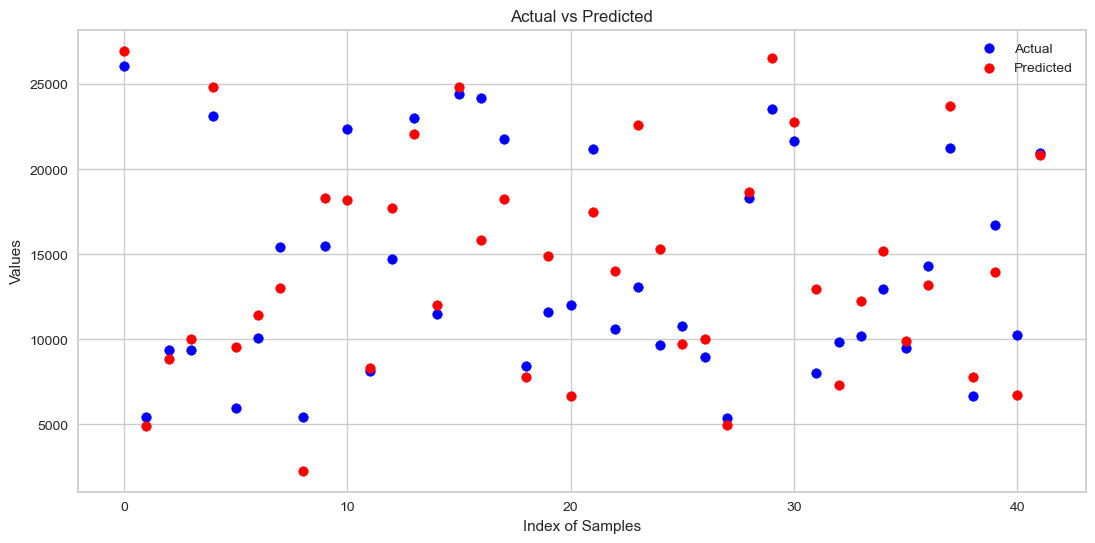

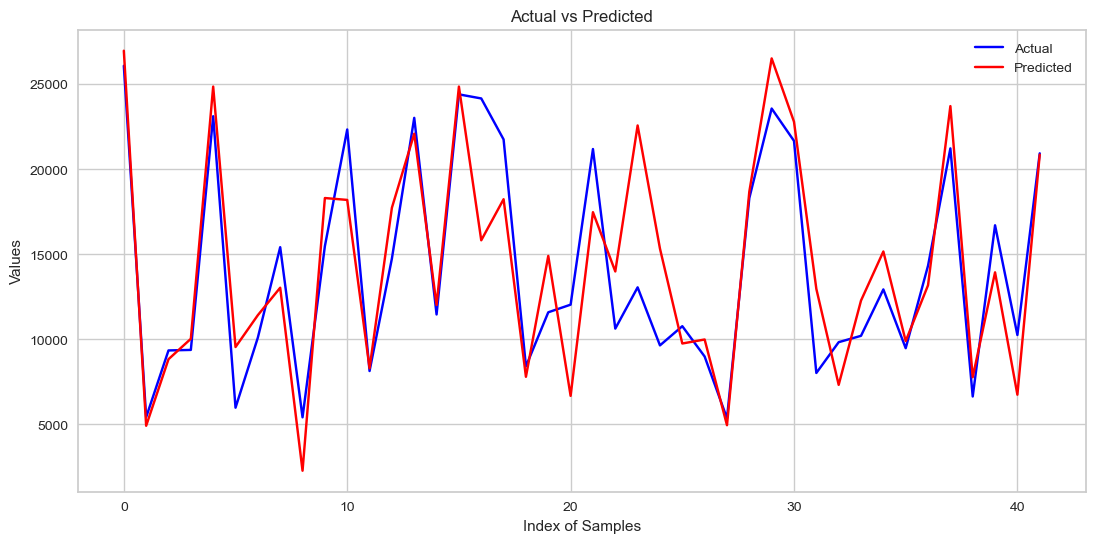

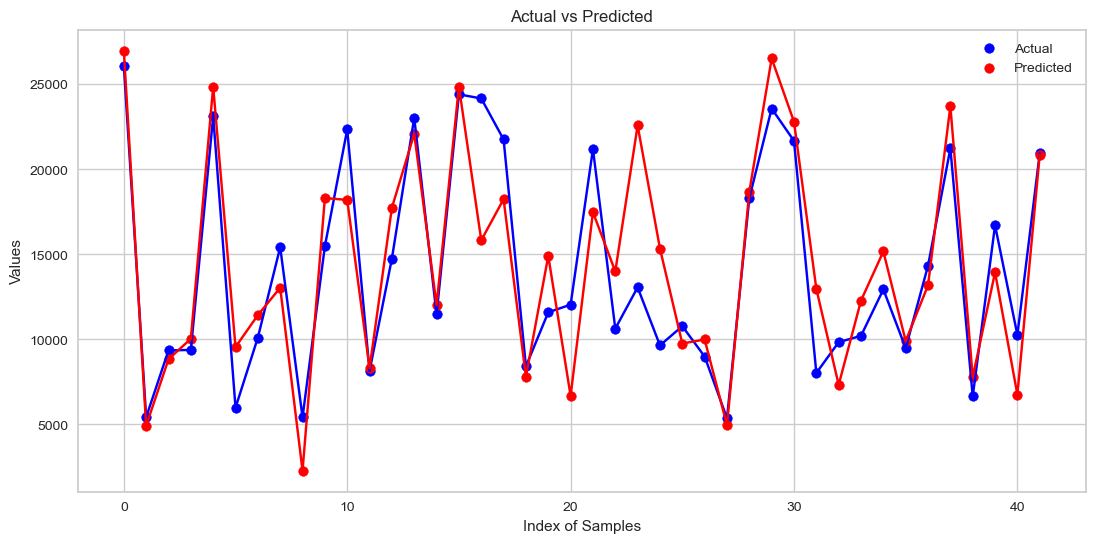


Residuals Scatter Plot:


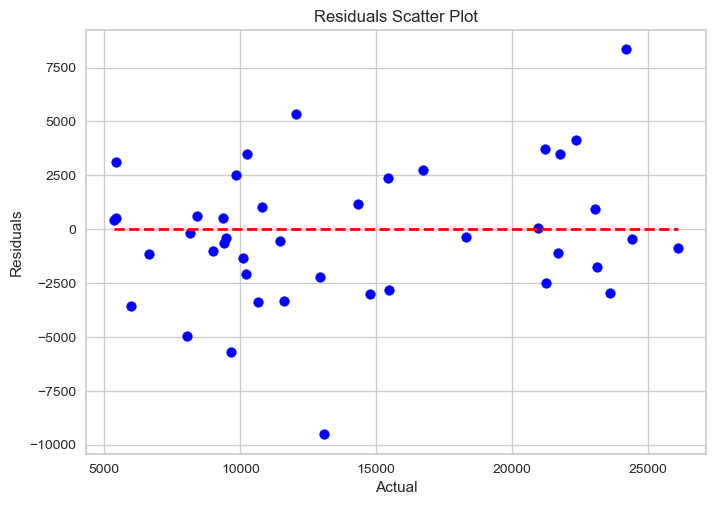


Residuals Histogram:


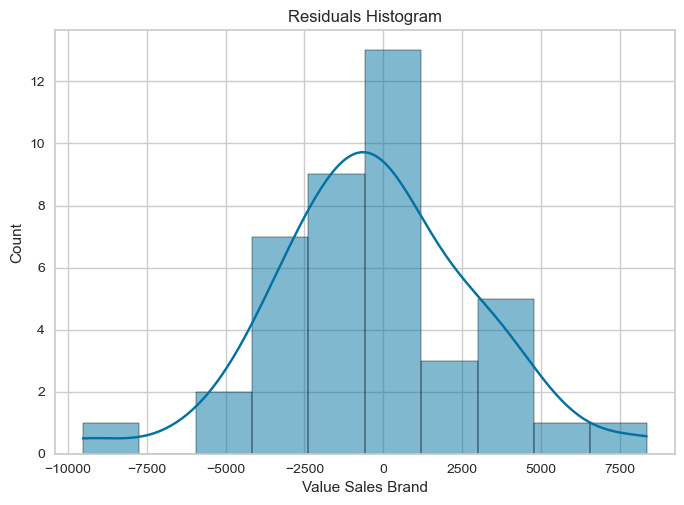

In [114]:
# Assuming dframe1 is your dataframe
X1 = X.drop(['Number of Items', 'AVERAGE PRICE MKT', 'competitors_grp', 'total_editors', 'DISTRIBUTED SAMPLES (.000)', 'events_seasonal'], axis=1)
y1 = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     61.12
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           8.04e-55
Time:                        00:23:59   Log-Likelihood:                -1533.1
No. Observations:                 166   AIC:                             3096.
Df Residuals:                     151   BIC:                             3143.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

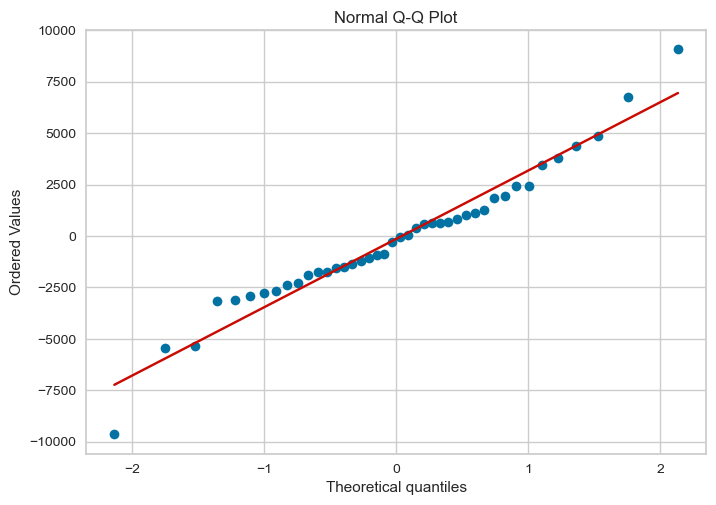


Actual vs Predicted:


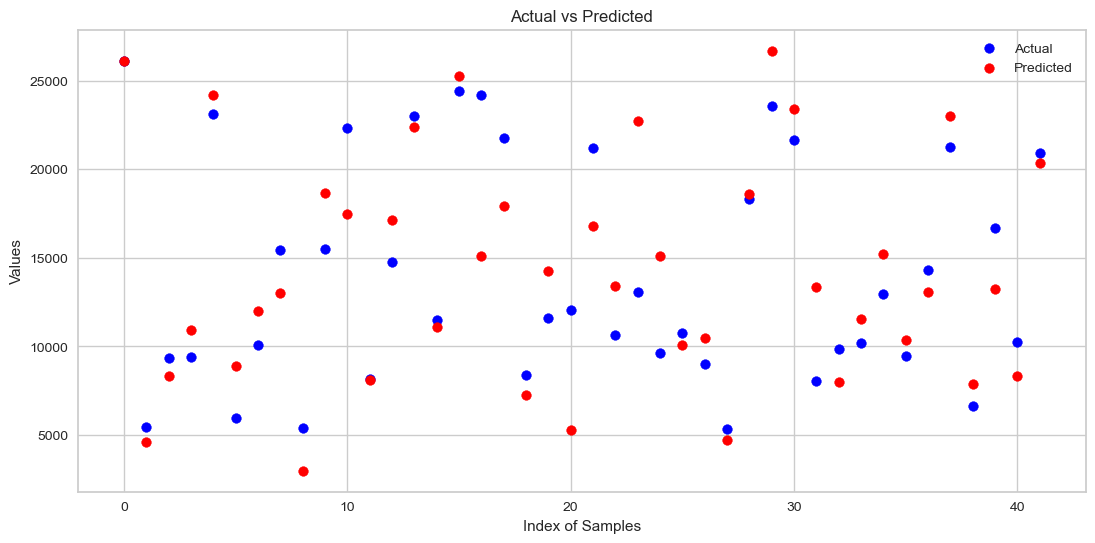

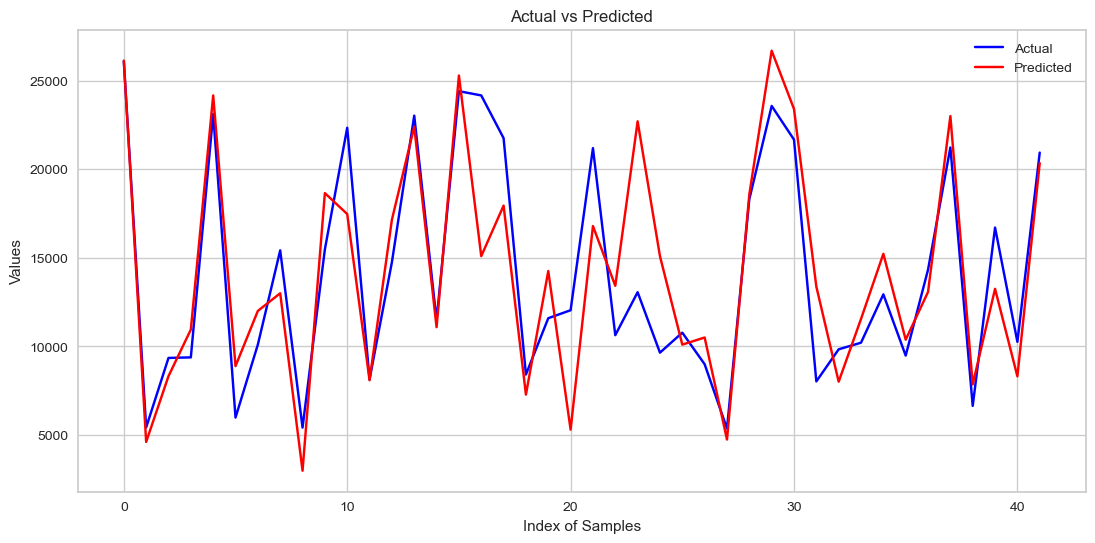

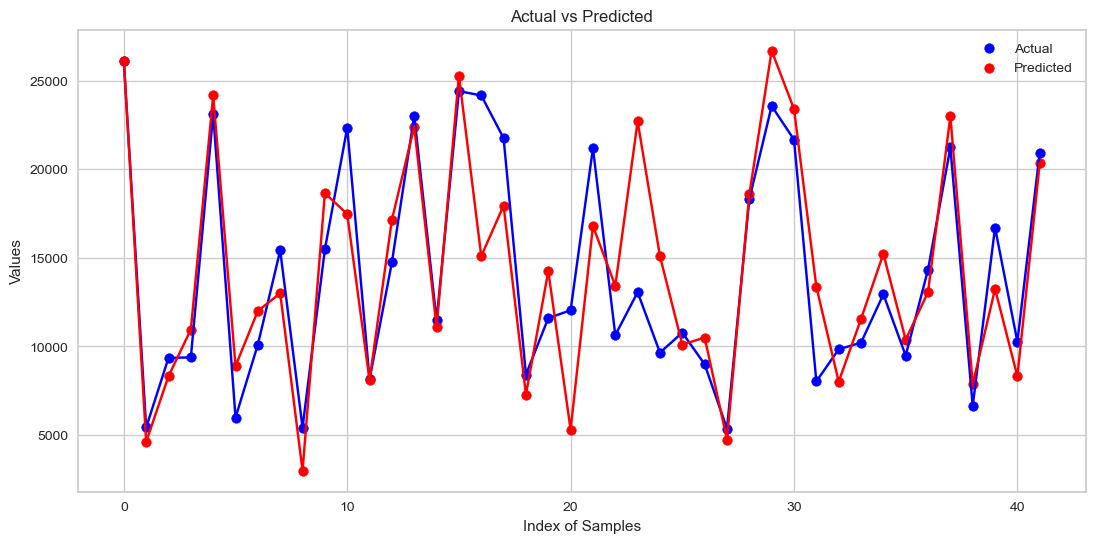


Residuals Scatter Plot:


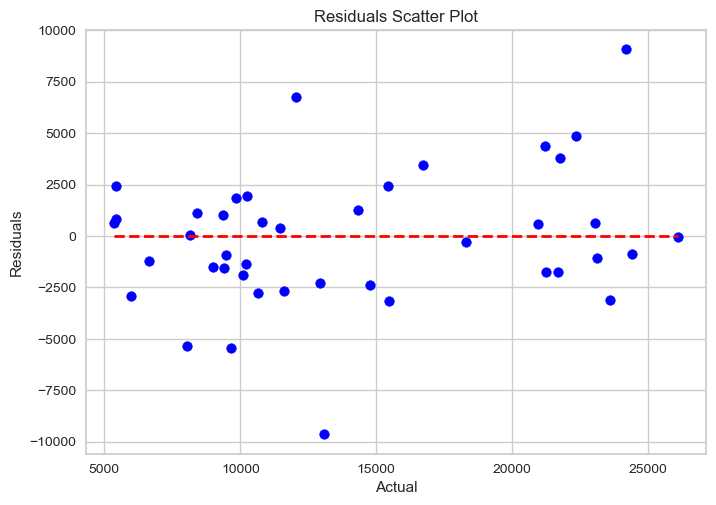


Residuals Histogram:


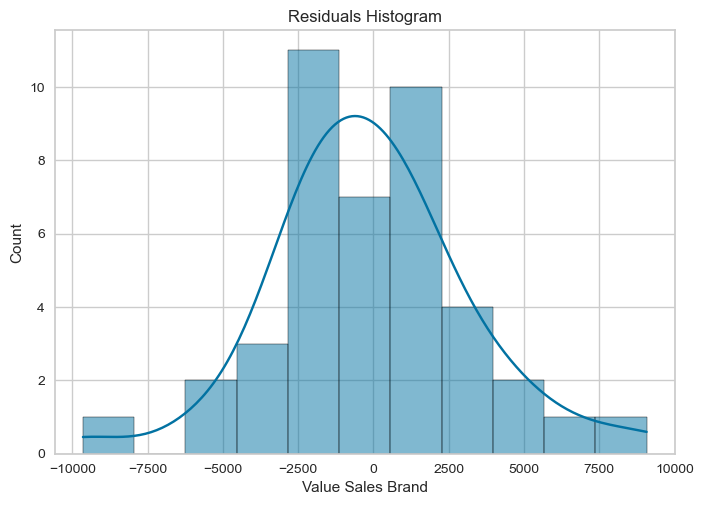

In [115]:
# Assuming dframe1 is your dataframe
X2 = X1.drop(['SEASONALITY MARKET', 'total_totem', 'Positive Opinions', 'season_Spring', 
              'Weighted Handling Distribution_lag_halo', 'LOCKDOWN_log_lag_halo'], axis=1)
y2 = y1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

                            OLS Regression Results                            
Dep. Variable:      Value Sales Brand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.39e-56
Time:                        00:23:59   Log-Likelihood:                -1535.8
No. Observations:                 166   AIC:                             3096.
Df Residuals:                     154   BIC:                             3133.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

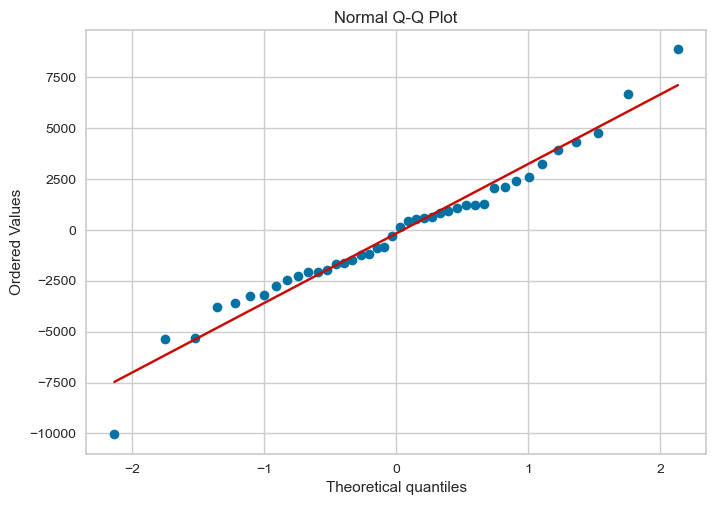


Actual vs Predicted:


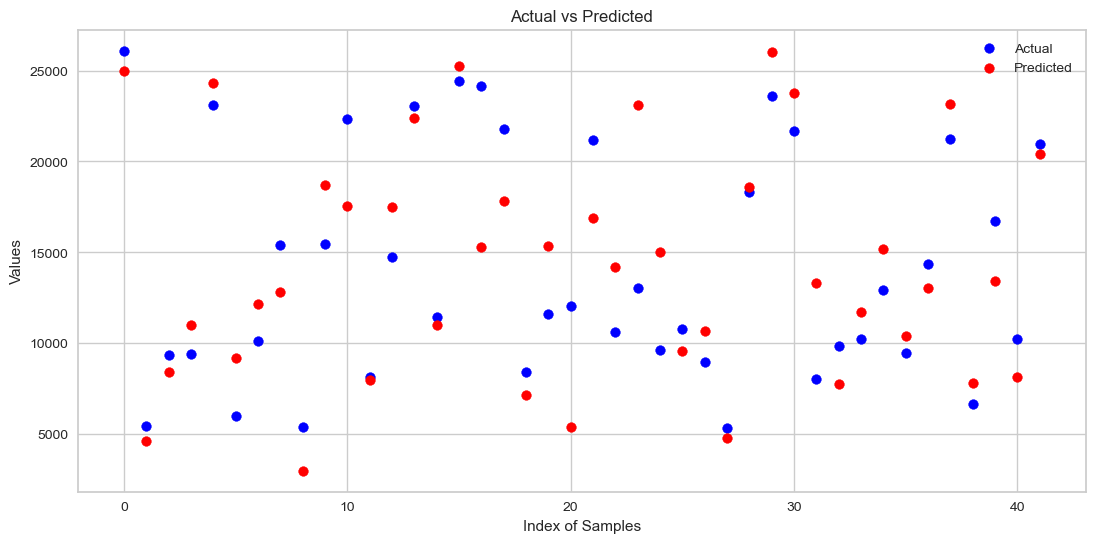

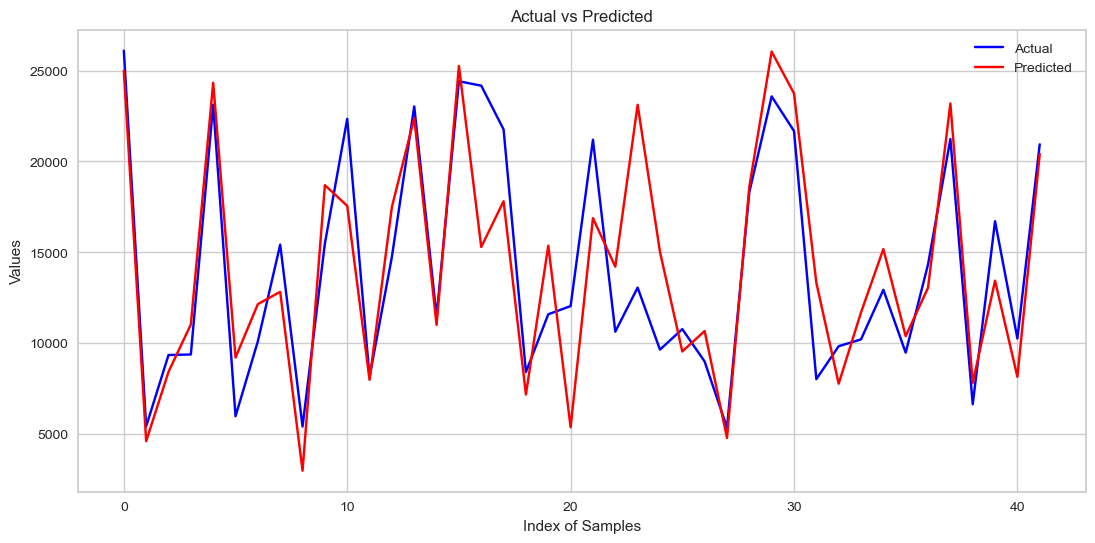

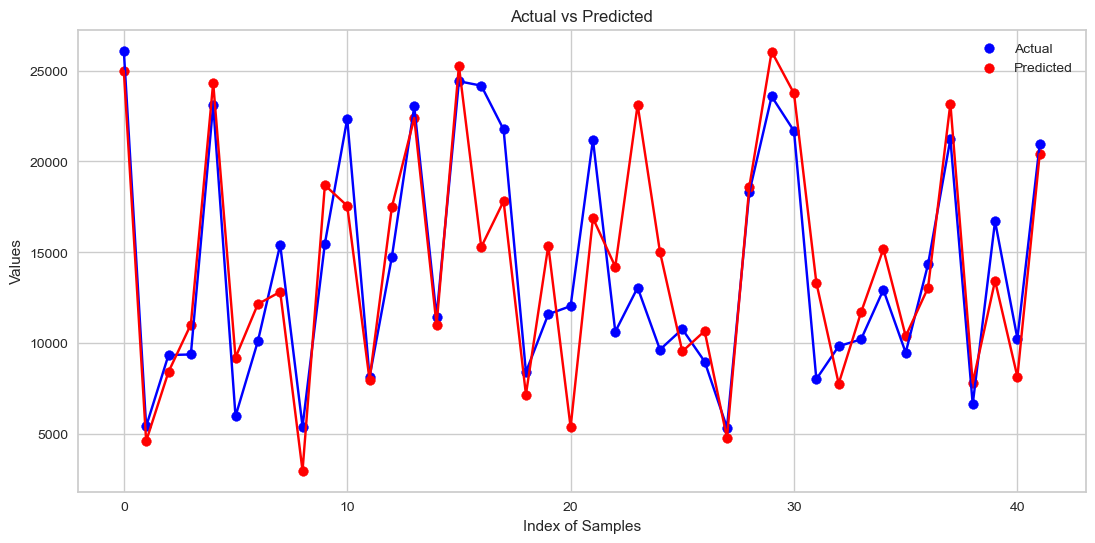


Residuals Scatter Plot:


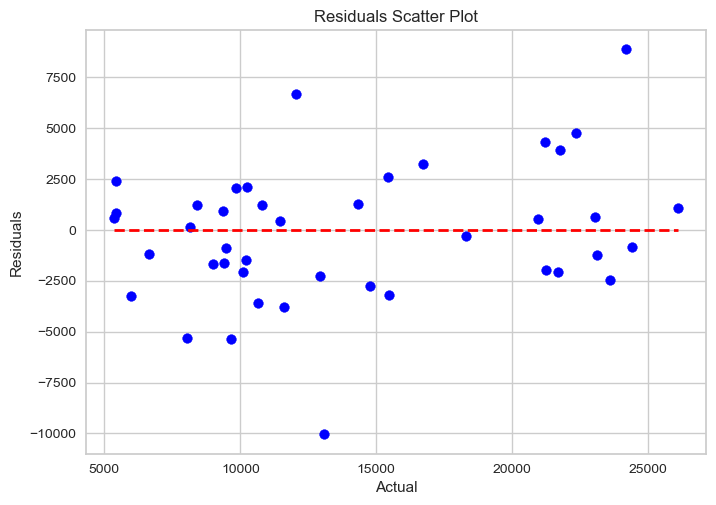


Residuals Histogram:


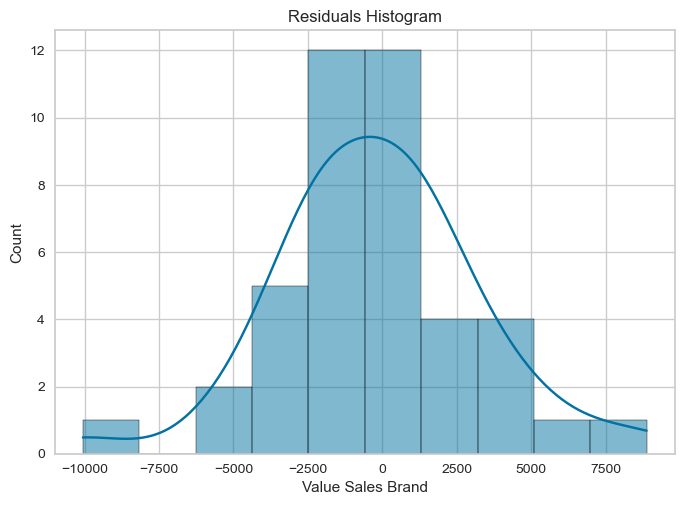

In [116]:
# Assuming dframe1 is your dataframe
X3 = X2.drop(['INVESTMENTS PRINT_log_lag_halo', "GRP TV 20''", "GRP TV 10''"], axis=1)
y3 = y2

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Perform regression
model, y_pred = perform_regression(X_train, X_test, y_train, model_type='BayesianRidge', simple=True)

# Perform residual analysis and plot graphs
analysis_of_residuals(y_test, y_pred)

### Contribution

In [118]:
coefficients = {
    "Online Reviews": 3022.4936, #Online Reviews
    "Online Ratings": 838.4803, #Online Ratings
    "Online Media": 2288.9008, #Digital Investments
    "Season Summer": 1083.3431, #Season Summer
    "Season Winter": 790.6786, #Season Winter
    "Number of Inluencers": 507.2144, #Number of Influencers (Log lagged adstock)
    "TV Investments": 605.3539, #TV Investments (Log lagged adstock)
    "Promo": 756.2384, #Promo (Log lagged adstock)
    "Negative Opinions": -493.7610,
    "Average Promo Price": -1601.9083
}

# Calculate the sum of absolute coefficients
sum_abs_coefficients = sum(abs(value) for value in coefficients.values())

# Calculate the percentage contribution for each variable
contributions = {key: (abs(value) / sum_abs_coefficients) * 100 for key, value in coefficients.items()}

contributions

{'Online Reviews': 25.211876134244875,
 'Online Ratings': 6.994112895592066,
 'Online Media': 19.092673497529987,
 'Season Summer': 9.036615345716156,
 'Season Winter': 6.595379035773028,
 'Number of Inluencers': 4.230886254417656,
 'TV Investments': 5.04950863888746,
 'Promo': 6.308099004331898,
 'Negative Opinions': 4.118665849919711,
 'Average Promo Price': 13.362183343587159}

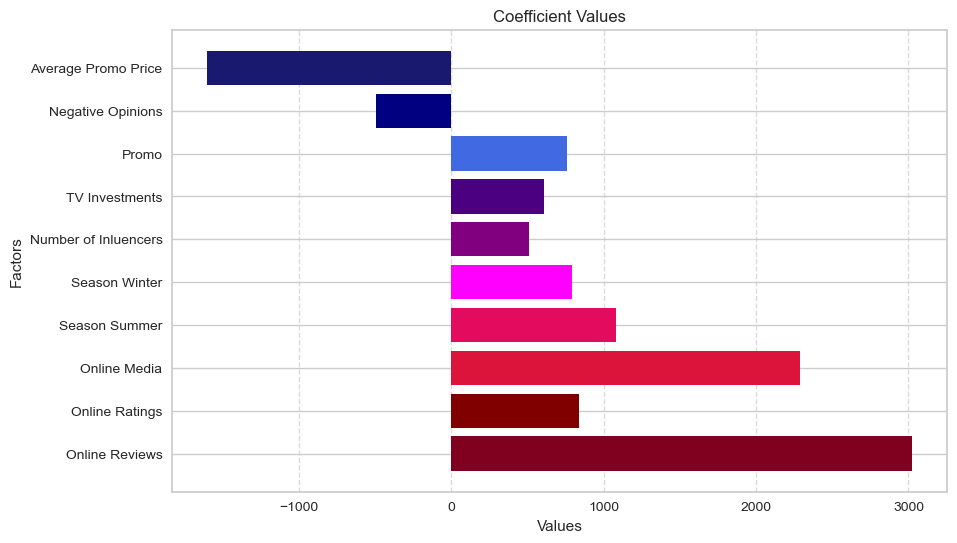

In [119]:
colors = ['#800020', '#800000', '#DC143C', '#E30B5D', '#FF00FF', '#800080', '#4B0082', '#4169E1', '#000080', '#191970']

plt.figure(figsize=(10, 6))
plt.barh(list(coefficients.keys()), list(coefficients.values()), color=colors)
plt.title('Coefficient Values')
plt.ylabel('Factors')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()